In [11]:
import numpy as np
import pandas as pd

# Context

The data used in this report was retrived from KAGGLE: https://www.kaggle.com/c/novozymes-enzyme-stability-prediction
Each data example consists of a protein sequence, a pH value and thermostability index. Predicting the thermostability is fundamental in enzyme engeneering for a wide variety of applications. Employing ML techniques is of great value to achieve the latter purpose as it saves time and money.

# Preprocessing

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

updates = pd.read_csv("train_updates_20220929.csv")

Definiram-se os dados de teste e treino e, ainda, se definiu dados de treino atualizados, de modo a corrigir-se alguns dos dados de treino.

In [3]:
train

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5
...,...,...,...,...,...
31385,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8
31386,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2
31387,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6
31388,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.7


In [4]:
updates

,seq_id,protein_sequence,pH,data_source,tm
0,69,NaN,NaN,NaN,NaN
1,70,NaN,NaN,NaN,NaN
2,71,NaN,NaN,NaN,NaN
3,72,NaN,NaN,NaN,NaN
4,73,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2429,30738,NaN,NaN,NaN,NaN
2430,30739,NaN,NaN,NaN,NaN
2431,30740,NaN,NaN,NaN,NaN
2432,30741,NaN,NaN,NaN,NaN


In [5]:
print(f"Entries to update (num_rows): {updates['pH'].shape}")

mask = updates["pH"].isna()

to_delete = updates.loc[mask,:]
to_change = updates.loc[-mask,:]

print(f"Entries to delete (shape): {to_delete.shape}")
print(f"Entries to change (shape): {to_change.shape}")

Entries to update (num_rows): (2434,)
Entries to delete (shape): (2409, 5)
Entries to change (shape): (25, 5)


Verificou-se o número de dados para deletar e para modificar.

In [6]:
# First, change rows with data arrangement errors
train.loc[to_change.index, ["pH", "tm"]] = updates.loc[to_change.index, ["pH", "tm"]]train.loc[to_change.index, ["pH", "tm"]] = updates.loc[to_change.index, ["pH", "tm"]]

In [7]:
# Next, remove rows with data issues
print(f"Number of entries (original data): {train.shape[0]}")
train_cut = train.drop(to_delete.index)
print(f"Number of entries (after cut): {train_cut.shape[0]}")

Number of entries (original data): 31390
Number of entries (after cut): 28981


Após a realização das modificações foram eliminadas 2409 entradas.

In [8]:
train_cut

,seq_id,protein_sequence,pH,data_source,tm
25,25,AAPDEITTAWPVNVGPLNPHLYTPNQMFAQSMVYEPLVKYQADGSV...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
28,28,AARRFSGPRNQRQQGGGDPGLMHGKTVLITGANSGLGRATAAELLR...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
29,29,AASSPEADFVKKTISSHKIVIFSKSYCPYCKKAKSVFRELDQVPYV...,7.0,doi.org/10.1038/s41592-020-0801-4,49.0
30,30,AATFAYSQSQKRSSSSPGGGSNHGWNNWGKAAALASTTPLVHVASV...,5.5,doi.org/10.1038/s41592-020-0801-4,55.6
33,33,AAVLVTFIGGLYFITHHKKEESETLQSQKVTGNGLPPKPEERWRYI...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
...,...,...,...,...,...
31385,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8
31386,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2
31387,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6
31388,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.7


Realizou-se a verificação das alterações realizadas aos dados de treino e a presença de NaNs -> verificou-se a existência de dados omissos (3494).

In [9]:
# check if there are still NaNs and remove them
idxs = train_cut[train_cut.isna().any(axis=1)].index
print(f"Number of rows still containing NaNs: {len(idxs)}")
train_cut.drop(index=idxs, inplace=True)
train_cut

Number of rows still containing NaNs: 3494


,seq_id,protein_sequence,pH,data_source,tm
25,25,AAPDEITTAWPVNVGPLNPHLYTPNQMFAQSMVYEPLVKYQADGSV...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
28,28,AARRFSGPRNQRQQGGGDPGLMHGKTVLITGANSGLGRATAAELLR...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
29,29,AASSPEADFVKKTISSHKIVIFSKSYCPYCKKAKSVFRELDQVPYV...,7.0,doi.org/10.1038/s41592-020-0801-4,49.0
30,30,AATFAYSQSQKRSSSSPGGGSNHGWNNWGKAAALASTTPLVHVASV...,5.5,doi.org/10.1038/s41592-020-0801-4,55.6
33,33,AAVLVTFIGGLYFITHHKKEESETLQSQKVTGNGLPPKPEERWRYI...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
...,...,...,...,...,...
31385,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8
31386,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2
31387,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6
31388,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.7


Voltou-se a realizar a eliminação das linhas com NaNs.

In [10]:
# Reset indexes
train_cut.reset_index(drop=True, inplace=True)
train_cut

,seq_id,protein_sequence,pH,data_source,tm
0,25,AAPDEITTAWPVNVGPLNPHLYTPNQMFAQSMVYEPLVKYQADGSV...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
1,28,AARRFSGPRNQRQQGGGDPGLMHGKTVLITGANSGLGRATAAELLR...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
2,29,AASSPEADFVKKTISSHKIVIFSKSYCPYCKKAKSVFRELDQVPYV...,7.0,doi.org/10.1038/s41592-020-0801-4,49.0
3,30,AATFAYSQSQKRSSSSPGGGSNHGWNNWGKAAALASTTPLVHVASV...,5.5,doi.org/10.1038/s41592-020-0801-4,55.6
4,33,AAVLVTFIGGLYFITHHKKEESETLQSQKVTGNGLPPKPEERWRYI...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
...,...,...,...,...,...
25482,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8
25483,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2
25484,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6
25485,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.7


Verificaram-se os parâmetros estatísticos para as colunas pH e tm. Analisando cada coluna observou-se que os valores médios e medianos são semelhates, que se elimanaram todos os valores omissos e que a distribuição nas duas colunas é relativamente uniforme (baixo skewness).

In [11]:
train_cut.describe().loc[:,["pH","tm"]]

,pH,tm
count,25487.000000,25487.000000
mean,6.903579,51.436933
std,0.752407,12.190382
min,1.990000,0.000000
25%,7.000000,43.650000
50%,7.000000,48.700000
75%,7.000000,54.500000
max,11.000000,130.000000


# Feature extraction

Seguimos com o passo da extração de features, com a esperança de obter um conjunto de descritores correlacionados com a variável dependente (termostabilidade), capazes de a prever com algoritmos adequados.

Para isto, utilizámos funções do BioPython e ProPy:

In [12]:
#!pip install propy3
#!conda install propy3

In [2]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from propy.PyPro import GetProDes

#### Descriptors

- sequence length (1 feature) -- <b>pypro3</b> (propy.PyPro)
- aminoacid composition (20 features) -- <b>pypro3</b> (propy.PyPro)
- dipeptide composition (400 features) -- <b>pypro3</b> (propy.PyPro)
- tripeptide composition (8000 features) -- <b>pypro3</b> (propy.PyPro)
- ctd descriptors -> composition, transition, distribution (147 features) -- <b>pypro3</b> (propy.PyPro)
- molecular weight (1 feature) -- <b>Biopython</b> (Bio.SeqUtils.ProtParam)
- aromaticity (1 feature) -- <b>Biopython</b> (Bio.SeqUtils.ProtParam)
- instability index (1 feature) -- <b>Biopython</b> (Bio.SeqUtils.ProtParam)
- isoelectric point (1 feature) -- <b>Biopython</b> (Bio.SeqUtils.ProtParam)
- secondary structure fraction -> helix, turn, sheet (3 features) -- <b>Biopython</b> (Bio.SeqUtils.ProtParam)
- molar extinction coefficient -> reduced, oxidized (2 features) -- <b>Biopython</b> (Bio.SeqUtils.ProtParam)
- geary autocorrelation descriptors (240 features) -- <b>pypro3</b> (propy.PyPro)
- moran autocorrelation descriptors (240 features) -- <b>pypro3</b> (propy.PyPro)
- normalized moreau-broto autocorrelation descriptors (240 features) -- <b>pypro3</b> (propy.PyPro)<br><br>

- Total number of features: <b>9297</b>


Extraímos inicialmente o tamanho de cada sequência (**'sequence length´**), seguido pela sua composição de aminoácidos individuais (**'aminoacid composition'**), e todos os dipéptidos ('dipeptide composition') e tripéptidos possíveis (**'tripeptide composition'**).

**'ctd descriptors'** são um conjunto de descritores relativamente às propriedades dos aminoácidos, como hidrofobicidade, polaridade, carga, etc. Para cada propriedade, os aminoácidos de cada proteína são agrupadas numa de 3 grupos, sendo calculadas a composição (percentagem de aminoácidos), transição (percentagem de transições de um grupo para outro), e distribuição (índices de cada categoria ao longo da sequência presentes em cada quartil são devolvidos e divididos pelo número total dessa categoria presente na sequência).

Seguem-se o peso molecular de cada proteína (**'molecular weight'**), frequência relativa de aminoácidos aromáticos (Phe, Trp e Tyr) (**'aromaticity'**), valor indicativo da instabilidade da proteína, onde valores altos significam proteínas mais instáveis (**'instability index'**), e o pH onde a carga global da proteína é neutra (**'isoelectric point'**).

**'secondary structure fraction'** refere-se à fração de aminoácidos na sequência que costumam estar presentes em hélices, 'turns' ou folhas. **'molar extinction coefficiente´** é uma medida do quão forte uma espécie química absorve luz numa dada onda de luz (considera cisteínas e pontes dissulfito).

Por fim, **'greary autocorrelation'**, **'moran autocorrelation'** e **'normalized moreau_broto autocorrelation'** são diferentes cálculos da distribuição espacial de um conjunto de descritores estruturais e fisioquímicos.

Para extrair estes descritores, foram criadas funções auxiliares para devolver os resultados em forma de dicionário. Desta forma é mais simples posteriormente juntar os resultados para criar um novo DataFrame do pandas.


#### Compute descriptors

In [14]:
# sequence lenght (1 feature)
def get_length(protein: str) -> dict:
    return {"SeqLength": len(protein)}

In [15]:
# aminoacid composition (20 features)
def get_aminoacid_composition(protein: str) -> dict:
    return GetProDes(protein).GetAAComp()

In [16]:
# dipeptide composition (400 features)
def get_dipeptide_composition(protein: str) -> dict:
    return GetProDes(protein).GetDPComp()

In [17]:
# tripeptide composition (8000 features)
def get_tripeptide_composition(protein: str) -> dict:
    return GetProDes(protein).GetTPComp()

In [18]:
# ctd descriptors (147 features)
def get_ctd_descriptors(protein: str) -> dict:
    return GetProDes(protein).GetCTD()

In [19]:
# molecular weight (1 feature)
def get_molecular_weight(protein: str) -> dict:
    X = ProteinAnalysis(protein)
    return {"MolecularWeight": X.molecular_weight()}

In [20]:
# aromaticity (1 feature)
def get_aromaticity(protein: str) -> dict:
    X = ProteinAnalysis(protein)
    return {"Aromaticity": X.aromaticity()}

In [21]:
# instability index (1 feature)
def get_instability_index(protein: str) -> dict:
    X = ProteinAnalysis(protein)
    return {"InstabilityIndex": X.instability_index()}

In [22]:
# isoelectric point (1 feature)
def get_isoelectric_point(protein: str) -> dict:
    X = ProteinAnalysis(protein)
    return {"IsoelectricPoint": X.isoelectric_point()}

In [23]:
# secondary structure fraction (3 features)
def get_secondary_structure_fraction(protein: str) -> dict:
    X = ProteinAnalysis(protein)
    helix, turn, sheet = X.secondary_structure_fraction()
    return {"HelixSSF": helix, "TurnSSF": turn, "SheetSSF": sheet}

In [24]:
# molar extinction coefficient (2 features)
def get_molar_extinction_coefficient(protein: str) -> dict:
    X = ProteinAnalysis(protein)
    reduced, oxidized = X.molar_extinction_coefficient()
    return {"ReducedMEC": reduced, "OxidizedMEC": oxidized}

In [25]:
# geary autocorrelation descriptors (240 features)
def get_geary_autocorrelation_descriptors(protein: str) -> dict:
    return GetProDes(protein).GetGearyAuto()

In [26]:
# moran autocorrelation descriptors (240 features)
def get_moran_autocorrelation_descriptors(protein: str) -> dict:
    return GetProDes(protein).GetMoranAuto()

In [27]:
# moreau-broto autocorrelation descriptors (240 features)
def get_moreau_broto_autocorrelation_descriptors(protein: str) -> dict:
    return GetProDes(protein).GetMoreauBrotoAuto()

#### Compute descriptors for all sequences

In [48]:
train_cut.head()

,seq_id,protein_sequence,pH,data_source,tm
0,25,AAPDEITTAWPVNVGPLNPHLYTPNQMFAQSMVYEPLVKYQADGSV...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
1,28,AARRFSGPRNQRQQGGGDPGLMHGKTVLITGANSGLGRATAAELLR...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
2,29,AASSPEADFVKKTISSHKIVIFSKSYCPYCKKAKSVFRELDQVPYV...,7.0,doi.org/10.1038/s41592-020-0801-4,49.0
3,30,AATFAYSQSQKRSSSSPGGGSNHGWNNWGKAAALASTTPLVHVASV...,5.5,doi.org/10.1038/s41592-020-0801-4,55.6
4,33,AAVLVTFIGGLYFITHHKKEESETLQSQKVTGNGLPPKPEERWRYI...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4


Criámos uma função que junta as funções anteriores todas, de forma a criar um novo dataset, juntando os descritores do dataset original (nomeadamente o 'pH' e 'tm') com os novos descritores inferidos a partir de cada sequência do dataset ('protein_sequence').

Uma vez que este processo demora bastante a correr, utilizámos a função 'tqdm' para visualizar o progresso da extração.

In [28]:
from tqdm.notebook import tqdm

In [29]:
# compute all descriptors (9297 features)
def get_dataset_with_features(dataset: pd.DataFrame) -> pd.DataFrame:
    # get protein sequences from dataset and initialize an empty protein_features list
    proteins = np.array(dataset.protein_sequence, dtype="str")
    protein_features = []
    for protein in tqdm(proteins):
        # compute features for each protein
        length = get_length(protein)
        aa_comp = get_aminoacid_composition(protein)
        dp_comp = get_dipeptide_composition(protein)
        tp_comp = get_tripeptide_composition(protein)
        ctd = get_ctd_descriptors(protein)
        mw = get_molecular_weight(protein)
        arom = get_aromaticity(protein)
        ii = get_instability_index(protein)
        iso_p = get_isoelectric_point(protein)
        ssf = get_secondary_structure_fraction(protein)
        mec = get_molar_extinction_coefficient(protein)
        geary = get_geary_autocorrelation_descriptors(protein)
        moran = get_moran_autocorrelation_descriptors(protein)
        moreau_broto = get_moreau_broto_autocorrelation_descriptors(protein)
        # merge dictionaries and add result to protein_features
        features = dict(length, **aa_comp, **dp_comp, **tp_comp,  **ctd, **mw, **arom, **ii, **iso_p, **ssf, **mec,
                        **geary, **moran, **moreau_broto)
        protein_features.append(features)
    # return pandas DataFrame with results
    features_df = pd.DataFrame(protein_features)
    features_df.insert(0, "seq_id", dataset.seq_id)
    return pd.concat([features_df, dataset.loc[:,["pH","tm"]]], axis=1) #Removeu-se, 'protein_sequence', e 'data_source'

In [30]:
train = get_dataset_with_features(train_cut)
train

  0%|          | 0/25487 [00:00<?, ?it/s]

,seq_id,SeqLength,A,R,N,D,C,E,Q,G,...,MoreauBrotoAuto_Mutability23,MoreauBrotoAuto_Mutability24,MoreauBrotoAuto_Mutability25,MoreauBrotoAuto_Mutability26,MoreauBrotoAuto_Mutability27,MoreauBrotoAuto_Mutability28,MoreauBrotoAuto_Mutability29,MoreauBrotoAuto_Mutability30,data_source,tm
0,25,501,10.379,4.192,4.591,5.589,0.000,6.387,5.389,4.990,...,-0.058,-0.057,-0.058,-0.056,-0.056,-0.056,-0.056,-0.057,doi.org/10.1038/s41592-020-0801-4,48.4
1,28,313,7.987,7.668,4.473,3.834,2.236,7.029,3.834,9.904,...,0.019,0.017,0.014,0.017,0.014,0.012,0.013,0.010,doi.org/10.1038/s41592-020-0801-4,48.4
2,29,109,7.339,3.670,1.835,6.422,1.835,9.174,2.752,8.257,...,0.087,0.079,0.068,0.051,0.065,0.059,0.050,0.048,doi.org/10.1038/s41592-020-0801-4,49.0
3,30,329,7.295,3.343,6.991,7.599,0.304,6.079,3.343,8.815,...,0.074,0.077,0.074,0.073,0.074,0.078,0.081,0.082,doi.org/10.1038/s41592-020-0801-4,55.6
4,33,278,10.432,7.554,2.878,2.158,0.719,8.273,15.108,5.396,...,0.057,0.051,0.053,0.052,0.050,0.050,0.051,0.049,doi.org/10.1038/s41592-020-0801-4,48.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25482,31385,549,6.011,7.650,4.372,6.922,2.186,5.647,4.372,9.290,...,-0.006,-0.004,-0.003,-0.002,-0.003,-0.002,-0.002,-0.005,doi.org/10.1038/s41592-020-0801-4,51.8
25483,31386,469,7.889,5.330,4.051,4.478,1.066,6.183,3.412,5.757,...,-0.049,-0.048,-0.048,-0.048,-0.048,-0.046,-0.044,-0.046,doi.org/10.1038/s41592-020-0801-4,37.2
25484,31387,128,10.156,2.344,3.906,5.469,0.781,5.469,6.250,8.594,...,0.098,0.097,0.100,0.115,0.099,0.107,0.102,0.097,doi.org/10.1038/s41592-020-0801-4,64.6
25485,31388,593,7.926,4.216,4.216,5.734,0.843,6.071,2.024,8.769,...,0.030,0.029,0.029,0.030,0.030,0.030,0.030,0.031,doi.org/10.1038/s41592-020-0801-4,50.7


Para facilitar o processo de recolha dos descritores sempre que se corre este notebook, guardou-se os resultados num ficheiro csv.

In [3]:
# export data_train to csv
train.to_csv("data_train.csv")

NameError: name 'train' is not defined

Todos os passos efetuados anteriormente podem ser saltados, sendo possível correr 'de novo' o notebook a partir deste ponto.

#### Exploratory analysis

In [12]:
import matplotlib.pyplot as plt
import scipy.stats

In [13]:
train = pd.read_csv("data_train.csv")

In [5]:
train.describe()

,Unnamed: 0,seq_id,SeqLength,A,R,N,D,C,E,Q,...,MoreauBrotoAuto_Mutability23,MoreauBrotoAuto_Mutability24,MoreauBrotoAuto_Mutability25,MoreauBrotoAuto_Mutability26,MoreauBrotoAuto_Mutability27,MoreauBrotoAuto_Mutability28,MoreauBrotoAuto_Mutability29,MoreauBrotoAuto_Mutability30,pH,tm
count,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,...,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000,28696.000000
mean,14347.500000,16805.942257,450.583775,7.933964,5.422100,4.263457,5.527051,1.460943,7.105625,4.064779,...,0.021212,0.020981,0.020948,0.021123,0.020842,0.021070,0.020869,0.021026,6.852437,49.079321
std,8283.965999,8351.341517,660.478906,2.826397,2.264102,1.838423,1.772346,1.322568,2.513279,1.888433,...,0.067654,0.069089,0.068423,0.068465,0.069619,0.069951,0.070658,0.070678,1.168815,14.210971
min,0.000000,25.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.959000,-2.066000,-1.015000,-0.362000,-0.355000,-0.366000,-0.382000,-0.399000,1.990000,-1.000000
25%,7173.750000,9589.750000,195.000000,5.938000,3.950750,3.061000,4.361000,0.637000,5.556000,2.932000,...,-0.020000,-0.020000,-0.020000,-0.021000,-0.021000,-0.021000,-0.021000,-0.021000,7.000000,41.900000
50%,14347.500000,16767.500000,335.000000,7.692000,5.205000,4.110000,5.429000,1.220000,6.923000,3.823000,...,0.019000,0.019000,0.019000,0.019000,0.019000,0.019000,0.019000,0.019000,7.000000,48.000000
75%,21521.250000,24006.250000,526.000000,9.494000,6.627000,5.263000,6.473000,1.935000,8.451000,5.000000,...,0.062000,0.062000,0.062000,0.062000,0.061000,0.061000,0.061000,0.061000,7.000000,53.800000
max,28695.000000,31389.000000,32767.000000,29.866000,24.540000,31.990000,20.530000,16.071000,24.658000,24.346000,...,0.644000,0.641000,0.638000,0.700000,0.638000,0.593000,0.879000,0.855000,64.900000,130.000000


Após observar a descrição da coluna do pH, observamos que o valor máximo é 64.9, que não é um valor aceitável de pH (valor máximo de 14).

Devido a tal discrepância, procurou-se todas as ocorrências onde o valor do pH é superior a 14, eliminando as respetivas linhas:

In [14]:
train = train[(train["pH"]<14) & (train["pH"]>0)]
#train.describe()

Observamos que foram eliminadas 7 linhas (passou de 28696 para 28689).

In [15]:
# split X and y
X_train = train.iloc[:,2:-1] #Remove sequence id from the X dataset
y_train = train["tm"]

In [8]:
X_train.head()

,SeqLength,A,R,N,D,C,E,Q,G,H,...,MoreauBrotoAuto_Mutability22,MoreauBrotoAuto_Mutability23,MoreauBrotoAuto_Mutability24,MoreauBrotoAuto_Mutability25,MoreauBrotoAuto_Mutability26,MoreauBrotoAuto_Mutability27,MoreauBrotoAuto_Mutability28,MoreauBrotoAuto_Mutability29,MoreauBrotoAuto_Mutability30,pH
0,501,10.379,4.192,4.591,5.589,0.000,6.387,5.389,4.990,1.996,...,-0.060,-0.058,-0.057,-0.058,-0.056,-0.056,-0.056,-0.056,-0.057,7.0
1,313,7.987,7.668,4.473,3.834,2.236,7.029,3.834,9.904,2.236,...,0.020,0.019,0.017,0.014,0.017,0.014,0.012,0.013,0.010,7.0
2,109,7.339,3.670,1.835,6.422,1.835,9.174,2.752,8.257,1.835,...,0.086,0.087,0.079,0.068,0.051,0.065,0.059,0.050,0.048,7.0
3,329,7.295,3.343,6.991,7.599,0.304,6.079,3.343,8.815,2.128,...,0.079,0.074,0.077,0.074,0.073,0.074,0.078,0.081,0.082,5.5
4,278,10.432,7.554,2.878,2.158,0.719,8.273,15.108,5.396,1.439,...,0.063,0.057,0.051,0.053,0.052,0.050,0.050,0.051,0.049,7.0


#### Outlier treatment (dependent variable)

In [16]:
from scipy import stats

X_train = X_train[(np.abs(stats.zscore(y_train)) < 3)]
y_train = y_train[(np.abs(stats.zscore(y_train)) < 3)]

#### Standardization (MinMaxScaler and StandardScaler)

In [10]:
X_train

,SeqLength,A,R,N,D,C,E,Q,G,H,...,MoreauBrotoAuto_Mutability22,MoreauBrotoAuto_Mutability23,MoreauBrotoAuto_Mutability24,MoreauBrotoAuto_Mutability25,MoreauBrotoAuto_Mutability26,MoreauBrotoAuto_Mutability27,MoreauBrotoAuto_Mutability28,MoreauBrotoAuto_Mutability29,MoreauBrotoAuto_Mutability30,pH
0,501,10.379,4.192,4.591,5.589,0.000,6.387,5.389,4.990,1.996,...,-0.060,-0.058,-0.057,-0.058,-0.056,-0.056,-0.056,-0.056,-0.057,7.0
1,313,7.987,7.668,4.473,3.834,2.236,7.029,3.834,9.904,2.236,...,0.020,0.019,0.017,0.014,0.017,0.014,0.012,0.013,0.010,7.0
2,109,7.339,3.670,1.835,6.422,1.835,9.174,2.752,8.257,1.835,...,0.086,0.087,0.079,0.068,0.051,0.065,0.059,0.050,0.048,7.0
3,329,7.295,3.343,6.991,7.599,0.304,6.079,3.343,8.815,2.128,...,0.079,0.074,0.077,0.074,0.073,0.074,0.078,0.081,0.082,5.5
4,278,10.432,7.554,2.878,2.158,0.719,8.273,15.108,5.396,1.439,...,0.063,0.057,0.051,0.053,0.052,0.050,0.050,0.051,0.049,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28691,549,6.011,7.650,4.372,6.922,2.186,5.647,4.372,9.290,2.732,...,-0.005,-0.006,-0.004,-0.003,-0.002,-0.003,-0.002,-0.002,-0.005,7.0
28692,469,7.889,5.330,4.051,4.478,1.066,6.183,3.412,5.757,4.691,...,-0.047,-0.049,-0.048,-0.048,-0.048,-0.048,-0.046,-0.044,-0.046,7.0
28693,128,10.156,2.344,3.906,5.469,0.781,5.469,6.250,8.594,1.562,...,0.104,0.098,0.097,0.100,0.115,0.099,0.107,0.102,0.097,7.0
28694,593,7.926,4.216,4.216,5.734,0.843,6.071,2.024,8.769,1.855,...,0.028,0.030,0.029,0.029,0.030,0.030,0.030,0.030,0.031,7.0


In [17]:
#Standardizar os valores
from sklearn import preprocessing

#Para se utilizar nos modelos de aprendizagem supervisionada
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_arr = scaler.transform(X_train)
X_train_sc = pd.DataFrame(data=X_train_arr, columns=X_train.columns)

#Apenas para aplicar o PCA (remoção de outliers nos dados das variáveis independentes)
X_train_sc_z = pd.DataFrame(data=preprocessing.scale(X_train), columns=X_train.columns)

#O feature "tri-peptide" é (quase) binário. Pode ser standardizado também?

In [16]:
X_train_sc.head()

,SeqLength,A,R,N,D,C,E,Q,G,H,...,MoreauBrotoAuto_Mutability22,MoreauBrotoAuto_Mutability23,MoreauBrotoAuto_Mutability24,MoreauBrotoAuto_Mutability25,MoreauBrotoAuto_Mutability26,MoreauBrotoAuto_Mutability27,MoreauBrotoAuto_Mutability28,MoreauBrotoAuto_Mutability29,MoreauBrotoAuto_Mutability30,pH
0,0.015139,0.347519,0.170823,0.143514,0.272236,0.000000,0.259023,0.221351,0.081911,0.136395,...,0.538762,0.562071,0.742150,0.578947,0.288136,0.301108,0.323253,0.258525,0.272727,0.556049
1,0.009401,0.267428,0.312469,0.139825,0.186751,0.139133,0.285060,0.157480,0.162574,0.152795,...,0.590879,0.610106,0.769487,0.622505,0.356874,0.371601,0.394161,0.313243,0.326156,0.556049
2,0.003174,0.245731,0.149552,0.057362,0.312811,0.114181,0.372050,0.113037,0.135538,0.125393,...,0.633876,0.652527,0.792390,0.655172,0.388889,0.422961,0.443170,0.342585,0.356459,0.556049
3,0.009890,0.244258,0.136227,0.218537,0.370141,0.018916,0.246533,0.137312,0.144698,0.145415,...,0.629316,0.644417,0.791651,0.658802,0.409605,0.432024,0.462982,0.367169,0.383573,0.389567
4,0.008333,0.349294,0.307824,0.089966,0.105114,0.044739,0.335510,0.620554,0.088575,0.098333,...,0.618893,0.633812,0.782047,0.646098,0.389831,0.407855,0.433785,0.343378,0.357257,0.556049


In [17]:
X_train_sc_z.head()

,SeqLength,A,R,N,D,C,E,Q,G,H,...,MoreauBrotoAuto_Mutability22,MoreauBrotoAuto_Mutability23,MoreauBrotoAuto_Mutability24,MoreauBrotoAuto_Mutability25,MoreauBrotoAuto_Mutability26,MoreauBrotoAuto_Mutability27,MoreauBrotoAuto_Mutability28,MoreauBrotoAuto_Mutability29,MoreauBrotoAuto_Mutability30,pH
0,0.073179,0.884308,-0.540551,0.166229,0.028724,-1.113421,-0.280073,0.692977,-0.764141,-0.144585,...,-1.198806,-1.178724,-1.136078,-1.161830,-1.134499,-1.111612,-1.110298,-1.095428,-1.111168,0.178177
1,-0.210196,0.031288,1.007495,0.101659,-0.964606,0.580559,-0.024101,-0.131609,1.167583,0.065466,...,-0.021403,-0.038921,-0.063606,-0.107821,-0.066506,-0.104390,-0.136385,-0.117148,-0.161443,0.178177
2,-0.517688,-0.199798,-0.773025,-1.341856,0.500202,0.276763,0.831132,-0.705373,0.520137,-0.285494,...,0.949954,0.967659,0.834952,0.682685,0.430915,0.629443,0.536761,0.407436,0.377208,0.178177
3,-0.186079,-0.215489,-0.918656,1.479510,1.166384,-0.883113,-0.402876,-0.391977,0.739490,-0.029057,...,0.846931,0.775225,0.805967,0.770519,0.752776,0.758942,0.808884,0.846953,0.859158,-1.506388
4,-0.262952,0.903208,0.956725,-0.771125,-1.913223,-0.568711,0.471894,5.846773,-0.604540,-0.632079,...,0.611450,0.523580,0.429152,0.463100,0.445545,0.413609,0.407861,0.421614,0.391383,0.178177


#### Descriptive statistics

In [20]:
# RealPython -> https://realpython.com/python-statistics/

In [36]:
X_stats = X_train_sc.describe()
X_stats

,SeqLength,A,R,N,D,C,E,Q,G,H,...,MoreauBrotoAuto_Mutability22,MoreauBrotoAuto_Mutability23,MoreauBrotoAuto_Mutability24,MoreauBrotoAuto_Mutability25,MoreauBrotoAuto_Mutability26,MoreauBrotoAuto_Mutability27,MoreauBrotoAuto_Mutability28,MoreauBrotoAuto_Mutability29,MoreauBrotoAuto_Mutability30,pH
count,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,...,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000
mean,0.013658,0.264490,0.220284,0.134017,0.269764,0.091449,0.287511,0.167674,0.113819,0.147683,...,0.591827,0.611746,0.771108,0.626960,0.361154,0.378907,0.404090,0.319796,0.335239,0.538440
std,0.020250,0.093893,0.091502,0.057128,0.086060,0.082135,0.101717,0.077459,0.041758,0.078078,...,0.044265,0.042144,0.025490,0.041326,0.064363,0.069989,0.072808,0.055934,0.056258,0.098829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.005830,0.198252,0.160839,0.096186,0.213444,0.039886,0.225322,0.121437,0.087311,0.096112,...,0.564821,0.586400,0.755818,0.601936,0.321092,0.336354,0.359750,0.286281,0.301435,0.556049
50%,0.010103,0.256814,0.211573,0.129072,0.265075,0.075913,0.279950,0.157973,0.108831,0.142818,...,0.590879,0.610106,0.770225,0.625529,0.358757,0.377644,0.402503,0.318002,0.334131,0.556049
75%,0.015994,0.315476,0.268786,0.165098,0.315636,0.120403,0.341451,0.206071,0.136244,0.192497,...,0.618241,0.636931,0.786110,0.651543,0.400188,0.418933,0.446298,0.351308,0.366826,0.556049
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
y_stats = y_train.describe()
y_stats

count    28689.000000
mean        49.091216
std         14.192283
min         -1.000000
25%         41.900000
50%         48.000000
75%         53.800000
max        130.000000
Name: tm, dtype: float64

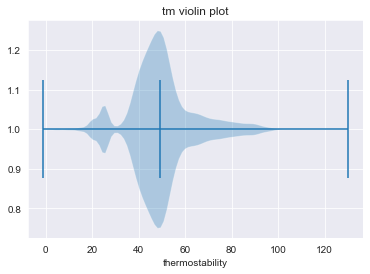

In [23]:
# violin plot (tm)
plt.violinplot(y_train, vert=False, widths=0.5, showmeans=True)
plt.title("tm violin plot") 
plt.xlabel("thermostability")
plt.show()
plt.close("all")

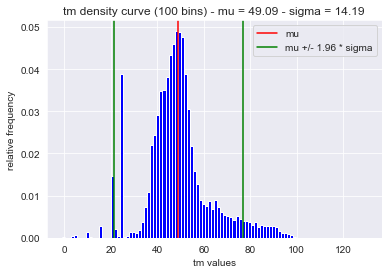

In [24]:
# density curve of label (tm)
bins = 100
plt.hist(y_train, color="b", bins=bins, density=True)
y_mean, y_std = y_stats['mean'], y_stats['std']
plt.axvline(y_mean, color="r", label="mu")
plt.axvline(y_mean-y_std*1.96, color="g", label="mu +/- 1.96 * sigma")
plt.axvline(y_mean+y_std*1.96, color="g")
plt.title(f"tm density curve ({bins} bins) - mu = {y_mean:.2f} - sigma = {y_std:.2f}")
plt.xlabel("tm values"), plt.ylabel("relative frequency")
plt.legend()
plt.show()
plt.close("all")

In [25]:
# normalize data (?)

In [18]:
#!pip install outlier_utils

#from outliers import smirnov_grubbs as grubbs

#result = {}
#for col in X_train.columns:
#    result[col] = grubbs.two_sided_test_indices(np.array(X_train_sc[col]), alpha=0.05)

#print(result)



#### Correlations
(with respect to the output variable)

<b>k best correlations</b> (given an array of correlations)

In [18]:
# get k best scores between features and label -> pearson, spearman, f_regression and multi_info_regression
def get_k_best_corrs(k, scores):
    idxs = np.argsort(scores)[-k:]
    feats = X_train_sc.columns[idxs]
    scores = np.sort(scores)[-k:]
    return {f: c for f, c in zip(feats, scores)}

<b>Pearson and Spearman correlations</b>

In [19]:
# RealPython -> https://realpython.com/numpy-scipy-pandas-correlation-python/

# Linear correlation measures the proximity of the mathematical relationship between variables or dataset features
# to a linear function. If the relationship between the two features is closer to some linear function, then their
# linear correlation is stronger and the absolute value of the correlation coefficient is higher.

# pearson correlations with respect to tm (label) -> measures linear correlations
def pearson_correlations(x: np.ndarray):
    return abs(scipy.stats.pearsonr(x, y_train)[0])

# Rank correlation compares the ranks or the orderings of the data related to two variables or dataset features.
# If the orderings are similar, then the correlation is strong, positive, and high. However, if the orderings are
# close to reversed, then the correlation is strong, negative, and low. In other words, rank correlation is concerned
# only with the order of values, not with the particular values from the dataset.
# Allows to capture non-linear relationships (see figure below).

# spearman correlations with respect to tm (label) -> compares the ranks of data
def spearman_correlations(x: np.ndarray):
    return abs(scipy.stats.spearmanr(x, y_train).correlation)

In [20]:
pearson_corrs = np.apply_along_axis(pearson_correlations, axis=0, arr=X_train_sc)
spearman_corrs = np.apply_along_axis(spearman_correlations, axis=0, arr=X_train_sc)

![title](corrs.png)

In [21]:
# highest 100 pearson correlations
best_pearson = get_k_best_corrs(100, pearson_corrs)
best_pearson

{'DKY': 0.15266814153133518,
 'GQ': 0.15286365153343026,
 'EAQ': 0.15289552301813222,
 'AV': 0.15344493003827891,
 'FAT': 0.15350338513524256,
 'KKM': 0.15442712483828158,
 'AKK': 0.15442951930601523,
 'QT': 0.1546754948448122,
 'KLM': 0.15506147575685586,
 'KPN': 0.15614679682260235,
 'SCL': 0.15649190277972555,
 'GQR': 0.15682237066803156,
 'RTD': 0.15697681444754621,
 'LHK': 0.157142284572514,
 'LVM': 0.15716188338196335,
 'QHL': 0.1572030391749388,
 'KL': 0.15829185569280568,
 'YAD': 0.1584168666638824,
 'GKM': 0.15856469543391877,
 'SKG': 0.15859564646039082,
 'ADG': 0.1587400200194572,
 'HK': 0.15963941435489323,
 'GDT': 0.16125895341758134,
 'TK': 0.1613779793990864,
 'GVN': 0.16198659215162237,
 'FDK': 0.16301496580571873,
 'KM': 0.16308080977110492,
 'THE': 0.16358028851350914,
 'NAD': 0.16516995458724865,
 'YIY': 0.1653405413090765,
 'MVN': 0.16567866339095877,
 'CM': 0.16576213874417398,
 'RQG': 0.16612259484366063,
 'NNT': 0.1662320325215987,
 '_SolventAccessibilityD2025': 

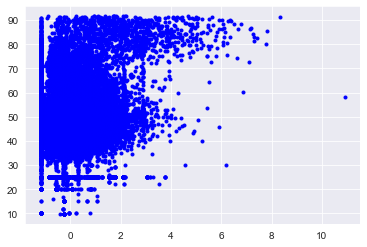

In [40]:
# highest correlation (pearson) -> 'AL'
plt.plot(X_train_sc["AL"], y_train, "b.")

In [22]:
# highest 100 spearman correlations
best_spearman = get_k_best_corrs(100, spearman_corrs)
best_spearman

{'GQR': 0.12962660212067384,
 'ETK': 0.13004809789779256,
 'KRF': 0.1303176805773361,
 'GKM': 0.1303421571404401,
 'LVM': 0.13047556331329602,
 'ADG': 0.13071474455829585,
 'RQG': 0.13098661870594847,
 'TS': 0.13121349362229823,
 'SAN': 0.13125223264214886,
 'NRS': 0.13182856454436126,
 'RTD': 0.13192560905438364,
 'GDT': 0.13196690532358818,
 'VSI': 0.13206023662371805,
 'HK': 0.13212793065896916,
 'YIY': 0.13272219915855835,
 'R': 0.13272362653837938,
 'MVN': 0.13277013284658468,
 'ST': 0.13342347819268413,
 'QT': 0.13358051373961205,
 'EFD': 0.13370615927206225,
 'KLM': 0.13372278039552202,
 'TLI': 0.13403988547059595,
 'STK': 0.13420492753514432,
 'EDN': 0.13447137015118002,
 'KM': 0.13480177065334706,
 'FAT': 0.13537791704118815,
 'RA': 0.13581753888988382,
 'DKG': 0.13605421762315262,
 'THE': 0.1361808260910424,
 'YKP': 0.13641926459247944,
 'KKM': 0.1365192400190705,
 'GQP': 0.13662112389017164,
 'TKK': 0.13698864077372286,
 'KPN': 0.1371519884529183,
 'CLV': 0.13719551451934017

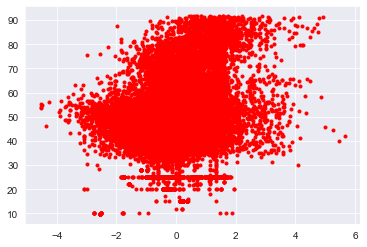

In [43]:
# highest correlation (spearman) -> '_SolventAccessibilityC1'
plt.plot(X_train_sc["_SolventAccessibilityC1"], y_train, "r.")

<b>Univariate linear regression</b> (F-statistic)

In [51]:
# From sklearn docs:
# Univariate linear regression tests returning F-statistic and p-values.
# f_regression is derived from r_regression (Pearson) and will rank features in the same order if all the features are
# positively correlated with the target.

In [ ]:
from sklearn.feature_selection import f_regression

In [ ]:
# highest 100 f-values
f_values, _ = f_regression(X_train_sc, y_train)
best_f_scores = get_k_best_corrs(100, f_values)
best_f_scores

In [30]:
# check if pearson_corrs and f_values are equal
(pearson_corrs == f_values).all()

False

<b>Mutual information regression</b> (MI)

In [55]:
# From sklearn docs:
# Estimate mutual information for a continuous target variable.
# Mutual information (MI) (https://en.wikipedia.org/wiki/Mutual_information) between two random variables is
# a non-negative value, which measures the dependency between the variables. It is equal to zero if and only
# if two random variables are independent, and higher values mean higher dependency.

In [60]:
from sklearn.feature_selection import mutual_info_regression as m_info

In [61]:
# highest 100 mi's (by default, n_neighbors=3 -> explore)
mutual_info = m_info(X_train_sc, y_train)
best_mis = get_k_best_corrs(100, mutual_info)
best_mis

{'_HydrophobicityD2075': 0.32902886547082577,
 '_SecondaryStrD1050': 0.3304501295378115,
 '_PolarizabilityD1050': 0.33054686774029474,
 'H': 0.3309465925258799,
 '_SecondaryStrD1075': 0.3311222768815094,
 '_NormalizedVDWVD2075': 0.33224528918198093,
 '_ChargeD2075': 0.33235799469791427,
 'TurnSSF': 0.3327013710268689,
 '_SecondaryStrD3050': 0.33311620298295797,
 '_SecondaryStrD2075': 0.33439838763635166,
 '_HydrophobicityD2025': 0.3344450393308298,
 '_PolarizabilityD1025': 0.33580054905334755,
 '_PolarityD3075': 0.3358156798436065,
 '_SecondaryStrD2050': 0.33686624673186305,
 '_SecondaryStrD1025': 0.33721485474885604,
 '_HydrophobicityD3075': 0.33740484394942616,
 '_SolventAccessibilityD3025': 0.3375037265858696,
 '_PolarityD2050': 0.3377859468522546,
 '_SecondaryStrD3025': 0.3380721369837483,
 '_PolarityD2075': 0.33863889442838424,
 '_PolarityD2025': 0.33874739462867076,
 '_NormalizedVDWVD3075': 0.33880768727176047,
 '_SolventAccessibilityD3050': 0.33890215147032965,
 '_NormalizedVDWV

#### Creating datasets with best features
(Pearson and Spearman)

In [23]:
# Create new training data based on the top 100 features (for both spearman and pearson)

X_train_SM = X_train_sc_z.loc[:,best_spearman.keys()]
X_train_PS = X_train_sc_z.loc[:,best_pearson.keys()]

In [128]:
X_train_SM.head()

,GQR,ETK,KRF,GKM,LVM,ADG,RQG,TS,SAN,NRS,...,IGM,_SolventAccessibilityT23,QPM,NIW,T,CMA,K,LMY,ICM,_SolventAccessibilityC1
0,-0.287743,-0.301368,-0.289975,-0.248041,-0.26803,1.817367,-0.300111,-0.921269,-0.315313,-0.279966,...,-0.248737,0.151038,-0.218189,-0.192412,0.309394,-0.193642,-0.378718,-0.226035,-0.185827,-0.107799
1,-0.287743,-0.301368,-0.289975,-0.248041,-0.26803,-0.335474,-0.300111,-0.073354,-0.315313,-0.279966,...,-0.248737,-0.458539,-0.218189,-0.192412,-0.678440,-0.193642,-1.029394,-0.226035,-0.185827,1.151108
2,-0.287743,-0.301368,-0.289975,-0.248041,-0.26803,-0.335474,-0.300111,-0.921269,-0.315313,-0.279966,...,-0.248737,-0.702369,-0.218189,-0.192412,-0.970259,-0.193642,0.950440,-0.226035,-0.185827,0.243955
3,-0.287743,-0.301368,-0.289975,-0.248041,-0.26803,-0.335474,-0.300111,-0.126348,-0.315313,-0.279966,...,-0.248737,-0.214708,-0.218189,-0.192412,-0.065802,-0.193642,0.366500,-0.226035,-0.185827,-0.589146
4,-0.287743,-0.301368,-0.289975,-0.248041,-0.26803,-0.335474,-0.300111,0.032636,-0.315313,-0.279966,...,-0.248737,1.705457,-0.218189,-0.192412,1.810782,-0.193642,-0.450274,-0.226035,-0.185827,-1.644406


In [48]:
X_train_PS.head()

,DKY,GQ,EAQ,AV,FAT,KKM,AKK,QT,KLM,KPN,...,LMY,MAI,CMA,NIW,_SolventAccessibilityT23,_SolventAccessibilityC1,ICM,KGQ,AR,AL
0,-0.267463,-0.235935,-0.346617,0.824652,-0.283886,-0.269837,-0.391064,-0.760302,-0.280619,-0.252688,...,-0.225019,-0.241228,-0.192832,-0.191415,0.161105,-0.117881,-0.184867,-0.257779,0.009605,1.140561
1,-0.267463,0.743002,-0.346617,-0.989898,-0.283886,-0.269837,-0.391064,0.337159,-0.280619,-0.252688,...,-0.225019,-0.241228,-0.192832,-0.191415,-0.445497,1.130644,-0.184867,-0.257779,3.146741,-1.184397
2,-0.267463,-0.680907,-0.346617,-0.989898,-0.283886,-0.269837,-0.391064,2.429193,-0.280619,-0.252688,...,-0.225019,-0.241228,-0.192832,-0.191415,-0.688137,0.230972,-0.184867,-0.257779,-0.815957,0.166985
3,-0.267463,-0.680907,-0.346617,-0.445533,-0.283886,-0.269837,-0.391064,-0.760302,-0.280619,-0.252688,...,-0.225019,-0.241228,-0.192832,-0.191415,-0.202856,-0.595258,-0.184867,-0.257779,-0.815957,0.588383
4,-0.267463,-0.680907,-0.346617,-0.336660,-0.283886,-0.269837,-0.391064,4.178271,-0.280619,-0.252688,...,-0.225019,-0.241228,-0.192832,-0.191415,1.707939,-1.641816,-0.184867,-0.257779,-0.072951,-1.184397


#### Correlations
(pairs of variables)

Um problema que pode ocorrer nos dados é a multicolinearidade, quando se observa correlações elevadas entre variáveis independentes. Isto pode fazer com que os resultados obtidos de análises de machine leraning, como na aplicação de regressões lineares, não sejam fidedígnos. **(explicar?)** Desta forma, deve-se remover uma das variáveis altamente correlacionadas, de preferência a que está menos correlacionada com a variável alvo.

Desta forma, criou-se uma função para averiguar a possibilidade de multicolinearidade (usando as correlações de pearson e spearman) e devolvendo os pares de variáveis com correlações elevadas. Na generalidade, considera-se uma correlação elevada quando se obtém um valor absoluto igual ou superior a 0.8.

Após ser analisado uma correlação elevada, compara-se cada variável independente com a dependente, de forma a averiguar qual é a que está menos correlacionada e, portanto, deve ser removida. A função devolve, assim, os pares de variáveis altamente correlacionados, e ainda qual a variável desse par que deverá ser removida.

In [23]:
# Function to determine the independent variables that are highly correlated with one another
# (they result in less reliable statistical inference)

def _check_xy_corr(y_data:pd.DataFrame, var1:str, var2:str):
    """
    Returns the name of the variable worse correlated to y
    """
    corr1 = y_data.loc[var1,:]
    corr2 = y_data.loc[var2,:]

    if corr1 < corr2:
        return var1
    else:
        return var2


def multicolinearity(x_data:pd.DataFrame, y_data:pd.DataFrame, perc:float=0.8, method="pearson") -> list:
    """
    Selects pair os variables with collinearity above a given threshold.

    Parameters
    ----------
    :param x_data: Dataframe with independent variables
    :param y_var: Indicates column index or name of the dependent variable. If non-existent, define this parameter as None.
    :param perc: Collinearity percentage threshold
    :param method: Method to determine correlation between variables ('pearson', 'kendall', 'spearman')
    """

    corr = x_data.corr(method=method.lower())
    result = []
    check = 1
    for l in corr:
        for ix,val in enumerate(corr[l][check:]):
            if val>=perc:
                var1, var2 = (l, corr.index[ix])
                if y_data:
                    least_corr = _check_xy_corr(y_data, var1, var2)
                    result.append(((var1, var2), least_corr))
                else:
                    result.append((var1, var2))
            check += 1
    return result

In [24]:
multicol_sm = multicolinearity(X_train_SM, y_train, perc=0.8, method="spearman")

for elem in multicol_sm:
    print(elem)
#Multicollinearity non-existent

In [25]:
multicol_ps = multicolinearity(X_train_PS, y_train, perc=0.8, method="pearson")

for elem in multicol_ps:
    print(elem)
#Multicollinearity non-existent

Em nenhum dos casos (considerando os 100 descritores mais relevantes pelo método de spearman e pearson) se observou multicolinearidade.

Caso tivesse sido observado, utilizaríamos o seguinte bloco de código para remover as variáveis menos correlacionadas com a variável dependente.

In [67]:
# Eliminate variables with multicollinearity

#pairs, least_corr = list(zip(*multicol))
#least_corr = set(least_corr)

#for elem in least_corr:
#    del X_train[elem]

# Unsupervised learning

Passando para a análise dos dados, começamos aplicar algoritmos de aprendizagem não-supervisionada, ou seja, que não tem em conta a variável dependente. Retiram inferências apenas a partir dos descritores, podendo ser aplicados para reduzir a dimensionalidade do dataset, e até mesmo agrupar os dados de acordo com a sua proximidade.

Os algoritmos de aprendizagem não-supervivionada, como o PCA, são sensíveis às escalas dos valores e outliers. Uma vez que já se efetuou a standardização dos dados, não é necessário efetuar esse passo novamente. Relativamente aos outliers, procuraram-se as linhas que contêm apenas valores inferiores a 3, ou seja, que contêm valores inferiores a 3 vezes o desvio padrão (considerando-se outlier). Desta forma, são removidas as linhas que não satisfazem esta condição.

In [49]:
#Removing outliers



X_train_PS_clean = X_train_PS[(np.abs(X_train_PS) < 3).all(axis=1)]
X_train_PS_clean.index = range(len(X_train_PS_clean))
X_train_SM_clean = X_train_SM[(np.abs(X_train_SM) < 3).all(axis=1)]
X_train_SM_clean.index = range(len(X_train_SM_clean))

y_train_PS = y_train.loc[list((np.abs(X_train_PS) < 3).all(axis=1))]
y_train_PS.index = range(len(y_train_PS))
y_train_SM = y_train.loc[list((np.abs(X_train_SM) < 3).all(axis=1))]
y_train_SM.index = range(len(y_train_SM))

print(X_train_PS.shape)
print(X_train_PS_clean.shape)
print(y_train_PS.shape)
print()
print(X_train_SM.shape)
print(X_train_SM_clean.shape)
print(y_train_SM.shape)
#df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

(28403, 100)
(5948, 100)
(5948,)

(28403, 100)
(6477, 100)
(6477,)


In [30]:
X_train_PS_clean.head()

,DKY,GQ,EAQ,AV,FAT,KKM,AKK,QT,KLM,KPN,...,LMY,MAI,CMA,NIW,_SolventAccessibilityT23,_SolventAccessibilityC1,ICM,KGQ,AR,AL
15,-0.267463,0.431522,-0.346617,-0.082623,-0.283886,-0.269837,-0.391064,0.954480,-0.280619,-0.252688,...,-0.225019,-0.241228,-0.192832,-0.191415,0.464406,-0.521816,-0.184867,-0.257779,0.215995,0.254170
16,-0.267463,0.720753,-0.346617,0.389160,-0.283886,-0.269837,-0.391064,-0.314459,-0.280619,-0.252688,...,-0.225019,-0.241228,-0.192832,-0.191415,-0.384836,0.084086,-0.184867,-0.257779,-0.299981,0.094330
19,-0.267463,-0.146941,-0.346617,-0.554406,-0.283886,-0.269837,-0.391064,0.062793,-0.280619,-0.252688,...,-0.225019,-0.241228,-0.192832,-0.191415,0.858697,-0.852308,-0.184867,-0.257779,-0.320620,-0.835654
29,-0.267463,-0.680907,-0.346617,-0.391097,-0.283886,-0.269837,-0.391064,-0.760302,-0.280619,-0.252688,...,-0.225019,-0.241228,-0.192832,-0.191415,-0.263516,0.561464,-0.184867,-0.257779,0.546220,0.239639
31,-0.267463,0.387025,-0.346617,-0.554406,-0.283886,-0.269837,-0.391064,-0.760302,-0.280619,-0.252688,...,-0.225019,-0.241228,-0.192832,-0.191415,-0.172526,-0.319848,-0.184867,-0.257779,0.174717,-0.138166


Foi possível remover 22222 amostras do dataset do pearson, e 21726 amostras do dataset do spearman. As novas variáveis criadas têm valores mais homogênios que vão permitir uma prestação mais fidedígna dos algoritmos de aprendizagem não-supervisionada. Vamos analisar o efeito de 2 algoritmos: **PCA** e **tSNE**.

#### PCA

Começamos com o algorítmo do PCA (Principal Components Analysis). Este algoritmo tem o objetivo de reduzir a dimensionalidade, ao encontrar uma nova forma de representar os dados que explique o máximo da variância possível. Desta forma, é geralmente possível eliminar informação que não contribui muito para a variabilidade dos dados, fornecendo dados menos ruidosos aos eventuais algoritmos de aprendizagem aplicados.

In [50]:
from sklearn.decomposition import PCA

pca_SM = PCA()
pca_SM.fit(X_train_SM_clean)
x_reduced_SM = pca_SM.transform(X_train_SM_clean)

pca_PS = PCA()
pca_PS.fit(X_train_PS_clean)
x_reduced_PS = pca_PS.transform(X_train_PS_clean)

[1.58349946e+01 1.19868417e+01 7.69860902e+00 5.78776121e+00
 4.55715104e+00 3.61589294e+00 3.09353735e+00 2.80958183e+00
 2.66072014e+00 2.34178112e+00 2.09030455e+00 1.95181483e+00
 1.92950259e+00 1.77384607e+00 1.70977808e+00 1.68653116e+00
 1.57966308e+00 1.48635047e+00 1.36186695e+00 1.30986550e+00
 1.25323662e+00 1.10317744e+00 1.07231966e+00 1.00774743e+00
 9.86784333e-01 9.46418059e-01 9.26852830e-01 8.92194457e-01
 8.77838259e-01 8.48371205e-01 8.46325056e-01 8.29659537e-01
 8.01798273e-01 7.94884979e-01 7.80413081e-01 7.67277296e-01
 7.44147847e-01 7.16520115e-01 7.05616514e-01 6.92158194e-01
 6.65515813e-01 5.57787611e-01 5.55566651e-01 5.27902376e-01
 5.06248142e-01 4.82487518e-01 4.39759189e-01 4.06054190e-01
 4.02015064e-01 3.83264184e-01 2.13263837e-01 3.12417291e-30
 1.00606850e-30 9.32823811e-31 6.77004404e-31 4.91479842e-31
 4.90945494e-31 3.03792203e-31 2.53950748e-31 2.40682866e-31
 1.30506360e-31 9.62562489e-32 8.45212637e-32 8.45212637e-32
 8.45212637e-32 8.452126

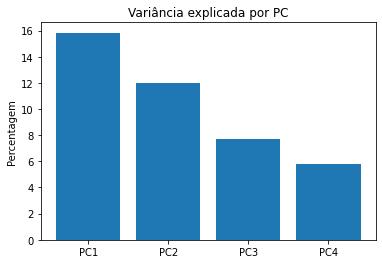

In [51]:
print(pca_SM.explained_variance_ratio_*100)

print()
print("Spearman:")
print(f"Número total de PCs: {pca_SM.n_components_}")
print(f"Número de PCs necessários para explicar 95% da variância: \
{sum(pca_SM.explained_variance_ratio_.cumsum() < 0.95) + 1}")

plt.bar(range(4), pca_SM.explained_variance_ratio_[:4]*100)
plt.xticks(range(4), ['PC'+str(i) for i in range(1,5)])
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")
plt.show()

[1.37852940e+01 1.16982816e+01 9.24791356e+00 6.62364218e+00
 5.17924856e+00 4.23030726e+00 3.15678657e+00 2.96802570e+00
 2.75196204e+00 2.59458985e+00 2.07394720e+00 2.06367677e+00
 1.93450496e+00 1.87517368e+00 1.78896947e+00 1.67624857e+00
 1.56575690e+00 1.53979298e+00 1.48090454e+00 1.44162142e+00
 1.34480829e+00 1.20400829e+00 1.12530345e+00 1.09938136e+00
 9.86151953e-01 9.26902232e-01 8.61259244e-01 8.56166813e-01
 8.48130658e-01 8.13589295e-01 7.91618237e-01 7.36713830e-01
 7.26963634e-01 7.06370113e-01 6.50835634e-01 6.21134742e-01
 5.93519139e-01 5.72303308e-01 5.35604244e-01 5.14758114e-01
 5.03816602e-01 4.96057283e-01 4.45902545e-01 4.34321668e-01
 4.02778364e-01 3.97518502e-01 3.81252062e-01 2.98513360e-01
 2.56083975e-01 1.91585319e-01 2.71890802e-30 7.99448038e-31
 6.01647897e-31 4.84908893e-31 4.28612401e-31 4.08482469e-31
 3.30915483e-31 2.52591868e-31 1.93035826e-31 1.55499273e-31
 9.69289533e-32 6.17276016e-32 6.17276016e-32 6.17276016e-32
 6.17276016e-32 6.172760

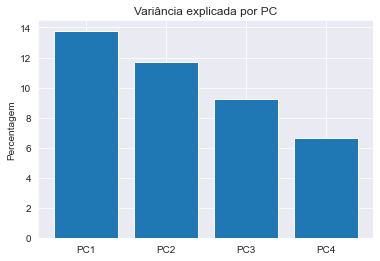

In [132]:
print(pca_PS.explained_variance_ratio_*100)

print()
print("Pearson:")
print(f"Número total de PCs: {pca_PS.n_components_}")
print(f"Número de PCs necessários para explicar 95% da variância: \
{sum(pca_PS.explained_variance_ratio_.cumsum() < 0.95) + 1}")

plt.bar(range(4), pca_PS.explained_variance_ratio_[:4]*100)
plt.xticks(range(4), ['PC'+str(i) for i in range(1,5)])
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")
plt.show()

Os resultados demonstram que, para os 100 melhores features selecionados pelo método de spearman, é possível utilizar apenas 41 componentes para explicar 95% da variância, e para os 100 features selecionados pelo método de spearman, é possível utilizar apenas 38 componentes.

*NOTA: ao utilizar os dados isentos de outliers (valores standardizados superiores a 3), obtivemos resultados muito insatisfatórios na aprendizagem supervisionada, pelo que decidimos não utilizar estes dados, nem os reduzidos pelo PCA.*

#### t-SNE

tSNE ('t-distributed Stochastic Neighbor Embedding') aplica um método de redução de dimensionalidade semelhante ao PCA, mas tem como principal foco a visualização dos dados transformados. Neste caso, é necessário definir em quantos grupos deverão ser separados os dados. Como a variável dependente se trata de de valores contínuos, não é óbvio o número de grupos que se deverá separar os dados. Desta forma, optou-se por separá-los em 3 grupos baseados na variável dependente:

- os que estão próximos da média;
- os que estão acima de um desvio-padrão da média;
- os que estão abaixo de um desvio-padrão da média.

Apesar deste algoritmo não ser tão sensível a outliers como no caso do PCA, vamos efetuar a análise sem outliers para visualizar melhor os gráficos resultantes. É, contudo, um algoritmo com elevado peso computacional, pelo que pode demorar bastante tempo a correr.

In [52]:
mean = y_train.mean()
std = y_train.std()

ub = mean+std
lb = mean-std

In [53]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=1000)

points_sm = tsne.fit_transform(X_train_SM_clean)
points_ps = tsne.fit_transform(X_train_PS_clean)

group1_sm = y_train_SM.index[y_train_SM > ub]
group2_sm = y_train_SM.index[(y_train_SM <= ub) & (y_train_SM > lb)]
group3_sm = y_train_SM.index[y_train_SM <= lb]

group1_ps = y_train_PS.index[y_train_PS > ub]
group2_ps = y_train_PS.index[(y_train_PS <= ub) & (y_train_PS > lb)]
group3_ps = y_train_PS.index[y_train_PS <= lb]

C:\Users\rober\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


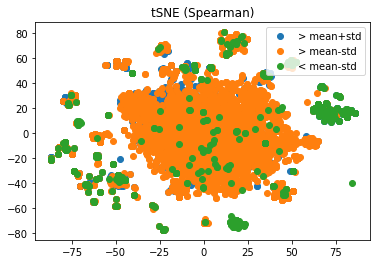

In [54]:
for group, lab in zip((group1_sm, group2_sm, group3_sm), ("> mean+std", "> mean-std", "< mean-std")):
    plt.plot(points_sm[group,0], points_sm[group,1], "o", label=lab)
plt.title("tSNE (Spearman)")
plt.legend(loc="best")
plt.show()

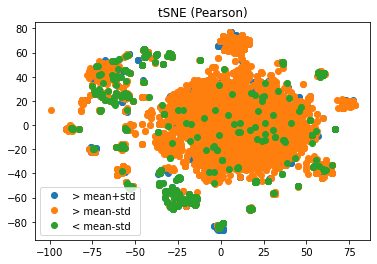

In [55]:
for group, lab in zip((group1_ps, group2_ps, group3_ps), ("> mean+std", "> mean-std", "< mean-std")):
    plt.plot(points_ps[group,0], points_ps[group,1], "o", label=lab)
plt.title("tSNE (Pearson)")
plt.legend(loc="best")
plt.show()

Os resultados demonstram que não é possível separar de forma clara os pontos com base nos grupos definidos.

#### KMeans

...

In [57]:
from sklearn.cluster import KMeans

k=3
kmeans_sm = KMeans(n_clusters=k, max_iter=1000)
kmeans_ps = KMeans(n_clusters=k, max_iter=1000)

#Using the TSNE fitted points for the KMeans analysis
kmeans_sm.fit(points_sm)
kmeans_ps.fit(points_ps)


labels_sm = kmeans_sm.labels_
labels_ps = kmeans_ps.labels_

centroids_sm = kmeans_ps.cluster_centers_
centroids_ps = kmeans_sm.cluster_centers_

In [58]:
pd.crosstab(labels_ps, y_train_PS, rownames=['clusters'] )

tm,10.0,12.0,15.0,16.6,17.2,20.0,21.7,22.0,22.5,23.0,...,90.3,90.4,90.7,90.8,91.0,91.1,91.2,91.4,91.5,91.6
clusters,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,2,0,0,0,3,...,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,1,6,3,3,2,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,0,1,0,0,0,1,0,0,...,2,1,2,1,2,1,1,1,1,0


In [59]:
pd.crosstab(labels_sm, y_train_SM, rownames=['clusters'] )

tm,10.0,12.0,15.0,16.6,20.0,21.7,22.0,22.5,23.1,23.5,...,90.6,90.7,90.8,91.0,91.1,91.2,91.3,91.4,91.5,91.6
clusters,,,,,,,,,,,,,,,,,,,,,
0,2,3,0,1,1,3,1,2,1,1,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,7,0,3,0,0,0,...,1,2,2,2,1,0,1,2,1,1


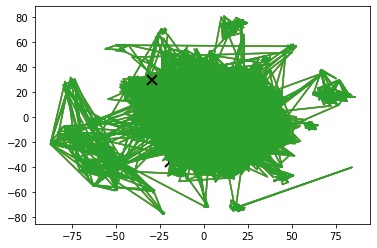

In [61]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = points_sm[list(np.where(labels_sm==i)[0]),:]
    #print(ds)

    # plot the data observations (only 2 first colums)
    plt.plot(points_sm[:,0], points_sm[:,1])
    #plt.plot(ds["_SolventAccessibilityT23"],ds["_SolventAccessibilityC1"],'o')
    # plot the centroids
    lines = plt.plot(centroids_sm[i,0],centroids_sm[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=10.0)    # x size
    plt.setp(lines,mew=2.0)    # line thickness
plt.show()

In [47]:
list(np.where(labels_sm==i)[0])

[1517,
 1705,
 3009,
 3218,
 3219,
 3220,
 3221,
 3231,
 3232,
 3233,
 3234,
 3237,
 3238,
 3239,
 3245,
 3246,
 3247,
 3248,
 3249,
 3262,
 3263,
 3264,
 3265,
 3266,
 3267,
 3275,
 3276,
 3277,
 3278,
 3296,
 3297,
 3298,
 3299,
 3300,
 3301,
 3302,
 3303,
 3304,
 3305,
 3306,
 3307,
 3308,
 3309,
 3310,
 3311,
 3312,
 3313,
 3314,
 3315,
 3316,
 3317,
 3318,
 3319,
 3320,
 3321,
 3322,
 3323,
 3324,
 3325,
 3326,
 3327,
 3328,
 3329,
 3330,
 3331,
 3332,
 3333,
 3334,
 3335,
 3336,
 3337,
 3338,
 3339,
 3340,
 3341,
 3342,
 3343,
 3344,
 3345,
 3346,
 3347,
 3348,
 3349,
 3350,
 3351,
 3352,
 3353,
 3354,
 3355,
 3356,
 3357,
 3358,
 3359,
 3360,
 3361,
 3362,
 3363,
 3364,
 3365,
 3366,
 3367,
 3368,
 3369,
 3370,
 3371,
 3372,
 3373,
 3374,
 3375,
 3376,
 3377,
 3378,
 3379,
 3380,
 3381,
 3382,
 3383,
 3384,
 3385,
 3386,
 3387,
 3388,
 3389,
 3390,
 3391,
 3392,
 3393,
 3394,
 3395,
 3396,
 3397,
 3398,
 3399,
 3400,
 3401,
 3402,
 3403,
 3404,
 3405,
 3406,
 3407,
 3408,
 3409,

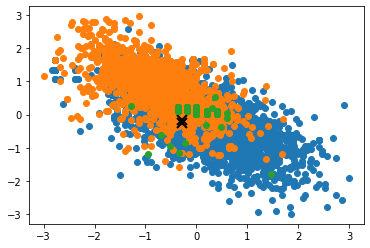

In [48]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = X_train_PS_clean.iloc[list(np.where(labels_ps==i)[0])]
    # plot the data observations (only 2 first colums)
    plt.plot(ds["_SolventAccessibilityT23"],ds["_SolventAccessibilityC1"],'o')
    # plot the centroids
    lines = plt.plot(centroids_ps[i,0],centroids_ps[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=10.0)    # x size
    plt.setp(lines,mew=2.0)    #grossura da linha
plt.show()

# Supervised learning

Por fim, aplicámos algoritmos de aprendizagem supervisionada de modo a conseguirmos fazer previsões acerca da variável de output (<b>tm</b>) a partir de sequências de aminoácidos cujo valor de termostabilidade é desconhecido. Para isso, utilizámos sete algoritmos distintos implementados na biblioteca <b>sklearn</b>.

- <b>LinearRegression</b> (LR)
- <b>KNeighborsRegressor</b> (KNR)
- <b>RandomForestRegressor</b> (RFR)
- <b>SVR</b> -> Support Vector Regressor
- <b>MLPRegressor</b> (MLPR) -> Multi Layer Perceptron Regressor
- <b>AdaBoostRegressor</b> (ADA)
- <b>HistGradientBoostingRegressor</b> (HGBR)

### Get best combination dataset-model

In [35]:
from sklearn.ensemble import AdaBoostRegressor as ADA
from sklearn.ensemble import HistGradientBoostingRegressor as HGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import cross_validate, KFold
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.neural_network import MLPRegressor as MLPR
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

Começámos por determinar, a partir de cada um dos métodos de seleção de features referidos anteriormente (<b>Pearson</b>, <b>Spearman</b>, <b>ANOVA f-values</b> e <b>informação mútua</b>), qual a melhor combinação <b>modelo / número de features selecionadas</b>.

In [55]:
DEFAULT_NUMS = [200, 400, 600, 800]

In [56]:
def test_corr_models(model, method, corrs, cv=5, num_feats=DEFAULT_NUMS):
    print(f"Getting results for {model.__class__.__name__} using {method} to select features...\n")
    for k in num_feats:
        # get best corrs and cross-validate
        best_scores = get_k_best_corrs(k, corrs) # Get best features
        result = cross_validate(estimator=model,
                                X=X_train_sc.loc[:, best_scores.keys()],
                                y=y_train,
                                cv=KFold(n_splits=cv, shuffle=True),
                                return_train_score=True)
        # print results
        mean_train = np.sum(result["train_score"]) / cv
        mean_test = np.sum(result["test_score"]) / cv
        print(f"Results for {k} best features")
        print(f"Train scores: {result['train_score']} -> {mean_train = :.4f}")
        print(f"Test scores: {result['test_score']} -> {mean_test = :.4f}\n")

<b>Pearson</b>

In [58]:
for i, Model in enumerate([LR, RFR, SVR, MLPR, ADA, HGBR]):
    test_corr_models(model=Model(), method="Pearson correlation", corrs=pearson_corrs)
    if i < 5:
        print("----------------------------------------------------------------------------------------------------\n")

Getting results for LinearRegression using Pearson correlation to select features...

Results for 200 best features
Train scores: [0.31830325 0.31392415 0.31633945 0.31182916 0.3066358 ] -> mean_train = 0.3134
Test scores: [0.27919092 0.29974493 0.29115746 0.30118958 0.33140716] -> mean_test = 0.3005

Results for 400 best features
Train scores: [0.39371228 0.38799135 0.39360352 0.39383614 0.39987173] -> mean_train = 0.3938
Test scores: [0.38300769 0.35232374 0.37767527 0.37743098 0.35830092] -> mean_test = 0.3697

Results for 600 best features
Train scores: [0.42371335 0.4146264  0.42294396 0.42536268 0.42076352] -> mean_train = 0.4215
Test scores: [0.37103912 0.37512818 0.38437575 0.3865769  0.40484428] -> mean_test = 0.3844

Results for 800 best features
Train scores: [0.43373677 0.43318539 0.43969612 0.43861505 0.43600294] -> mean_train = 0.4362
Test scores: [0.41054996 0.3655078  0.38919964 0.39444717 0.36578661] -> mean_test = 0.3851

----------------------------------------------

/Users/antonioduarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonioduarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonioduarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonioduarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

Results for 200 best features
Train scores: [0.52105186 0.51666136 0.51690926 0.52675541 0.52715188] -> mean_train = 0.5217
Test scores: [0.43688842 0.45549741 0.42600597 0.45694164 0.44466639] -> mean_test = 0.4440



/Users/antonioduarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonioduarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonioduarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonioduarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

Results for 400 best features
Train scores: [0.46204741 0.49887642 0.4694671  0.45133553 0.50712451] -> mean_train = 0.4778
Test scores: [0.42765406 0.46299803 0.43444477 0.43355555 0.45313489] -> mean_test = 0.4424



/Users/antonioduarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonioduarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonioduarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonioduarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

Results for 600 best features
Train scores: [0.50828932 0.48730197 0.53997773 0.52672009 0.51295359] -> mean_train = 0.5150
Test scores: [0.48259759 0.42385795 0.48960782 0.47330764 0.47066749] -> mean_test = 0.4680



/Users/antonioduarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonioduarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonioduarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonioduarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

Results for 800 best features
Train scores: [0.55768337 0.53201379 0.57710713 0.54583701 0.53376656] -> mean_train = 0.5493
Test scores: [0.50072421 0.44872076 0.47927216 0.48096196 0.48445523] -> mean_test = 0.4788

----------------------------------------------------------------------------------------------------

Getting results for AdaBoostRegressor using Pearson correlation to select features...

Results for 200 best features
Train scores: [0.30878064 0.31747994 0.2821283  0.33309379 0.30994882] -> mean_train = 0.3103
Test scores: [0.31653165 0.28572524 0.27650359 0.31991506 0.28990877] -> mean_test = 0.2977

Results for 400 best features
Train scores: [0.31737068 0.33604038 0.30093692 0.30342464 0.29648123] -> mean_train = 0.3109
Test scores: [0.3274757  0.33384534 0.29182668 0.27977979 0.28082602] -> mean_test = 0.3028

Results for 600 best features
Train scores: [0.31718018 0.28876691 0.30003358 0.29836457 0.32519596] -> mean_train = 0.3059
Test scores: [0.29306934 0.26952092 

(BEFORE UPDATING CV)

Getting results for LinearRegression using Pearson correlation...

Results for 100 best features
Train scores: [0.27011736 0.28650022 0.22313226 0.26490225 0.26940456] -> mean_train = 0.2628
Test scores: [0.14711361 0.10705096 0.27218331 0.20173697 0.18240789] -> mean_test = 0.1821

Results for 400 best features
Train scores: [0.41665499 0.39386691 0.3850985  0.39537238 0.41242381] -> mean_train = 0.4007
Test scores: [0.08573871 0.2893108  0.33210872 0.30932031 0.1514813 ] -> mean_test = 0.2336

Results for 800 best features
Train scores: [0.44620921 0.43236111 0.43381858 0.43981191 0.4531923 ] -> mean_train = 0.4411
Test scores: [0.06293847 0.27328139 0.33204977 0.30332439 0.17662368] -> mean_test = 0.2296

Results for 1200 best features
Train scores: [0.47941186 0.45920366 0.44087096 0.46595271 0.46848766] -> mean_train = 0.4628
Test scores: [0.08041124 0.27869326 0.287661   0.29106935 0.1168009 ] -> mean_test = 0.2109

--------------------------------------------------------------------------------

Getting results for RandomForestRegressor using Pearson correlation...

Results for 100 best features
Train scores: [0.81861813 0.84025213 0.85172038 0.81723961 0.82355589] -> mean_train = 0.8303
Test scores: [0.22094994 0.23278113 0.25640221 0.31260307 0.2571411 ] -> mean_test = 0.2560

Results for 400 best features
Train scores: [0.84739424 0.86756812 0.87518231 0.84538561 0.85187832] -> mean_train = 0.8575
Test scores: [0.23421498 0.35857337 0.24336712 0.36769986 0.31232961] -> mean_test = 0.3032

Results for 800 best features
Train scores: [0.84771979 0.86827125 0.87595901 0.8461804  0.85253105] -> mean_train = 0.8581
Test scores: [0.22143367 0.32069786 0.19008172 0.38143426 0.31148471] -> mean_test = 0.2850

Results for 1200 best features
Train scores: [0.87676433 0.90002164 0.89224492 0.87385361 0.87793775] -> mean_train = 0.8842
Test scores: [0.27083525 0.33920909 0.20056345 0.38527337 0.27747011] -> mean_test = 0.2947

--------------------------------------------------------------------------------

Getting results for AdaBoostRegressor using Pearson correlation...

Results for 100 best features
Train scores: [0.21789023 0.24789051 0.1688259  0.1946165  0.24299579] -> mean_train = 0.2144
Test scores: [0.0217743  0.0393838  0.06749173 0.11066504 0.1454537 ] -> mean_test = 0.0770

Results for 400 best features
Train scores: [0.32242365 0.32898748 0.27168506 0.28805197 0.30137941] -> mean_train = 0.3025
Test scores: [0.12702293 0.20443145 0.13614342 0.22957511 0.14922126] -> mean_test = 0.1693

Results for 800 best features
Train scores: [0.29640638 0.31946727 0.28776308 0.29008702 0.32292222] -> mean_train = 0.3033
Test scores: [0.09409807 0.17705651 0.13124845 0.21650374 0.18319332] -> mean_test = 0.1604

Results for 1200 best features
Train scores: [0.30405968 0.21448556 0.23909915 0.28300452 0.30514278] -> mean_train = 0.2692
Test scores: [0.07639932 0.08501833 0.0728567  0.18245674 0.12884878] -> mean_test = 0.1091

--------------------------------------------------------------------------------

Getting results for SVR using Pearson correlation...

Results for 100 best features
Train scores: [0.31371592 0.31834536 0.3022404  0.31092042 0.31666435] -> mean_train = 0.3124
Test scores: [0.21283891 0.16427215 0.07069547 0.25263497 0.24485791] -> mean_test = 0.1891

Results for 400 best features
Train scores: [0.28378963 0.26807723 0.24905719 0.26710835 0.28725249] -> mean_train = 0.2711
Test scores: [0.18274096 0.15177209 0.24838459 0.22915948 0.18186443] -> mean_test = 0.1988

Results for 800 best features
Train scores: [0.27629772 0.25743841 0.23863574 0.26184484 0.27565766] -> mean_train = 0.2620
Test scores: [0.17035563 0.15027543 0.22394396 0.19866285 0.16760289] -> mean_test = 0.1822

Results for 1200 best features
Train scores: [0.26972242 0.25406078 0.23311293 0.25886046 0.27116362] -> mean_train = 0.2574
Test scores: [0.16767649 0.14030832 0.19821048 0.1878921  0.1576652 ] -> mean_test = 0.1704

--------------------------------------------------------------------------------

Getting results for MLPRegressor using Pearson correlation...

Results for 100 best features
Train scores: [0.45202777 0.43871447 0.45321541 0.45765465 0.45912327] -> mean_train = 0.4521
Test scores: [ 0.2031334   0.16033084 -0.08987277  0.2116972   0.15462226] -> mean_test = 0.1280

Results for 400 best features
Train scores: [0.47475198 0.4923954  0.50451639 0.50400392 0.47938821] -> mean_train = 0.4910
Test scores: [0.23719782 0.36519414 0.2931955  0.35681098 0.23217787] -> mean_test = 0.2969

Results for 800 best features
Train scores: [0.55805531 0.56752787 0.54657214 0.52045875 0.54403841] -> mean_train = 0.5473
Test scores: [0.14783581 0.36859843 0.27241315 0.3401092  0.34026483] -> mean_test = 0.2938

Results for 1200 best features
Train scores: [0.60004007 0.60734283 0.6379186  0.53613144 0.58864283] -> mean_train = 0.5940
Test scores: [0.18884443 0.32031392 0.36322389 0.28063518 0.31413352] -> mean_test = 0.2934




(Z-scores)

Getting results for LinearRegression using Pearson correlation...

Results for 100 best features
Train scores: [0.67160102 0.6689632  0.68186929 0.66149608 0.67386646] -> mean_train = 0.6716
Test scores: [-1.07791337 -0.18159527 -0.02480662 -0.27529876 -1.04734993] -> mean_test = -0.5214

Results for 400 best features
Train scores: [0.67160102 0.6689632  0.68186929 0.66149608 0.67386646] -> mean_train = 0.6716
Test scores: [-1.07791337 -0.18159527 -0.02480662 -0.27529876 -1.04734993] -> mean_test = -0.5214

Results for 800 best features
Train scores: [0.67160102 0.6689632  0.68186929 0.66149608 0.67386646] -> mean_train = 0.6716
Test scores: [-1.07791337 -0.18159527 -0.02480662 -0.27529876 -1.04734993] -> mean_test = -0.5214

--------------------------------------------------------------------------------

Getting results for RandomForestRegressor using Pearson correlation...

Results for 100 best features
Train scores: [0.80727911 0.83041557 0.84220175 0.80666646 0.81338696] -> mean_train = 0.8200
Test scores: [0.1891794  0.18649405 0.18417251 0.27658475 0.22553633] -> mean_test = 0.2124

Results for 400 best features
Train scores: [0.84161805 0.86398035 0.86833273 0.84003347 0.84644822] -> mean_train = 0.8521
Test scores: [0.19887344 0.31872482 0.23552122 0.35482832 0.28120151] -> mean_test = 0.2778

Results for 800 best features
Train scores: [0.84235855 0.86518026 0.86934521 0.8409079  0.84660065] -> mean_train = 0.8529
Test scores: [0.18125953 0.29988959 0.12022268 0.3604441  0.2963378 ] -> mean_test = 0.2516

--------------------------------------------------------------------------------

Getting results for AdaBoostRegressor using Pearson correlation...

Results for 100 best features
Train scores: [0.24087864 0.23950204 0.16925286 0.19086963 0.25147329] -> mean_train = 0.2184
Test scores: [0.08491198 0.0297712  0.16957604 0.10801696 0.14612454] -> mean_test = 0.1077

Results for 400 best features
Train scores: [0.29832073 0.31678918 0.27567914 0.30577065 0.30121334] -> mean_train = 0.2996
Test scores: [0.0998887  0.18089942 0.15771938 0.25511451 0.15684757] -> mean_test = 0.1701

Results for 800 best features
Train scores: [0.34946497 0.26841796 0.33437571 0.29196208 0.33172762] -> mean_train = 0.3152
Test scores: [0.1768113  0.12819227 0.15462779 0.20862672 0.19958328] -> mean_test = 0.1736

--------------------------------------------------------------------------------

Getting results for SVR using Pearson correlation...

Results for 100 best features
Train scores: [0.3470447  0.34487087 0.35734174 0.34269595 0.35251758] -> mean_train = 0.3489
Test scores: [0.18790998 0.14018134 0.10888095 0.225853   0.22270535] -> mean_test = 0.1771

Results for 400 best features
Train scores: [0.40986956 0.39526794 0.41410988 0.39641576 0.41763621] -> mean_train = 0.4067
Test scores: [0.206643   0.18902751 0.11136261 0.27958821 0.22978204] -> mean_test = 0.2033

Results for 800 best features
Train scores: [0.42662508 0.4044915  0.4269925  0.40696331 0.42792255] -> mean_train = 0.4186
Test scores: [0.20535089 0.19830048 0.1409307  0.28567528 0.23900059] -> mean_test = 0.2139

--------------------------------------------------------------------------------

Getting results for MLPRegressor using Pearson correlation...

Results for 100 best features
Train scores: [0.53202    0.52313445 0.57137021 0.53976422 0.54659028] -> mean_train = 0.5426
Test scores: [-0.05543219  0.1250431   0.2640586   0.1859917   0.05506732] -> mean_test = 0.1149

Results for 400 best features
Train scores: [0.78213761 0.78802413 0.82398603 0.7461426  0.77420503] -> mean_train = 0.7829
Test scores: [-0.17832807  0.17922449 -0.82818129  0.17095727 -0.17155348] -> mean_test = -0.1656

Results for 800 best features
Train scores: [0.65240063 0.81298679 0.85650392 0.80202072 0.81944741] -> mean_train = 0.7887
Test scores: [-0.3428903   0.13659494 -6.15435645  0.14391498 -0.25913343] -> mean_test = -1.2952


(AFTER UPDATING CV)

Getting results for LinearRegression using Pearson correlation to select features...

Results for 200 best features
Train scores: [0.31830325 0.31392415 0.31633945 0.31182916 0.3066358 ] -> mean_train = 0.3134
Test scores: [0.27919092 0.29974493 0.29115746 0.30118958 0.33140716] -> mean_test = 0.3005

Results for 400 best features
Train scores: [0.39371228 0.38799135 0.39360352 0.39383614 0.39987173] -> mean_train = 0.3938
Test scores: [0.38300769 0.35232374 0.37767527 0.37743098 0.35830092] -> mean_test = 0.3697

Results for 600 best features
Train scores: [0.42371335 0.4146264  0.42294396 0.42536268 0.42076352] -> mean_train = 0.4215
Test scores: [0.37103912 0.37512818 0.38437575 0.3865769  0.40484428] -> mean_test = 0.3844

Results for 800 best features
Train scores: [0.43373677 0.43318539 0.43969612 0.43861505 0.43600294] -> mean_train = 0.4362
Test scores: [0.41054996 0.3655078  0.38919964 0.39444717 0.36578661] -> mean_test = 0.3851

----------------------------------------------------------------------------------------------------

Getting results for RandomForestRegressor using Pearson correlation to select features...

Results for 200 best features
Train scores: [0.86762202 0.86455812 0.86756847 0.8654831  0.86635326] -> mean_train = 0.8663
Test scores: [0.46893692 0.47474253 0.47183767 0.47635708 0.46603657] -> mean_test = 0.4716

Results for 400 best features
Train scores: [0.86865287 0.8708922  0.86909876 0.86407208 0.87073908] -> mean_train = 0.8687
Test scores: [0.48321788 0.4651082  0.48409388 0.51644364 0.45168042] -> mean_test = 0.4801

Results for 600 best features
Train scores: [0.86692848 0.86931937 0.86943738 0.86686052 0.87293123] -> mean_train = 0.8691
Test scores: [0.4851075  0.48528567 0.49189294 0.52378137 0.46479614] -> mean_test = 0.4902

Results for 800 best features
Train scores: [0.86701671 0.86933204 0.87158342 0.86787022 0.87067643] -> mean_train = 0.8693
Test scores: [0.50926646 0.47984863 0.4709283  0.48995825 0.4742135 ] -> mean_test = 0.4848

----------------------------------------------------------------------------------------------------

Getting results for SVR using Pearson correlation to select features...

Results for 200 best features
Train scores: [0.27768877 0.28164607 0.27543778 0.28223729 0.27169098] -> mean_train = 0.2777
Test scores: [0.27372642 0.26373777 0.28260736 0.2527845  0.28642668] -> mean_test = 0.2719

Results for 400 best features
Train scores: [0.26833298 0.26359706 0.26154189 0.26092158 0.27139692] -> mean_train = 0.2652
Test scores: [0.25027263 0.26140355 0.27630936 0.2633784  0.24690274] -> mean_test = 0.2597

Results for 600 best features
Train scores: [0.25604641 0.2557586  0.2542764  0.26941398 0.26639608] -> mean_train = 0.2604
Test scores: [0.26574554 0.25771847 0.27268954 0.23138731 0.24560992] -> mean_test = 0.2546

Results for 800 best features
Train scores: [0.25269249 0.25810787 0.25484969 0.25800937 0.26009149] -> mean_train = 0.2568
Test scores: [0.25179683 0.25459869 0.26067716 0.24756907 0.23981551] -> mean_test = 0.2509

----------------------------------------------------------------------------------------------------

Getting results for MLPRegressor using Pearson correlation to select features...

Results for 200 best features
Train scores: [0.52105186 0.51666136 0.51690926 0.52675541 0.52715188] -> mean_train = 0.5217
Test scores: [0.43688842 0.45549741 0.42600597 0.45694164 0.44466639] -> mean_test = 0.4440

Results for 400 best features
Train scores: [0.46204741 0.49887642 0.4694671  0.45133553 0.50712451] -> mean_train = 0.4778
Test scores: [0.42765406 0.46299803 0.43444477 0.43355555 0.45313489] -> mean_test = 0.4424

Results for 600 best features
Train scores: [0.50828932 0.48730197 0.53997773 0.52672009 0.51295359] -> mean_train = 0.5150
Test scores: [0.48259759 0.42385795 0.48960782 0.47330764 0.47066749] -> mean_test = 0.4680

Results for 800 best features
Train scores: [0.55768337 0.53201379 0.57710713 0.54583701 0.53376656] -> mean_train = 0.5493
Test scores: [0.50072421 0.44872076 0.47927216 0.48096196 0.48445523] -> mean_test = 0.4788

----------------------------------------------------------------------------------------------------

Getting results for AdaBoostRegressor using Pearson correlation to select features...

Results for 200 best features
Train scores: [0.30878064 0.31747994 0.2821283  0.33309379 0.30994882] -> mean_train = 0.3103
Test scores: [0.31653165 0.28572524 0.27650359 0.31991506 0.28990877] -> mean_test = 0.2977

Results for 400 best features
Train scores: [0.31737068 0.33604038 0.30093692 0.30342464 0.29648123] -> mean_train = 0.3109
Test scores: [0.3274757  0.33384534 0.29182668 0.27977979 0.28082602] -> mean_test = 0.3028

Results for 600 best features
Train scores: [0.31718018 0.28876691 0.30003358 0.29836457 0.32519596] -> mean_train = 0.3059
Test scores: [0.29306934 0.26952092 0.28428521 0.30487058 0.31365367] -> mean_test = 0.2931

Results for 800 best features
Train scores: [0.28814453 0.30092214 0.32320997 0.28723039 0.34017101] -> mean_train = 0.3079
Test scores: [0.26270269 0.30130176 0.30585807 0.27255919 0.32357272] -> mean_test = 0.2932

----------------------------------------------------------------------------------------------------

Getting results for HistGradientBoostingRegressor using Pearson correlation to select features...

Results for 200 best features
Train scores: [0.61760073 0.61823471 0.62163874 0.62513078 0.62371354] -> mean_train = 0.6213
Test scores: [0.52983723 0.53351532 0.51879814 0.49154409 0.50710966] -> mean_test = 0.5162

Results for 400 best features
Train scores: [0.65205709 0.64711572 0.64902128 0.65037379 0.65255898] -> mean_train = 0.6502
Test scores: [0.52083674 0.54288122 0.55053516 0.52329081 0.5269    ] -> mean_test = 0.5329

Results for 600 best features
Train scores: [0.6641068  0.66170629 0.66909358 0.64717522 0.66185312] -> mean_train = 0.6608
Test scores: [0.5458077  0.55594568 0.51133182 0.54347462 0.54799937] -> mean_test = 0.5409

Results for 800 best features
Train scores: [0.66427657 0.66246132 0.65999607 0.66341141 0.67036066] -> mean_train = 0.6641
Test scores: [0.54249578 0.54910128 0.52700264 0.54868719 0.52947596] -> mean_test = 0.5394

<b>Pearson</b> (further testing)

Novos testes para um novo modelo (<b>KNeighborsRegressor</b>) e para uma gama de features distinta da anterior (para os modelos <b>SVR</b>, <b>MLPRegressor</b> e <b>HistGradientBoostingRegressor</b>).

In [62]:
test_corr_models(model=KNR(), method="Pearson correlation", corrs=pearson_corrs)

Getting results for KNeighborsRegressor using Pearson correlation to select features...

Results for 200 best features
Train scores: [0.58503702 0.58997743 0.59379933 0.58816645 0.58779664] -> mean_train = 0.5890
Test scores: [0.3928789  0.36819901 0.36770372 0.38222477 0.39573199] -> mean_test = 0.3813

Results for 400 best features
Train scores: [0.61136161 0.60893551 0.60805813 0.61107387 0.60937698] -> mean_train = 0.6098
Test scores: [0.41522946 0.427479   0.40978524 0.41295209 0.41445057] -> mean_test = 0.4160

Results for 600 best features
Train scores: [0.61533186 0.61624814 0.61941333 0.6153637  0.62533147] -> mean_train = 0.6183
Test scores: [0.43304784 0.4479805  0.43914913 0.43093723 0.39303128] -> mean_test = 0.4288

Results for 800 best features
Train scores: [0.6232438  0.6171689  0.62247578 0.61839789 0.62404356] -> mean_train = 0.6211
Test scores: [0.41433254 0.43647186 0.4307311  0.4435146  0.42248312] -> mean_test = 0.4295



(AFTER UPDATING CV)

Getting results for KNeighborsRegressor using Pearson correlation to select features...

Results for 200 best features
Train scores: [0.58503702 0.58997743 0.59379933 0.58816645 0.58779664] -> mean_train = 0.5890
Test scores: [0.3928789  0.36819901 0.36770372 0.38222477 0.39573199] -> mean_test = 0.3813

Results for 400 best features
Train scores: [0.61136161 0.60893551 0.60805813 0.61107387 0.60937698] -> mean_train = 0.6098
Test scores: [0.41522946 0.427479   0.40978524 0.41295209 0.41445057] -> mean_test = 0.4160

Results for 600 best features
Train scores: [0.61533186 0.61624814 0.61941333 0.6153637  0.62533147] -> mean_train = 0.6183
Test scores: [0.43304784 0.4479805  0.43914913 0.43093723 0.39303128] -> mean_test = 0.4288

Results for 800 best features
Train scores: [0.6232438  0.6171689  0.62247578 0.61839789 0.62404356] -> mean_train = 0.6211
Test scores: [0.41433254 0.43647186 0.4307311  0.4435146  0.42248312] -> mean_test = 0.4295

In [59]:
test_corr_models(model=SVR(), method="Pearson correlation", corrs=pearson_corrs, num_feats=[2000])

Getting results for SVR using Pearson correlation to select features...

Results for 2000 best features
Train scores: [0.25385633 0.24365601 0.24720895 0.2442057  0.25017659] -> mean_train = 0.2478
Test scores: [0.22252446 0.23985421 0.24987935 0.2456937  0.24385969] -> mean_test = 0.2404



(AFTER UPDATING CV)

Getting results for SVR using Pearson correlation to select features...

Results for 2000 best features
Train scores: [0.25385633 0.24365601 0.24720895 0.2442057  0.25017659] -> mean_train = 0.2478
Test scores: [0.22252446 0.23985421 0.24987935 0.2456937  0.24385969] -> mean_test = 0.2404

In [60]:
test_corr_models(model=MLPR(), method="Pearson correlation", corrs=pearson_corrs, num_feats=[1000, 1200])

Getting results for MLPRegressor using Pearson correlation to select features...



/Users/antonioduarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonioduarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonioduarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonioduarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

Results for 1000 best features
Train scores: [0.56490654 0.55768887 0.55608917 0.55828499 0.52461717] -> mean_train = 0.5523
Test scores: [0.46331716 0.46617747 0.48015719 0.49865836 0.47098379] -> mean_test = 0.4759



/Users/antonioduarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonioduarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonioduarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonioduarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

Results for 1200 best features
Train scores: [0.60046975 0.62332129 0.58112659 0.60393118 0.58597108] -> mean_train = 0.5990
Test scores: [0.46578919 0.49174316 0.497005   0.47763045 0.49677766] -> mean_test = 0.4858



/Users/antonioduarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(AFTER UPDATING CV)

Getting results for MLPRegressor using Pearson correlation to select features...

Results for 1000 best features
Train scores: [0.56490654 0.55768887 0.55608917 0.55828499 0.52461717] -> mean_train = 0.5523
Test scores: [0.46331716 0.46617747 0.48015719 0.49865836 0.47098379] -> mean_test = 0.4759

Results for 1200 best features
Train scores: [0.60046975 0.62332129 0.58112659 0.60393118 0.58597108] -> mean_train = 0.5990
Test scores: [0.46578919 0.49174316 0.497005   0.47763045 0.49677766] -> mean_test = 0.4858

In [65]:
test_corr_models(model=HGBR(), method="Pearson correlation", corrs=pearson_corrs, num_feats=range(800, 2001, 100))

Getting results for HistGradientBoostingRegressor using Pearson correlation to select features...

Results for 800 best features
Train scores: [0.66663238 0.66909042 0.66829338 0.64459554 0.64295293] -> mean_train = 0.6583
Test scores: [0.5530253  0.53940209 0.53295276 0.53978152 0.52986614] -> mean_test = 0.5390

Results for 900 best features
Train scores: [0.65743789 0.66979245 0.66498664 0.6695574  0.66648605] -> mean_train = 0.6657
Test scores: [0.52125799 0.53635422 0.54399451 0.55205156 0.55057303] -> mean_test = 0.5408

Results for 1000 best features
Train scores: [0.66787554 0.67396278 0.67286435 0.66773249 0.66925989] -> mean_train = 0.6703
Test scores: [0.54568328 0.52206459 0.53540264 0.55007844 0.54338797] -> mean_test = 0.5393

Results for 1100 best features
Train scores: [0.69352346 0.6948638  0.68931223 0.69610607 0.68214437] -> mean_train = 0.6912
Test scores: [0.57321944 0.57223914 0.59692036 0.55132183 0.55748441] -> mean_test = 0.5702

Results for 1200 best features


(AFTER UPDATING CV)

Getting results for HistGradientBoostingRegressor using Pearson correlation to select features...

Results for 800 best features
Train scores: [0.66663238 0.66909042 0.66829338 0.64459554 0.64295293] -> mean_train = 0.6583
Test scores: [0.5530253  0.53940209 0.53295276 0.53978152 0.52986614] -> mean_test = 0.5390

Results for 900 best features
Train scores: [0.65743789 0.66979245 0.66498664 0.6695574  0.66648605] -> mean_train = 0.6657
Test scores: [0.52125799 0.53635422 0.54399451 0.55205156 0.55057303] -> mean_test = 0.5408

Results for 1000 best features
Train scores: [0.66787554 0.67396278 0.67286435 0.66773249 0.66925989] -> mean_train = 0.6703
Test scores: [0.54568328 0.52206459 0.53540264 0.55007844 0.54338797] -> mean_test = 0.5393

Results for 1100 best features
Train scores: [0.69352346 0.6948638  0.68931223 0.69610607 0.68214437] -> mean_train = 0.6912
Test scores: [0.57321944 0.57223914 0.59692036 0.55132183 0.55748441] -> mean_test = 0.5702

Results for 1200 best features
Train scores: [0.69206243 0.69502702 0.69416212 0.69338847 0.6969137 ] -> mean_train = 0.6943
Test scores: [0.57839476 0.57089618 0.58192688 0.57475982 0.55218899] -> mean_test = 0.5716

Results for 1300 best features
Train scores: [0.69576919 0.69370551 0.69591981 0.69425998 0.67655226] -> mean_train = 0.6912
Test scores: [0.5726625  0.57750318 0.56965538 0.57275846 0.56328342] -> mean_test = 0.5712

Results for 1400 best features
Train scores: [0.6912309  0.69517008 0.69510343 0.69311147 0.68308284] -> mean_train = 0.6915
Test scores: [0.5802304  0.56588862 0.56999854 0.57888254 0.54718202] -> mean_test = 0.5684

Results for 1500 best features
Train scores: [0.69648327 0.69624902 0.69995392 0.69291142 0.68118336] -> mean_train = 0.6934
Test scores: [0.56878518 0.56883332 0.55616613 0.59378321 0.58255785] -> mean_test = 0.5740

Results for 1600 best features
Train scores: [0.69645181 0.65683526 0.70009776 0.69207575 0.69738217] -> mean_train = 0.6886
Test scores: [0.55683351 0.57472355 0.55793864 0.58730223 0.57331733] -> mean_test = 0.5700

Results for 1700 best features
Train scores: [0.68402266 0.67682186 0.69298539 0.69737798 0.69693916] -> mean_train = 0.6896
Test scores: [0.59166452 0.55001258 0.57317637 0.55063248 0.56945549] -> mean_test = 0.5670

Results for 1800 best features
Train scores: [0.69636665 0.69543724 0.6926872  0.69620411 0.69621706] -> mean_train = 0.6954
Test scores: [0.56216641 0.57699126 0.56875645 0.57260295 0.5738527 ] -> mean_test = 0.5709

Results for 1900 best features
Train scores: [0.69199944 0.69749367 0.69985996 0.69853    0.69549178] -> mean_train = 0.6967
Test scores: [0.5899744  0.56577578 0.5450411  0.5664836  0.57838029] -> mean_test = 0.5691

Results for 2000 best features
Train scores: [0.69645712 0.67113174 0.69395222 0.69647604 0.6989796 ] -> mean_train = 0.6914
Test scores: [0.57832126 0.58382683 0.57307968 0.57548771 0.5519819 ] -> mean_test = 0.5725

Para este método de seleção de features (<b>correlação de Pearson</b>) obtivemos um score máximo de <b>0.5740</b> para a combinação <b>HistGradientBoostingRegressor / 1500 features</b>. No entanto, selecionámos a combinação <b>HistGradientBoostingRegressor / 1200 features </b> por se encontrar numa região mais estável no espaço de procura do número de features ótimo. Neste caso, o score obtido foi <b>0.5716</b>.

------------------------------------------------------------------------------------------------------------------------

In [67]:
# filter warnings -> MLPR related
import warnings
warnings.filterwarnings("ignore")

<b>Spearman</b>

In [68]:
for i, Model in enumerate([LR, KNR, RFR, SVR, MLPR, ADA, HGBR]):
    test_corr_models(model=Model(), method="Spearman correlation", corrs=spearman_corrs)
    if i < 6:
        print("----------------------------------------------------------------------------------------------------\n")

Getting results for LinearRegression using Spearman correlation to select features...

Results for 200 best features
Train scores: [0.30276032 0.30999642 0.29627182 0.30485768 0.30062867] -> mean_train = 0.3029
Test scores: [0.29231614 0.26266536 0.31845467 0.28441096 0.30099507] -> mean_test = 0.2918

Results for 400 best features
Train scores: [0.38744808 0.38428109 0.3826784  0.33979449 0.38501327] -> mean_train = 0.3758
Test scores: [0.3538583  0.36657723 0.33417186 0.30842076 0.36367539] -> mean_test = 0.3453

Results for 600 best features
Train scores: [0.41855357 0.41669686 0.41262532 0.41615306 0.42218293] -> mean_train = 0.4172
Test scores: [0.37755745 0.38235578 0.39904554 0.39122124 0.34962146] -> mean_test = 0.3800

Results for 800 best features
Train scores: [0.43666678 0.42842225 0.43421242 0.43776558 0.43959521] -> mean_train = 0.4353
Test scores: [0.39523955 0.38230352 0.37197668 0.39334337 0.39326577] -> mean_test = 0.3872

---------------------------------------------

(BEFORE UPDATING CV)

Getting results for LinearRegression using Spearman correlation...

Results for 100 best features
Train scores: [0.24921425 0.27093374 0.19917184 0.24836267 0.25260701] -> mean_train = 0.2441
Test scores: [0.12833164 0.08071247 0.30922312 0.16954245 0.07740915] -> mean_test = 0.1530

Results for 400 best features
Train scores: [0.4025985  0.38290001 0.36831767 0.39148884 0.40252618] -> mean_train = 0.3896
Test scores: [ 0.11624326  0.23527244  0.35650679  0.27089772 -0.14652723] -> mean_test = 0.1665

Results for 800 best features
Train scores: [0.44845567 0.43248325 0.4326496  0.44199982 0.45568573] -> mean_train = 0.4423
Test scores: [0.16300762 0.30164229 0.31059724 0.31290982 0.07484427] -> mean_test = 0.2326

Results for 1200 best features
Train scores: [0.48010521 0.45825764 0.46333424 0.45450236 0.47633618] -> mean_train = 0.4665
Test scores: [0.10893423 0.28829533 0.29607386 0.27848742 0.10913831] -> mean_test = 0.2162

--------------------------------------------------------------------------------

Getting results for RandomForestRegressor using Spearman correlation...

Results for 100 best features
Train scores: [0.79790694 0.81899067 0.83845994 0.79660533 0.8045238 ] -> mean_train = 0.8113
Test scores: [ 0.18483478  0.15368858 -0.25720172  0.2958112   0.21631886] -> mean_test = 0.1187

Results for 400 best features
Train scores: [0.8474152  0.86798361 0.87595374 0.84598044 0.85213325] -> mean_train = 0.8579
Test scores: [0.22281325 0.31339996 0.18994458 0.37560868 0.32661866] -> mean_test = 0.2857

Results for 800 best features
Train scores: [0.8477982  0.86835485 0.87645327 0.84625799 0.85241732] -> mean_train = 0.8583
Test scores: [0.24889581 0.34326805 0.16376661 0.37541566 0.31084247] -> mean_test = 0.2884

Results for 1200 best features
Train scores: [0.84772302 0.86877618 0.87635444 0.84619647 0.85224971] -> mean_train = 0.8583
Test scores: [0.25188013 0.34737981 0.19047434 0.37756621 0.29847012] -> mean_test = 0.2932

--------------------------------------------------------------------------------

Getting results for AdaBoostRegressor using Spearman correlation...

Results for 100 best features
Train scores: [0.24821102 0.25230277 0.21134905 0.21002211 0.23393682] -> mean_train = 0.2312
Test scores: [0.1175337  0.03529187 0.08088012 0.16061473 0.14581597] -> mean_test = 0.1080

Results for 400 best features
Train scores: [0.29865158 0.31315385 0.25569119 0.33387219 0.32322424] -> mean_train = 0.3049
Test scores: [0.07679387 0.17580784 0.10835713 0.28114289 0.21491714] -> mean_test = 0.1714

Results for 800 best features
Train scores: [0.3076953  0.3517414  0.32845105 0.34109796 0.31832754] -> mean_train = 0.3295
Test scores: [0.08846429 0.20249093 0.13341789 0.27885762 0.17941891] -> mean_test = 0.1765

Results for 1200 best features
Train scores: [0.31154677 0.30782744 0.27839546 0.29130889 0.32315659] -> mean_train = 0.3024
Test scores: [0.11880103 0.18370943 0.11145375 0.21734129 0.174815  ] -> mean_test = 0.1612

--------------------------------------------------------------------------------

Getting results for SVR using Spearman correlation...

Results for 100 best features
Train scores: [0.30884939 0.32273583 0.30089287 0.3053253  0.31058927] -> mean_train = 0.3097
Test scores: [0.21621466 0.12125812 0.1112789  0.25380752 0.23638237] -> mean_test = 0.1878

Results for 400 best features
Train scores: [0.26754801 0.25625888 0.22697208 0.25103663 0.26315251] -> mean_train = 0.2530
Test scores: [0.1723757  0.13718039 0.25440779 0.20893442 0.17647675] -> mean_test = 0.1899

Results for 800 best features
Train scores: [0.27200646 0.25702211 0.23535592 0.25894348 0.27205739] -> mean_train = 0.2591
Test scores: [0.18259951 0.14574259 0.21460884 0.20840586 0.16562045] -> mean_test = 0.1834

Results for 1200 best features
Train scores: [0.27213732 0.25572714 0.23750669 0.25962499 0.27161214] -> mean_train = 0.2593
Test scores: [0.17233394 0.13768511 0.17746137 0.19825448 0.15705791] -> mean_test = 0.1686

--------------------------------------------------------------------------------

Getting results for MLPRegressor using Spearman correlation...

Results for 100 best features
Train scores: [0.46308    0.43662746 0.44424994 0.43677552 0.44358956] -> mean_train = 0.4449
Test scores: [ 0.03581221  0.13530282 -0.8988539   0.23407946  0.05936877] -> mean_test = -0.0869

Results for 400 best features
Train scores: [0.52548503 0.5186544  0.55516421 0.52769569 0.44315011] -> mean_train = 0.5140
Test scores: [0.25086634 0.37064945 0.35341974 0.34305033 0.11683819] -> mean_test = 0.2870

Results for 800 best features
Train scores: [0.56269636 0.57803714 0.55488283 0.5593286  0.52405762] -> mean_train = 0.5558
Test scores: [0.15751221 0.37946022 0.29111232 0.37348009 0.30562286] -> mean_test = 0.3014

Results for 1200 best features
Train scores: [0.59737034 0.55466742 0.59562882 0.5875031  0.53883696] -> mean_train = 0.5748
Test scores: [0.19248025 0.32994159 0.20769372 0.32922724 0.26530933] -> mean_test = 0.2649

(AFTER UPDATING CV)

Getting results for LinearRegression using Spearman correlation to select features...

Results for 200 best features
Train scores: [0.30276032 0.30999642 0.29627182 0.30485768 0.30062867] -> mean_train = 0.3029
Test scores: [0.29231614 0.26266536 0.31845467 0.28441096 0.30099507] -> mean_test = 0.2918

Results for 400 best features
Train scores: [0.38744808 0.38428109 0.3826784  0.33979449 0.38501327] -> mean_train = 0.3758
Test scores: [0.3538583  0.36657723 0.33417186 0.30842076 0.36367539] -> mean_test = 0.3453

Results for 600 best features
Train scores: [0.41855357 0.41669686 0.41262532 0.41615306 0.42218293] -> mean_train = 0.4172
Test scores: [0.37755745 0.38235578 0.39904554 0.39122124 0.34962146] -> mean_test = 0.3800

Results for 800 best features
Train scores: [0.43666678 0.42842225 0.43421242 0.43776558 0.43959521] -> mean_train = 0.4353
Test scores: [0.39523955 0.38230352 0.37197668 0.39334337 0.39326577] -> mean_test = 0.3872

----------------------------------------------------------------------------------------------------

Getting results for KNeighborsRegressor using Spearman correlation to select features...

Results for 200 best features
Train scores: [0.58144722 0.56791155 0.57262067 0.57422373 0.57555677] -> mean_train = 0.5744
Test scores: [0.34116207 0.38116106 0.36167522 0.36244282 0.34761941] -> mean_test = 0.3588

Results for 400 best features
Train scores: [0.60354152 0.60200782 0.6085737  0.60455412 0.59745753] -> mean_train = 0.6032
Test scores: [0.41038186 0.41923013 0.36877787 0.39774969 0.43388593] -> mean_test = 0.4060

Results for 600 best features
Train scores: [0.61668517 0.61529299 0.61350762 0.61218549 0.62025389] -> mean_train = 0.6156
Test scores: [0.40996733 0.42958298 0.45250813 0.42477277 0.39997428] -> mean_test = 0.4234

Results for 800 best features
Train scores: [0.60642041 0.60735275 0.61471306 0.60815288 0.61213709] -> mean_train = 0.6098
Test scores: [0.42858132 0.42051792 0.41496123 0.4170616  0.42208561] -> mean_test = 0.4206

----------------------------------------------------------------------------------------------------

Getting results for RandomForestRegressor using Spearman correlation to select features...

Results for 200 best features
Train scores: [0.86286666 0.86327227 0.86515871 0.86526029 0.86058221] -> mean_train = 0.8634
Test scores: [0.45806815 0.45428154 0.43739402 0.44168913 0.47137121] -> mean_test = 0.4526

Results for 400 best features
Train scores: [0.86659924 0.86960868 0.8664068  0.87180788 0.86824758] -> mean_train = 0.8685
Test scores: [0.50130257 0.48736882 0.50682832 0.46481167 0.47564835] -> mean_test = 0.4872

Results for 600 best features
Train scores: [0.87154669 0.86740715 0.8687975  0.86999956 0.86789773] -> mean_train = 0.8691
Test scores: [0.47269618 0.49320745 0.49477457 0.49530748 0.48645884] -> mean_test = 0.4885

Results for 800 best features
Train scores: [0.86992188 0.86863113 0.86980674 0.86922954 0.86885264] -> mean_train = 0.8693
Test scores: [0.47346002 0.48232316 0.49540531 0.48162644 0.48545635] -> mean_test = 0.4837

----------------------------------------------------------------------------------------------------

Getting results for SVR using Spearman correlation to select features...

Results for 200 best features
Train scores: [0.27542999 0.2723476  0.27631393 0.2772708  0.28241463] -> mean_train = 0.2768
Test scores: [0.28283144 0.28564874 0.25955313 0.26985495 0.2524273 ] -> mean_test = 0.2701

Results for 400 best features
Train scores: [0.25050722 0.24563219 0.24316983 0.24466171 0.25483817] -> mean_train = 0.2478
Test scores: [0.22647406 0.24715775 0.24966636 0.2546818  0.23105567] -> mean_test = 0.2418

Results for 600 best features
Train scores: [0.24899087 0.24717708 0.24506422 0.24771682 0.24762889] -> mean_train = 0.2473
Test scores: [0.24235095 0.22966731 0.26202853 0.2312249  0.24195584] -> mean_test = 0.2414

Results for 800 best features
Train scores: [0.24881949 0.26274852 0.25277209 0.25090909 0.25622489] -> mean_train = 0.2543
Test scores: [0.26830012 0.2200019  0.24973791 0.26164309 0.24226996] -> mean_test = 0.2484

----------------------------------------------------------------------------------------------------

Getting results for MLPRegressor using Spearman correlation to select features...

Results for 200 best features
Train scores: [0.55277466 0.55306357 0.54210614 0.47871056 0.58166296] -> mean_train = 0.5417
Test scores: [0.43527307 0.42055891 0.43856691 0.32758635 0.40498687] -> mean_test = 0.4054

Results for 400 best features
Train scores: [0.52406768 0.53170162 0.55011785 0.52939447 0.50005963] -> mean_train = 0.5271
Test scores: [0.47915438 0.47292983 0.48500241 0.46352347 0.45960753] -> mean_test = 0.4720

Results for 600 best features
Train scores: [0.5295686  0.48546583 0.52897515 0.53093441 0.51876645] -> mean_train = 0.5187
Test scores: [0.46535184 0.44473846 0.46850541 0.4922603  0.44927276] -> mean_test = 0.4640

Results for 800 best features
Train scores: [0.53871824 0.55747297 0.56545089 0.51894987 0.56946029] -> mean_train = 0.5500
Test scores: [0.47679662 0.48825781 0.4961454  0.43920372 0.47527757] -> mean_test = 0.4751

----------------------------------------------------------------------------------------------------

Getting results for AdaBoostRegressor using Spearman correlation to select features...

Results for 200 best features
Train scores: [0.27077418 0.28118372 0.28132986 0.27185248 0.28699682] -> mean_train = 0.2784
Test scores: [0.29456676 0.27699162 0.2566113  0.24467112 0.27629458] -> mean_test = 0.2698

Results for 400 best features
Train scores: [0.30250501 0.29647762 0.32411476 0.34112609 0.29839447] -> mean_train = 0.3125
Test scores: [0.29654511 0.28648838 0.30943204 0.32816846 0.28505545] -> mean_test = 0.3011

Results for 600 best features
Train scores: [0.27707697 0.29286917 0.29149421 0.27581087 0.30896063] -> mean_train = 0.2892
Test scores: [0.27402579 0.28327587 0.25670492 0.27295977 0.29208173] -> mean_test = 0.2758

Results for 800 best features
Train scores: [0.29183765 0.2888603  0.30779433 0.28695369 0.31408741] -> mean_train = 0.2979
Test scores: [0.25761796 0.29439967 0.29200319 0.28608114 0.30552038] -> mean_test = 0.2871

----------------------------------------------------------------------------------------------------

Getting results for HistGradientBoostingRegressor using Spearman correlation to select features...

Results for 200 best features
Train scores: [0.60516408 0.5987729  0.60463261 0.60686439 0.60086074] -> mean_train = 0.6033
Test scores: [0.49752306 0.51061865 0.49868967 0.50033296 0.52337996] -> mean_test = 0.5061

Results for 400 best features
Train scores: [0.65131722 0.64860272 0.64927219 0.65068186 0.6526421 ] -> mean_train = 0.6505
Test scores: [0.53977152 0.53134494 0.54185351 0.54044321 0.52402806] -> mean_test = 0.5355

Results for 600 best features
Train scores: [0.66156741 0.65808232 0.6616351  0.65506371 0.6288157 ] -> mean_train = 0.6530
Test scores: [0.53542535 0.54794698 0.51950571 0.53169638 0.55002214] -> mean_test = 0.5369

Results for 800 best features
Train scores: [0.66139306 0.64139385 0.65894965 0.66316064 0.66545993] -> mean_train = 0.6581
Test scores: [0.53807847 0.52731971 0.5485689  0.54767644 0.52776092] -> mean_test = 0.5379

<b>Spearman</b> (further testing)

Novos testes para uma gama de features distinta da anterior. Testes efetuados para o melhor modelo - <b>HistGradientBoostingRegressor</b> - e para o modelo <b>LinearRegression</b> (progresão de scores promissora).

In [69]:
test_corr_models(model=LR(), method="Spearman correlation", corrs=spearman_corrs, num_feats=range(900, 2001, 100))

Getting results for LinearRegression using Spearman correlation to select features...

Results for 900 best features
Train scores: [0.44845659 0.44690669 0.45188674 0.44772917 0.4460683 ] -> mean_train = 0.4482
Test scores: [0.37239857 0.40371682 0.36711783 0.40791929 0.41591596] -> mean_test = 0.3934

Results for 1000 best features
Train scores: [0.44677465 0.45609028 0.45454997 0.46056612 0.44835278] -> mean_train = 0.4533
Test scores: [0.38473902 0.39825773 0.40052927 0.38249102 0.41902439] -> mean_test = 0.3970

Results for 1100 best features
Train scores: [0.45673772 0.46337917 0.45801098 0.45532306 0.46020887] -> mean_train = 0.4587
Test scores: [0.39463812 0.37497419 0.41201434 0.42376544 0.39754653] -> mean_test = 0.4006

Results for 1200 best features
Train scores: [0.46731002 0.46380396 0.47062831 0.46190505 0.46045568] -> mean_train = 0.4648
Test scores: [0.39199155 0.39522075 0.38187573 0.42181252 0.41388638] -> mean_test = 0.4010

Results for 1300 best features
Train score

(AFTER UPDATING CV)

Getting results for LinearRegression using Spearman correlation to select features...

Results for 900 best features
Train scores: [0.44845659 0.44690669 0.45188674 0.44772917 0.4460683 ] -> mean_train = 0.4482
Test scores: [0.37239857 0.40371682 0.36711783 0.40791929 0.41591596] -> mean_test = 0.3934

Results for 1000 best features
Train scores: [0.44677465 0.45609028 0.45454997 0.46056612 0.44835278] -> mean_train = 0.4533
Test scores: [0.38473902 0.39825773 0.40052927 0.38249102 0.41902439] -> mean_test = 0.3970

Results for 1100 best features
Train scores: [0.45673772 0.46337917 0.45801098 0.45532306 0.46020887] -> mean_train = 0.4587
Test scores: [0.39463812 0.37497419 0.41201434 0.42376544 0.39754653] -> mean_test = 0.4006

Results for 1200 best features
Train scores: [0.46731002 0.46380396 0.47062831 0.46190505 0.46045568] -> mean_train = 0.4648
Test scores: [0.39199155 0.39522075 0.38187573 0.42181252 0.41388638] -> mean_test = 0.4010

Results for 1300 best features
Train scores: [0.47142267 0.46782679 0.46742981 0.46838148 0.46693459] -> mean_train = 0.4684
Test scores: [0.39921763 0.38336105 0.41378528 0.40241595 0.41758455] -> mean_test = 0.4033

Results for 1400 best features
Train scores: [0.46847459 0.47484548 0.47232039 0.47313792 0.47524504] -> mean_train = 0.4728
Test scores: [0.43056256 0.3855252  0.4116635  0.39009259 0.39527261] -> mean_test = 0.4026

Results for 1500 best features
Train scores: [0.47858775 0.47802305 0.46858288 0.47044577 0.47881881] -> mean_train = 0.4749
Test scores: [0.38243632 0.3995922  0.42093709 0.40010573 0.37637554] -> mean_test = 0.3959

Results for 1600 best features
Train scores: [0.4858436  0.47689532 0.47976781 0.48110309 0.48202328] -> mean_train = 0.4811
Test scores: [0.35896603 0.42488088 0.35953264 0.40529942 0.4013409 ] -> mean_test = 0.3900

Results for 1700 best features
Train scores: [0.48145071 0.48511768 0.48920228 0.48001406 0.48410548] -> mean_train = 0.4840
Test scores: [0.41967937 0.39818969 0.39131978 0.41330345 0.3542309 ] -> mean_test = 0.3953

Results for 1800 best features
Train scores: [0.48788269 0.48986427 0.48178563 0.48823181 0.49033944] -> mean_train = 0.4876
Test scores: [0.41527967 0.39016132 0.41973562 0.40783465 0.34565396] -> mean_test = 0.3957

Results for 1900 best features
Train scores: [0.49636614 0.48962182 0.49556593 0.48604723 0.49170334] -> mean_train = 0.4919
Test scores: [0.36662858 0.36986296 0.39454486 0.43095738 0.4014067 ] -> mean_test = 0.3927

Results for 2000 best features
Train scores: [0.49159278 0.49793264 0.49522585 0.49662057 0.49429215] -> mean_train = 0.4951
Test scores: [0.40642492 0.35235637 0.40593204 0.38819664 0.41421353] -> mean_test = 0.3934

In [70]:
test_corr_models(model=HGBR(), method="Spearman correlation", corrs=spearman_corrs, num_feats=range(900, 2001, 100))

Getting results for HistGradientBoostingRegressor using Spearman correlation to select features...

Results for 900 best features
Train scores: [0.66640621 0.66761633 0.66318797 0.66438972 0.66299885] -> mean_train = 0.6649
Test scores: [0.5385035  0.53013342 0.53696804 0.54630403 0.53912704] -> mean_test = 0.5382

Results for 1000 best features
Train scores: [0.66843968 0.66608647 0.66707098 0.67020146 0.65024564] -> mean_train = 0.6644
Test scores: [0.54170773 0.53339188 0.55513566 0.52840985 0.54995223] -> mean_test = 0.5417

Results for 1100 best features
Train scores: [0.66817317 0.65897502 0.66969823 0.66850961 0.66736228] -> mean_train = 0.6665
Test scores: [0.54798365 0.54820868 0.54489859 0.53689083 0.53303332] -> mean_test = 0.5422

Results for 1200 best features
Train scores: [0.66697576 0.67070654 0.67109184 0.67369563 0.66743542] -> mean_train = 0.6700
Test scores: [0.56181496 0.53415526 0.54248205 0.5224809  0.55233844] -> mean_test = 0.5427

Results for 1300 best feature

(AFTER UPDATING CV)

Getting results for HistGradientBoostingRegressor using Spearman correlation to select features...

Results for 900 best features
Train scores: [0.66640621 0.66761633 0.66318797 0.66438972 0.66299885] -> mean_train = 0.6649
Test scores: [0.5385035  0.53013342 0.53696804 0.54630403 0.53912704] -> mean_test = 0.5382

Results for 1000 best features
Train scores: [0.66843968 0.66608647 0.66707098 0.67020146 0.65024564] -> mean_train = 0.6644
Test scores: [0.54170773 0.53339188 0.55513566 0.52840985 0.54995223] -> mean_test = 0.5417

Results for 1100 best features
Train scores: [0.66817317 0.65897502 0.66969823 0.66850961 0.66736228] -> mean_train = 0.6665
Test scores: [0.54798365 0.54820868 0.54489859 0.53689083 0.53303332] -> mean_test = 0.5422

Results for 1200 best features
Train scores: [0.66697576 0.67070654 0.67109184 0.67369563 0.66743542] -> mean_train = 0.6700
Test scores: [0.56181496 0.53415526 0.54248205 0.5224809  0.55233844] -> mean_test = 0.5427

Results for 1300 best features
Train scores: [0.67069024 0.67527102 0.66286378 0.66742903 0.67396175] -> mean_train = 0.6700
Test scores: [0.54450774 0.52375611 0.56018647 0.55024704 0.53476782] -> mean_test = 0.5427

Results for 1400 best features
Train scores: [0.67654191 0.66878745 0.66998537 0.67230986 0.66403637] -> mean_train = 0.6703
Test scores: [0.52383477 0.54404493 0.55101852 0.53449349 0.54573617] -> mean_test = 0.5398

Results for 1500 best features
Train scores: [0.67044806 0.67563318 0.67118479 0.66868364 0.66982355] -> mean_train = 0.6712
Test scores: [0.55567347 0.53332231 0.54208241 0.54953324 0.54846705] -> mean_test = 0.5458

Results for 1600 best features
Train scores: [0.67593141 0.67537575 0.67382011 0.64675993 0.67344937] -> mean_train = 0.6691
Test scores: [0.53136766 0.53740612 0.55298813 0.5473727  0.54057805] -> mean_test = 0.5419

Results for 1700 best features
Train scores: [0.67209529 0.67042095 0.67559447 0.66762051 0.66367423] -> mean_train = 0.6699
Test scores: [0.55008033 0.54208193 0.532531   0.54504007 0.52712765] -> mean_test = 0.5394

Results for 1800 best features
Train scores: [0.66989339 0.62961343 0.67362719 0.65298226 0.67519948] -> mean_train = 0.6603
Test scores: [0.53343463 0.54984739 0.54449213 0.54810165 0.52855286] -> mean_test = 0.5409

Results for 1900 best features
Train scores: [0.6755778  0.66552389 0.67168683 0.67462481 0.65582312] -> mean_train = 0.6686
Test scores: [0.53451847 0.53947979 0.54446444 0.53571897 0.54730343] -> mean_test = 0.5403

Results for 2000 best features
Train scores: [0.67643412 0.67331554 0.67335111 0.67241284 0.67489739] -> mean_train = 0.6741
Test scores: [0.53448304 0.55207278 0.54070753 0.53314925 0.54743649] -> mean_test = 0.5416

Através deste método de seleção de features (<b>correlação de Spearman</b>) obtivemos um score máximo de <b>0.5458</b> para a combinação <b>HistGradientBoostingRegressor / 1500 features</b>. No entanto, mais uma vez, selecionámos a combinação <b>HistGradientBoostingRegressor / 1200 features </b> por se encontrar numa região mais estável no espaço de procura do número de features ótimo. Neste caso, o score obtido foi <b>0.5427</b>.

------------------------------------------------------------------------------------------------------------------------

<b>Univariate linear regression</b>

In [71]:
for i, Model in enumerate([LR, KNR, RFR, SVR, MLPR, ADA, HGBR]):
    test_corr_models(model=Model(), method="univariate linear regression", corrs=f_values)
    if i < 6:
        print("----------------------------------------------------------------------------------------------------\n")

Getting results for LinearRegression using univariate linear regression to select features...

Results for 200 best features
Train scores: [0.31373502 0.31453924 0.30417023 0.31123685 0.31630096] -> mean_train = 0.3120
Test scores: [0.28783469 0.29779471 0.30135783 0.31145979 0.29140639] -> mean_test = 0.2980

Results for 400 best features
Train scores: [0.39764482 0.39875594 0.39529086 0.39313225 0.39097182] -> mean_train = 0.3952
Test scores: [0.36595936 0.36158467 0.37670695 0.37031297 0.38661595] -> mean_test = 0.3722

Results for 600 best features
Train scores: [0.42097787 0.42265563 0.42186017 0.42585712 0.42528314] -> mean_train = 0.4233
Test scores: [0.40439878 0.40036036 0.40637312 0.38183613 0.30668828] -> mean_test = 0.3799

Results for 800 best features
Train scores: [0.43038356 0.43612914 0.43978573 0.44180339 0.43237401] -> mean_train = 0.4361
Test scores: [0.38657825 0.40212593 0.34410856 0.37866801 0.42163509] -> mean_test = 0.3866

-------------------------------------

(AFTER UPDATING CV)

Getting results for LinearRegression using univariate linear regression to select features...

Results for 200 best features
Train scores: [0.31373502 0.31453924 0.30417023 0.31123685 0.31630096] -> mean_train = 0.3120
Test scores: [0.28783469 0.29779471 0.30135783 0.31145979 0.29140639] -> mean_test = 0.2980

Results for 400 best features
Train scores: [0.39764482 0.39875594 0.39529086 0.39313225 0.39097182] -> mean_train = 0.3952
Test scores: [0.36595936 0.36158467 0.37670695 0.37031297 0.38661595] -> mean_test = 0.3722

Results for 600 best features
Train scores: [0.42097787 0.42265563 0.42186017 0.42585712 0.42528314] -> mean_train = 0.4233
Test scores: [0.40439878 0.40036036 0.40637312 0.38183613 0.30668828] -> mean_test = 0.3799

Results for 800 best features
Train scores: [0.43038356 0.43612914 0.43978573 0.44180339 0.43237401] -> mean_train = 0.4361
Test scores: [0.38657825 0.40212593 0.34410856 0.37866801 0.42163509] -> mean_test = 0.3866

----------------------------------------------------------------------------------------------------

Getting results for KNeighborsRegressor using univariate linear regression to select features...

Results for 200 best features
Train scores: [0.58418731 0.58761806 0.58538494 0.59134022 0.59104524] -> mean_train = 0.5879
Test scores: [0.39551114 0.38906299 0.40408989 0.37811526 0.35545967] -> mean_test = 0.3844

Results for 400 best features
Train scores: [0.60920937 0.61170261 0.6108256  0.61009618 0.61126893] -> mean_train = 0.6106
Test scores: [0.42115555 0.41674847 0.40392014 0.41160636 0.40854717] -> mean_test = 0.4124

Results for 600 best features
Train scores: [0.60560376 0.62121132 0.61906993 0.62097345 0.62114381] -> mean_train = 0.6176
Test scores: [0.47479312 0.426869   0.42171527 0.41947493 0.39440085] -> mean_test = 0.4275

Results for 800 best features
Train scores: [0.61991044 0.62148301 0.62284772 0.62001424 0.61840822] -> mean_train = 0.6205
Test scores: [0.42825631 0.42061052 0.4388823  0.41319129 0.44369429] -> mean_test = 0.4289

----------------------------------------------------------------------------------------------------

Getting results for RandomForestRegressor using univariate linear regression to select features...

Results for 200 best features
Train scores: [0.8655547  0.86781916 0.86922104 0.865152   0.86404984] -> mean_train = 0.8664
Test scores: [0.46708494 0.4685512  0.45384547 0.47275276 0.47673177] -> mean_test = 0.4678

Results for 400 best features
Train scores: [0.86970501 0.86995028 0.86384063 0.86740251 0.87094993] -> mean_train = 0.8684
Test scores: [0.47498573 0.48671501 0.51024889 0.47597489 0.45133407] -> mean_test = 0.4799

Results for 600 best features
Train scores: [0.86849813 0.87306993 0.86734382 0.86760202 0.86648112] -> mean_train = 0.8686
Test scores: [0.49520044 0.4626488  0.5081917  0.49469975 0.50113926] -> mean_test = 0.4924

Results for 800 best features
Train scores: [0.86669763 0.86905955 0.873318   0.8691455  0.86850394] -> mean_train = 0.8693
Test scores: [0.49135522 0.47788815 0.47668487 0.47902245 0.50758556] -> mean_test = 0.4865

----------------------------------------------------------------------------------------------------

Getting results for SVR using univariate linear regression to select features...

Results for 200 best features
Train scores: [0.27740995 0.27944163 0.28039117 0.27269153 0.27814691] -> mean_train = 0.2776
Test scores: [0.26537281 0.27334189 0.26638405 0.28994056 0.26355078] -> mean_test = 0.2717

Results for 400 best features
Train scores: [0.26640452 0.26723274 0.26763332 0.26570439 0.25921702] -> mean_train = 0.2652
Test scores: [0.25655023 0.2491282  0.26175801 0.2637441  0.26534464] -> mean_test = 0.2593

Results for 600 best features
Train scores: [0.2633362  0.25717587 0.26141754 0.26372821 0.25696623] -> mean_train = 0.2605
Test scores: [0.24922436 0.2637499  0.25923562 0.24439915 0.25890932] -> mean_test = 0.2551

Results for 800 best features
Train scores: [0.25483685 0.25661253 0.25750852 0.2579038  0.25711309] -> mean_train = 0.2568
Test scores: [0.25750941 0.24639282 0.25115945 0.24799389 0.25132416] -> mean_test = 0.2509

----------------------------------------------------------------------------------------------------

Getting results for MLPRegressor using univariate linear regression to select features...

Results for 200 best features
Train scores: [0.54430174 0.49224234 0.49570655 0.52271968 0.52896249] -> mean_train = 0.5168
Test scores: [0.45825457 0.39281788 0.4275423  0.41115331 0.44533216] -> mean_test = 0.4270

Results for 400 best features
Train scores: [0.44218338 0.47154214 0.46907953 0.50640186 0.52612966] -> mean_train = 0.4831
Test scores: [0.41794719 0.40787312 0.46285865 0.4551712  0.4717947 ] -> mean_test = 0.4431

Results for 600 best features
Train scores: [0.50729017 0.50026381 0.48247831 0.52337791 0.53190939] -> mean_train = 0.5091
Test scores: [0.43744918 0.46668748 0.46659086 0.46733173 0.47559299] -> mean_test = 0.4627

Results for 800 best features
Train scores: [0.51564951 0.533168   0.5462754  0.51449448 0.52771785] -> mean_train = 0.5275
Test scores: [0.46981089 0.48904764 0.47320711 0.4360045  0.47072816] -> mean_test = 0.4678

----------------------------------------------------------------------------------------------------

Getting results for AdaBoostRegressor using univariate linear regression to select features...

Results for 200 best features
Train scores: [0.31135141 0.29206503 0.25498672 0.32811158 0.31501928] -> mean_train = 0.3003
Test scores: [0.31578124 0.265545   0.26295658 0.30517282 0.30600072] -> mean_test = 0.2911

Results for 400 best features
Train scores: [0.3124823  0.28744464 0.28341977 0.27703655 0.28536512] -> mean_train = 0.2891
Test scores: [0.30490637 0.26035061 0.23991877 0.27369385 0.30046343] -> mean_test = 0.2759

Results for 600 best features
Train scores: [0.29051633 0.30135369 0.29399859 0.28739016 0.30473563] -> mean_train = 0.2956
Test scores: [0.25262018 0.27319283 0.31489678 0.29137544 0.28354113] -> mean_test = 0.2831

Results for 800 best features
Train scores: [0.31043962 0.31909498 0.29958588 0.31864839 0.28153108] -> mean_train = 0.3059
Test scores: [0.32475499 0.30761267 0.28309899 0.29929982 0.25241269] -> mean_test = 0.2934

----------------------------------------------------------------------------------------------------

Getting results for HistGradientBoostingRegressor using univariate linear regression to select features...

Results for 200 best features
Train scores: [0.62287758 0.61627686 0.6203058  0.61895197 0.6068761 ] -> mean_train = 0.6171
Test scores: [0.51206187 0.52476304 0.52843164 0.53115901 0.49411325] -> mean_test = 0.5181

Results for 400 best features
Train scores: [0.64348381 0.65269333 0.65288184 0.64936361 0.65076979] -> mean_train = 0.6498
Test scores: [0.55823305 0.50265354 0.52208418 0.53948546 0.52743806] -> mean_test = 0.5300

Results for 600 best features
Train scores: [0.65881413 0.66029417 0.64909058 0.6650785  0.66054107] -> mean_train = 0.6588
Test scores: [0.54466073 0.52675804 0.53552745 0.53019041 0.5483749 ] -> mean_test = 0.5371

Results for 800 best features
Train scores: [0.65846428 0.67083182 0.66793144 0.63553435 0.66818127] -> mean_train = 0.6602
Test scores: [0.55374652 0.52408791 0.53612751 0.54250362 0.53651148] -> mean_test = 0.5386

<b>Univariate linear regression</b> (further testing)

Novos testes para uma gama de features distinta da anterior (apenas para o melhor modelo - <b>HistGradientBoostingRegressor</b>).

In [72]:
test_corr_models(model=HGBR(), method="univariate linear regression", corrs=f_values, num_feats=range(900, 2001, 100))

Getting results for HistGradientBoostingRegressor using univariate linear regression to select features...

Results for 900 best features
Train scores: [0.66688224 0.6693543  0.64699053 0.65804901 0.65496276] -> mean_train = 0.6592
Test scores: [0.54599391 0.53878915 0.53546626 0.55122983 0.52327278] -> mean_test = 0.5390

Results for 1000 best features
Train scores: [0.6694098  0.66224539 0.66859652 0.66918313 0.67199177] -> mean_train = 0.6683
Test scores: [0.54907084 0.55617924 0.53640704 0.54427348 0.51604045] -> mean_test = 0.5404

Results for 1100 best features
Train scores: [0.69247604 0.69628291 0.6926902  0.69139486 0.69126861] -> mean_train = 0.6928
Test scores: [0.5784869  0.56210165 0.56201292 0.5760861  0.57289338] -> mean_test = 0.5703

Results for 1200 best features
Train scores: [0.69627107 0.69432081 0.69199877 0.69308179 0.69435136] -> mean_train = 0.6940
Test scores: [0.56833448 0.57382256 0.57845046 0.56835063 0.5636445 ] -> mean_test = 0.5705

Results for 1300 best

(AFTER UPDATING CV)

Getting results for HistGradientBoostingRegressor using univariate linear regression to select features...

Results for 900 best features
Train scores: [0.66688224 0.6693543  0.64699053 0.65804901 0.65496276] -> mean_train = 0.6592
Test scores: [0.54599391 0.53878915 0.53546626 0.55122983 0.52327278] -> mean_test = 0.5390

Results for 1000 best features
Train scores: [0.6694098  0.66224539 0.66859652 0.66918313 0.67199177] -> mean_train = 0.6683
Test scores: [0.54907084 0.55617924 0.53640704 0.54427348 0.51604045] -> mean_test = 0.5404

Results for 1100 best features
Train scores: [0.69247604 0.69628291 0.6926902  0.69139486 0.69126861] -> mean_train = 0.6928
Test scores: [0.5784869  0.56210165 0.56201292 0.5760861  0.57289338] -> mean_test = 0.5703

Results for 1200 best features
Train scores: [0.69627107 0.69432081 0.69199877 0.69308179 0.69435136] -> mean_train = 0.6940
Test scores: [0.56833448 0.57382256 0.57845046 0.56835063 0.5636445 ] -> mean_test = 0.5705

Results for 1300 best features
Train scores: [0.69475934 0.69202208 0.6960469  0.69555998 0.69639005] -> mean_train = 0.6950
Test scores: [0.56968746 0.58672153 0.55414568 0.57689586 0.56750432] -> mean_test = 0.5710

Results for 1400 best features
Train scores: [0.69881584 0.69692072 0.69314296 0.69586188 0.69289755] -> mean_train = 0.6955
Test scores: [0.55043044 0.5779404  0.57557886 0.5731831  0.57545229] -> mean_test = 0.5705

Results for 1500 best features
Train scores: [0.68757758 0.69831251 0.69299613 0.69575932 0.69099983] -> mean_train = 0.6931
Test scores: [0.55513583 0.55758307 0.58213375 0.56612144 0.5801901 ] -> mean_test = 0.5682

Results for 1600 best features
Train scores: [0.69680396 0.67875579 0.68808888 0.6935068  0.7016316 ] -> mean_train = 0.6918
Test scores: [0.57010867 0.58887448 0.55656807 0.57979911 0.54721794] -> mean_test = 0.5685

Results for 1700 best features
Train scores: [0.68721915 0.6983206  0.70068564 0.69672682 0.70210271] -> mean_train = 0.6970
Test scores: [0.60723235 0.56101476 0.56193151 0.57444668 0.55663242] -> mean_test = 0.5723

Results for 1800 best features
Train scores: [0.68656108 0.69824925 0.69583443 0.67644838 0.6988139 ] -> mean_train = 0.6912
Test scores: [0.57885629 0.56883871 0.58091668 0.57711449 0.55996856] -> mean_test = 0.5731

Results for 1900 best features
Train scores: [0.69954738 0.69798781 0.69430744 0.69749429 0.6929716 ] -> mean_train = 0.6965
Test scores: [0.57454464 0.55854714 0.57742535 0.5581389  0.58210644] -> mean_test = 0.5702

Results for 2000 best features
Train scores: [0.69979395 0.69530248 0.70005613 0.69404283 0.6946719 ] -> mean_train = 0.6968
Test scores: [0.56435615 0.56315425 0.56291767 0.57217159 0.57758536] -> mean_test = 0.5680

Utilizando os <b>ANOVA f-values</b> como método de seleção de features obtivemos um score máximo de <b>0.5731</b> para a combinação <b>HistGradientBoostingRegressor / 1800 features</b>. Todavia, tal como havia acontecido nos casos anteriores, selecionámos a combinação <b>HistGradientBoostingRegressor / 1300 features </b> por se encontrar numa região mais estável no espaço de procura do número de features ótimo. Neste caso, o score obtido foi <b>0.5710</b>.

------------------------------------------------------------------------------------------------------------------------

<b>Mutual information regression</b>

In [73]:
for i, Model in enumerate([LR, KNR, RFR, SVR, MLPR, ADA, HGBR]):
    test_corr_models(model=Model(), method="mutual information regression", corrs=mutual_info)
    if i < 6:
        print("----------------------------------------------------------------------------------------------------\n")

Getting results for LinearRegression using mutual information regression to select features...

Results for 200 best features
Train scores: [0.29933053 0.30549307 0.30197076 0.30446767 0.29626695] -> mean_train = 0.3015
Test scores: [0.2959669  0.2691783  0.28315959 0.27444436 0.30818651] -> mean_test = 0.2862

Results for 400 best features
Train scores: [0.39009861 0.39224099 0.39230819 0.3884802  0.38664143] -> mean_train = 0.3900
Test scores: [0.34586822 0.34771363 0.35038695 0.36931395 0.37310897] -> mean_test = 0.3573

Results for 600 best features
Train scores: [0.4271809  0.42857239 0.42821025 0.4340767  0.42882269] -> mean_train = 0.4294
Test scores: [0.39660344 0.23434375 0.38580482 0.36781109 0.39394364] -> mean_test = 0.3557

Results for 800 best features
Train scores: [0.45024162 0.44818107 0.44927905 0.44205742 0.45097461] -> mean_train = 0.4481
Test scores: [0.38582873 0.3408515  0.34684105 0.4190393  0.38900584] -> mean_test = 0.3763

------------------------------------

(AFTER UPDATING CV)

Getting results for LinearRegression using mutual information regression to select features...

Results for 200 best features
Train scores: [0.29933053 0.30549307 0.30197076 0.30446767 0.29626695] -> mean_train = 0.3015
Test scores: [0.2959669  0.2691783  0.28315959 0.27444436 0.30818651] -> mean_test = 0.2862

Results for 400 best features
Train scores: [0.39009861 0.39224099 0.39230819 0.3884802  0.38664143] -> mean_train = 0.3900
Test scores: [0.34586822 0.34771363 0.35038695 0.36931395 0.37310897] -> mean_test = 0.3573

Results for 600 best features
Train scores: [0.4271809  0.42857239 0.42821025 0.4340767  0.42882269] -> mean_train = 0.4294
Test scores: [0.39660344 0.23434375 0.38580482 0.36781109 0.39394364] -> mean_test = 0.3557

Results for 800 best features
Train scores: [0.45024162 0.44818107 0.44927905 0.44205742 0.45097461] -> mean_train = 0.4481
Test scores: [0.38582873 0.3408515  0.34684105 0.4190393  0.38900584] -> mean_test = 0.3763

----------------------------------------------------------------------------------------------------

Getting results for KNeighborsRegressor using mutual information regression to select features...

Results for 200 best features
Train scores: [0.66938194 0.6692286  0.67205625 0.67092688 0.67394699] -> mean_train = 0.6711
Test scores: [0.49851846 0.50919087 0.50141949 0.50967624 0.48322933] -> mean_test = 0.5004

Results for 400 best features
Train scores: [0.6649939  0.66388582 0.6675673  0.66380483 0.66774893] -> mean_train = 0.6656
Test scores: [0.49177363 0.49484785 0.48735343 0.48916829 0.48379032] -> mean_test = 0.4894

Results for 600 best features
Train scores: [0.66257682 0.65881848 0.65683579 0.65848209 0.6576441 ] -> mean_train = 0.6589
Test scores: [0.48440107 0.44303405 0.47002927 0.48236651 0.50191799] -> mean_test = 0.4763

Results for 800 best features
Train scores: [0.64859161 0.65853628 0.65476492 0.64637203 0.64708879] -> mean_train = 0.6511
Test scores: [0.46616296 0.43867683 0.46643825 0.4858647  0.48901911] -> mean_test = 0.4692

----------------------------------------------------------------------------------------------------

Getting results for RandomForestRegressor using mutual information regression to select features...

Results for 200 best features
Train scores: [0.89444151 0.89337992 0.89547431 0.89845373 0.89603736] -> mean_train = 0.8956
Test scores: [0.53502458 0.55360583 0.54909641 0.53530799 0.54899091] -> mean_test = 0.5444

Results for 400 best features
Train scores: [0.89585105 0.8940862  0.89247588 0.89726787 0.89673408] -> mean_train = 0.8953
Test scores: [0.54289553 0.55422491 0.54656744 0.5286691  0.53471027] -> mean_test = 0.5414

Results for 600 best features
Train scores: [0.89460238 0.89840983 0.89471388 0.89379372 0.89348131] -> mean_train = 0.8950
Test scores: [0.53805615 0.49215636 0.53282304 0.54405425 0.55358532] -> mean_test = 0.5321

Results for 800 best features
Train scores: [0.89466953 0.89382278 0.89359465 0.89711647 0.89608051] -> mean_train = 0.8951
Test scores: [0.50978071 0.53141708 0.53141627 0.51194323 0.53676421] -> mean_test = 0.5243

----------------------------------------------------------------------------------------------------

Getting results for SVR using mutual information regression to select features...

Results for 200 best features
Train scores: [0.21831226 0.22384925 0.22468885 0.22106031 0.23286098] -> mean_train = 0.2242
Test scores: [0.22227113 0.22504403 0.22066862 0.22561754 0.20318227] -> mean_test = 0.2194

Results for 400 best features
Train scores: [0.27662049 0.27005039 0.27946139 0.27833096 0.28038266] -> mean_train = 0.2770
Test scores: [0.26810613 0.28251338 0.26700299 0.26206192 0.27327793] -> mean_test = 0.2706

Results for 600 best features
Train scores: [0.26095284 0.2599437  0.2742461  0.27089909 0.26437299] -> mean_train = 0.2661
Test scores: [0.2656998  0.27016543 0.24706366 0.24770026 0.26133609] -> mean_test = 0.2584

Results for 800 best features
Train scores: [0.25518322 0.26270685 0.25606052 0.25377655 0.25957403] -> mean_train = 0.2575
Test scores: [0.24989192 0.23992727 0.24558835 0.26371241 0.25509985] -> mean_test = 0.2508

----------------------------------------------------------------------------------------------------

Getting results for MLPRegressor using mutual information regression to select features...

Results for 200 best features
Train scores: [0.4987827  0.52403325 0.48887852 0.49507846 0.49171286] -> mean_train = 0.4997
Test scores: [0.46916664 0.47291492 0.50145108 0.4597296  0.47345257] -> mean_test = 0.4753

Results for 400 best features
Train scores: [0.53748188 0.52034604 0.48873221 0.49153429 0.51736356] -> mean_train = 0.5111
Test scores: [0.47288314 0.49475383 0.43479143 0.46580252 0.48696947] -> mean_test = 0.4710

Results for 600 best features
Train scores: [0.52394406 0.50311842 0.51250483 0.48896357 0.50551634] -> mean_train = 0.5068
Test scores: [0.48286718 0.48485679 0.46718476 0.44797404 0.46836286] -> mean_test = 0.4702

Results for 800 best features
Train scores: [0.49514453 0.49211496 0.49850836 0.49249767 0.48718663] -> mean_train = 0.4931
Test scores: [0.44881383 0.46495059 0.46009689 0.46278661 0.4584256 ] -> mean_test = 0.4590

----------------------------------------------------------------------------------------------------

Getting results for AdaBoostRegressor using mutual information regression to select features...

Results for 200 best features
Train scores: [0.30779509 0.27707164 0.29471665 0.32587769 0.31276764] -> mean_train = 0.3036
Test scores: [0.29247165 0.2671752  0.29446766 0.31134919 0.29826194] -> mean_test = 0.2927

Results for 400 best features
Train scores: [0.28359559 0.32371424 0.31099812 0.29702389 0.28263655] -> mean_train = 0.2996
Test scores: [0.29590716 0.29494945 0.29787745 0.27476386 0.28179445] -> mean_test = 0.2891

Results for 600 best features
Train scores: [0.27976414 0.32424724 0.31334374 0.28116491 0.3159436 ] -> mean_train = 0.3029
Test scores: [0.27701969 0.29591232 0.31300413 0.27438443 0.30041012] -> mean_test = 0.2921

Results for 800 best features
Train scores: [0.29247856 0.29151977 0.29933653 0.28316984 0.2901339 ] -> mean_train = 0.2913
Test scores: [0.25972989 0.27607238 0.293455   0.2808207  0.28542952] -> mean_test = 0.2791

----------------------------------------------------------------------------------------------------

Getting results for HistGradientBoostingRegressor using mutual information regression to select features...

Results for 200 best features
Train scores: [0.68981372 0.69006714 0.6844912  0.69081417 0.69452469] -> mean_train = 0.6899
Test scores: [0.58052739 0.57938755 0.60418372 0.58680193 0.57019993] -> mean_test = 0.5842

Results for 400 best features
Train scores: [0.69877871 0.69744662 0.69532888 0.70010964 0.69522936] -> mean_train = 0.6974
Test scores: [0.58736675 0.58846537 0.60117214 0.56251592 0.58267537] -> mean_test = 0.5844

Results for 600 best features
Train scores: [0.69906142 0.70169151 0.70439615 0.69289322 0.70444951] -> mean_train = 0.7005
Test scores: [0.59873747 0.59653477 0.56286187 0.58374117 0.57587304] -> mean_test = 0.5835

Results for 800 best features
Train scores: [0.70322891 0.69916378 0.70634854 0.70964569 0.70509382] -> mean_train = 0.7047
Test scores: [0.58508506 0.60112711 0.57402897 0.56497576 0.5867018 ] -> mean_test = 0.5824

<b>Mutual information regression</b> (further testing)

Obtivemos os melhores scores utilizando o modelo <b>HistGradientBoosting</b> e um número de features entre <b>200</b> e <b>400</b>. Então, efetuámos novas validações cruzadas do modelo tendo em conta números de features pertecentes a esta gama de valores.

In [199]:
test_corr_models(model=HGBR(), method="mutual information regression", corrs=mutual_info, num_feats=range(100, 401, 50))

Getting results for HistGradientBoostingRegressor using mutual information regression to select features...

Results for 100 best features
Train scores: [0.64638056 0.647755   0.65273351 0.64679615 0.64730562] -> mean_train = 0.6482
Test scores: [0.56075003 0.54913101 0.52380878 0.56463768 0.54638954] -> mean_test = 0.5489

Results for 150 best features
Train scores: [0.68533162 0.68011919 0.68446605 0.68878994 0.68179735] -> mean_train = 0.6841
Test scores: [0.59444313 0.58825639 0.5846732  0.56242807 0.61195944] -> mean_test = 0.5884

Results for 200 best features
Train scores: [0.69143393 0.68617854 0.68891249 0.689917   0.69075993] -> mean_train = 0.6894
Test scores: [0.58727969 0.59127946 0.58798012 0.58635699 0.58367   ] -> mean_test = 0.5873

Results for 250 best features
Train scores: [0.68964904 0.69257095 0.69232035 0.69044551 0.69519141] -> mean_train = 0.6920
Test scores: [0.5855083  0.5921357  0.58939877 0.59280559 0.57684508] -> mean_test = 0.5873

Results for 300 best fe

(AFTER UPDATING CV)

Getting results for HistGradientBoostingRegressor using mutual information regression to select features...

Results for 100 best features
Train scores: [0.64638056 0.647755   0.65273351 0.64679615 0.64730562] -> mean_train = 0.6482
Test scores: [0.56075003 0.54913101 0.52380878 0.56463768 0.54638954] -> mean_test = 0.5489

Results for 150 best features
Train scores: [0.68533162 0.68011919 0.68446605 0.68878994 0.68179735] -> mean_train = 0.6841
Test scores: [0.59444313 0.58825639 0.5846732  0.56242807 0.61195944] -> mean_test = 0.5884

Results for 200 best features
Train scores: [0.69143393 0.68617854 0.68891249 0.689917   0.69075993] -> mean_train = 0.6894
Test scores: [0.58727969 0.59127946 0.58798012 0.58635699 0.58367   ] -> mean_test = 0.5873

Results for 250 best features
Train scores: [0.68964904 0.69257095 0.69232035 0.69044551 0.69519141] -> mean_train = 0.6920
Test scores: [0.5855083  0.5921357  0.58939877 0.59280559 0.57684508] -> mean_test = 0.5873

Results for 300 best features
Train scores: [0.69317032 0.69305788 0.6969709  0.69497039 0.69406247] -> mean_train = 0.6944
Test scores: [0.59697292 0.58954455 0.57880944 0.58565545 0.58374544] -> mean_test = 0.5869

Results for 350 best features
Train scores: [0.69772839 0.69377324 0.70152373 0.69195493 0.69701042] -> mean_train = 0.6964
Test scores: [0.58113254 0.60130415 0.57293537 0.5932389  0.58947037] -> mean_test = 0.5876

Results for 400 best features
Train scores: [0.69333979 0.6969914  0.69768763 0.699293   0.70044102] -> mean_train = 0.6976
Test scores: [0.60967112 0.58794547 0.58419745 0.58313238 0.56278805] -> mean_test = 0.5855

Utilizando a <b>informação mútua</b> como método de seleção de features obtivemos um score máximo de <b>0.5884</b> para a combinação <b>HistGradientBoostingRegressor / 150 features</b>. No entanto, tal como se sucedeu em todos os casos anteriores, selecionámos a combinação <b>HistGradientBoostingRegressor / 200 features </b> por se encontrar numa região mais estável no espaço de procura do número de features ótimo. Neste caso, o score obtido foi <b>0.5873</b>, o melhor resultado até ao momento.

------------------------------------------------------------------------------------------------------------------------

<b>SelectFromModel</b>

De seguida, de modo a testar outro método de seleção de features, utilizámos a classe <b>SelectFromModel</b> do <b>sklearn</b>. A seleção de features é realizada tendo por base o modelo <b>RandomForestRegressor</b> já que, a par do modelo <b>LinearRegression</b>, é o único que apresenta o atributo <b>feature_importances_</b> (<b>coef_</b> no caso do modelo <b>LinearRegression</b>), necessário para a definição de quais features manter e eliminar. As features selecionadas são depois partilhadas na definição do dataset que alimenta os restantes modelos de machine learning (<b>LR</b>, <b>KNR</b>, <b>SVR</b>, <b>MLPR</b>, <b>ADA</b>, <b>HGBR</b>).

In [20]:
from sklearn.feature_selection import SelectFromModel

In [83]:
def cv_select_from_model(models: list, cv=5):
    """
    Cross-validates models using features outputed by sklearn's SelectFromModel using a Random Forest
    Regressor as estimator. Returns the computed feature mask for further use.

    Parameters
    ----------
    models: list
        A list object containing uninitialized sklearn models
    cv: int (default=5)
        Number of folds used in cross-validation
    """
    # select best features according to RFR feature importances
    # features whose absolute importance value is greater or equal to the mean importance are kept
    selector = SelectFromModel(estimator=RFR())
    selector.fit(X_train_sc, y_train)
    feature_mask = selector.get_support()
    # new dataframe containing the features selected by SelectFromModel
    X_train_new = X_train_sc.iloc[:, feature_mask]
    # iterate through models and cross-validate
    for Model in models:
        InitModel = Model()
        print(f"Getting results for {InitModel.__class__.__name__} using 'SelectFromModel' to select features...\n")
        # cross-validate
        result = cross_validate(estimator=InitModel,
                                X=X_train_new,
                                y=y_train,
                                cv=KFold(n_splits=cv, shuffle=True),
                                return_train_score=True)
        # print cross-validation results
        mean_train = np.sum(result["train_score"]) / cv
        mean_test = np.sum(result["test_score"]) / cv
        print(f"Train scores: {result['train_score']} -> {mean_train = :.4f}")
        print(f"Test scores: {result['test_score']} -> {mean_test = :.4f}\n")
    return feature_mask

In [84]:
feature_mask = cv_select_from_model(models=[LR, KNR, RFR, SVR, MLPR, ADA, HGBR])

Getting results for LinearRegression using 'SelectFromModel' to select features...

Train scores: [0.47917286 0.4787124  0.47911779 0.47851584 0.47531577] -> mean_train = 0.4782
Test scores: [0.3846648  0.41275611 0.3885643  0.38054965 0.4225524 ] -> mean_test = 0.3978

Getting results for KNeighborsRegressor using 'SelectFromModel' to select features...

Train scores: [0.64117131 0.64691899 0.65368522 0.64261927 0.65363452] -> mean_train = 0.6476
Test scores: [0.48092228 0.4558046  0.45069206 0.48195009 0.43438383] -> mean_test = 0.4608

Getting results for RandomForestRegressor using 'SelectFromModel' to select features...

Train scores: [0.89198975 0.8930869  0.89418728 0.89629146 0.89215876] -> mean_train = 0.8935
Test scores: [0.53534368 0.5273811  0.49640657 0.51720304 0.52155594] -> mean_test = 0.5196

Getting results for SVR using 'SelectFromModel' to select features...

Train scores: [0.2441218  0.23882408 0.2410639  0.24465293 0.24739255] -> mean_train = 0.2432
Test scores: [

Getting results for LinearRegression using 'SelectFromModel' to select features...

Train scores: [0.47917286 0.4787124  0.47911779 0.47851584 0.47531577] -> mean_train = 0.4782
Test scores: [0.3846648  0.41275611 0.3885643  0.38054965 0.4225524 ] -> mean_test = 0.3978

Getting results for KNeighborsRegressor using 'SelectFromModel' to select features...

Train scores: [0.64117131 0.64691899 0.65368522 0.64261927 0.65363452] -> mean_train = 0.6476
Test scores: [0.48092228 0.4558046  0.45069206 0.48195009 0.43438383] -> mean_test = 0.4608

Getting results for RandomForestRegressor using 'SelectFromModel' to select features...

Train scores: [0.89198975 0.8930869  0.89418728 0.89629146 0.89215876] -> mean_train = 0.8935
Test scores: [0.53534368 0.5273811  0.49640657 0.51720304 0.52155594] -> mean_test = 0.5196

Getting results for SVR using 'SelectFromModel' to select features...

Train scores: [0.2441218  0.23882408 0.2410639  0.24465293 0.24739255] -> mean_train = 0.2432
Test scores: [0.23128662 0.24998816 0.24070777 0.22920134 0.23454579] -> mean_test = 0.2371

Getting results for MLPRegressor using 'SelectFromModel' to select features...

Train scores: [0.42067463 0.42944524 0.51796859 0.41438029 0.42415684] -> mean_train = 0.4413
Test scores: [0.40686397 0.38491727 0.48272257 0.40023052 0.36919241] -> mean_test = 0.4088

Getting results for AdaBoostRegressor using 'SelectFromModel' to select features...

Train scores: [0.28959696 0.30083703 0.29143091 0.2909287  0.28061531] -> mean_train = 0.2907
Test scores: [0.25596531 0.29722519 0.29148558 0.27467346 0.2703121 ] -> mean_test = 0.2779

Getting results for HistGradientBoostingRegressor using 'SelectFromModel' to select features...

Train scores: [0.68981507 0.69744861 0.70596076 0.71203651 0.70741611] -> mean_train = 0.7025
Test scores: [0.58028429 0.57268925 0.57793106 0.56851494 0.57161777] -> mean_test = 0.5742

Os resultados sugerem que o melhor modelo é o <b>HistGradientBoostingRegressor</b> com um score de <b>0.5742</b>.

------------------------------------------------------------------------------------------------------------------------

<b>Pearson + Spearman + mutual information</b>

Na tentativa de melhorar ligeiramente o nosso melhor modelo (combinação <b>HistGradientBoostingRegressor</b> / <b>200 features</b> utilizando a <b>informação mútua</b> como método de seleção de features), decidimos combinar as melhores features selecionadas a partir de cada método de seleção (com exceção dos <b>ANOVA f-values</b>). Para isso, definimos um lower bound de <b>150</b> features e um upper bound de <b>350</b> features, selecionámos as melhores features tendo em conta cada método de seleção e combinámo-las através da disjunção dos nomes associados às mesma. Finalmente, efetuámos novas validações cruzadas 5-fold a partir dos datasets resultantes.

In [201]:
for num in [150, 200, 250, 300, 350]:
    best_pearson = list(get_k_best_corrs(num, pearson_corrs).keys())
    best_spearman = list(get_k_best_corrs(num, spearman_corrs).keys())
    best_mutual_info = list(get_k_best_corrs(num, mutual_info).keys())
    best_feats = list(set(best_pearson + best_spearman + best_mutual_info))
    print(f"Cross-validating HistGradientBoostingRegressor using {len(best_feats)} ({num} comb) features...")
    x_train_psmi = X_train_sc[best_feats]
    result = cross_validate(estimator=HGBR(),
                            X=x_train_psmi,
                            y=y_train,
                            cv=KFold(n_splits=5, shuffle=True),
                            return_train_score=True)
    mean_train = np.sum(result["train_score"]) / 5
    mean_test = np.sum(result["test_score"]) / 5
    print(f"Train scores: {result['train_score']} -> {mean_train = :.4f}")
    print(f"Test scores: {result['test_score']} -> {mean_test = :.4f}\n")

Cross-validating HistGradientBoostingRegressor using 305 (150 comb) features...
Train scores: [0.68301761 0.69117031 0.68361854 0.69151876 0.68589539] -> mean_train = 0.6870
Test scores: [0.60715197 0.56753502 0.59320281 0.57107169 0.5921822 ] -> mean_test = 0.5862

Cross-validating HistGradientBoostingRegressor using 404 (200 comb) features...
Train scores: [0.6932829  0.68857836 0.69084999 0.69144631 0.6913527 ] -> mean_train = 0.6911
Test scores: [0.58061507 0.58997917 0.59100267 0.5860717  0.58747708] -> mean_test = 0.5870

Cross-validating HistGradientBoostingRegressor using 498 (250 comb) features...
Train scores: [0.69726495 0.69041586 0.69251149 0.69384081 0.69802487] -> mean_train = 0.6944
Test scores: [0.57633606 0.60185842 0.59790227 0.58521013 0.57564917] -> mean_test = 0.5874

Cross-validating HistGradientBoostingRegressor using 588 (300 comb) features...
Train scores: [0.69776227 0.69850622 0.69715715 0.69354673 0.6991712 ] -> mean_train = 0.6972
Test scores: [0.58759311 

(AFTER UPDATING CV)

Cross-validating HistGradientBoostingRegressor using 305 (150 comb) features...
Train scores: [0.68301761 0.69117031 0.68361854 0.69151876 0.68589539] -> mean_train = 0.6870
Test scores: [0.60715197 0.56753502 0.59320281 0.57107169 0.5921822 ] -> mean_test = 0.5862

Cross-validating HistGradientBoostingRegressor using 404 (200 comb) features...
Train scores: [0.6932829  0.68857836 0.69084999 0.69144631 0.6913527 ] -> mean_train = 0.6911
Test scores: [0.58061507 0.58997917 0.59100267 0.5860717  0.58747708] -> mean_test = 0.5870

Cross-validating HistGradientBoostingRegressor using 498 (250 comb) features...
Train scores: [0.69726495 0.69041586 0.69251149 0.69384081 0.69802487] -> mean_train = 0.6944
Test scores: [0.57633606 0.60185842 0.59790227 0.58521013 0.57564917] -> mean_test = 0.5874

Cross-validating HistGradientBoostingRegressor using 588 (300 comb) features...
Train scores: [0.69776227 0.69850622 0.69715715 0.69354673 0.6991712 ] -> mean_train = 0.6972
Test scores: [0.58759311 0.57259427 0.57885996 0.60668513 0.58010628] -> mean_test = 0.5852

Cross-validating HistGradientBoostingRegressor using 678 (350 comb) features...
Train scores: [0.69871638 0.69956833 0.69968343 0.69848404 0.70071811] -> mean_train = 0.6994
Test scores: [0.58591725 0.5735554  0.58815685 0.59272155 0.57522353] -> mean_test = 0.5831

Os resultados sugerem que o número ótimo de features (tendo em consideração o espaço de procura estabelecido) é <b>250</b> para cada método de seleção. Após disjunção dos nomes das features resultantes da seleção por cada um dos métodos, obtivemos um total de <b>498</b> features e um score médio de teste na validação cruzada 5-fold de <b>0.5874</b>.

### Optimize hyperparameters of the best models

In [31]:
# best number of features considering the combination of methods (from {200, 250, 300, 350, 400})
best_k = 250
best_pearson = list(get_k_best_corrs(best_k, pearson_corrs).keys())
best_spearman = list(get_k_best_corrs(best_k, spearman_corrs).keys())
best_mutual_info = list(get_k_best_corrs(best_k, mutual_info).keys())

best_features_psmi = list(set(best_pearson + best_spearman + best_mutual_info))

Tendo em consideração os melhores modelos para cada método de seleção de features (<b>Pearson</b>, <b>Spearman</b>, <b>ANOVA f-values</b>, <b>informação mútua</b>, <b>SelectFromModel</b> e combinação <b>Pearson + Spearman + informação mútua</b>), procedemos à otimização dos seus hiperparâmetros. Invariavelmente, o melhor modelo foi o <b>HistGradientBoostingRegressor</b>. Consequentemente, apenas definimos um espaço de procura para a otimização de hiperparâmetros para este modelo. Considerámos os seguintes hiperparâmetros: <b>learning_rate</b>, <b>max_iter</b>, <b>max_leaf_nodes</b>, <b>min_samples_leaf</b> e <b>warm_start</b>. De modo a efetuar a procura dos mesmos, recorremos à classe <b>RandomizedSearchCV</b> do <b>sklearn</b>. Não é utilizada uma procura exaustiva (por exemplo, utilizando a classe <b>GridSearchCV</b> do <b>sklearn</b>), já que utilizando a grelha de hiperparâmetros definida em baixo seriam treinados <b>2500</b> modelos (<b>500</b> combinações de hiperparâmetros * <b>5 folds</b> na validação cruzada) para cada método de seleção de features, tornando a complexidade temporal do problema bastante elevada.

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
HYPER = {"learning_rate": [0.05, 0.1],
         "max_iter": np.arange(100, 301, 50),
         "max_leaf_nodes": np.arange(31, 64, 8),
         "min_samples_leaf": np.arange(16, 33, 4),
         "warm_start": [True, False]}

<b>Pearson, Spearman, univariate linear regression and mutual information regression</b>
<br>(hyperparameter optimization using the above methods to select features to train the models)

In [26]:
def grid_search(models:list, methods:list, corrs:list, num_feats:list, cv=5):
    results = []
    for mo, me, co, nf in zip(models, methods, corrs, num_feats):
        InitModel = mo()
        print(f"Optimizing {InitModel.__class__.__name__} using {me} to select features ({nf})...")
        print("----------")
        x_train_gs = X_train_sc.loc[:, get_k_best_corrs(nf, co).keys()]
        gs = RandomizedSearchCV(estimator=InitModel,
                                param_distributions=HYPER,
                                n_iter=40,
                                cv=KFold(n_splits=cv, shuffle=True),
                                verbose=3)
        gs.fit(x_train_gs, y_train)
        results.append(gs.best_params_)
        print("----------")
        print(f"Optimal hyperparameters: {gs.best_params_}")
        print(f"Best score: {gs.best_score_}\n")
    return results

In [36]:
models = [HGBR, HGBR, HGBR, HGBR]
methods = ["Pearson correlation", "Spearman correlation", "univariate linear regression", "mutual information regression"]
corrs = [pearson_corrs, spearman_corrs, f_values, mutual_info]
num_feats = [1200, 1200, 1300, 200]

NameError: name 'f_values' is not defined

In [37]:
best_params = grid_search(models, methods, corrs, num_feats)

NameError: name 'grid_search' is not defined

Optimizing HistGradientBoostingRegressor using Pearson correlation to select features (1200)...

----------
Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=28, warm_start=True;, score=0.574 total time=  13.8s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=28, warm_start=True;, score=0.574 total time=  13.1s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=28, warm_start=True;, score=0.562 total time=  12.2s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=28, warm_start=True;, score=0.583 total time=  17.6s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=28, warm_start=True;, score=0.583 total time=  12.9s
[CV 1/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=63, min_samples_leaf=16, warm_start=False;, score=0.571 total time=  17.2s
[CV 2/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=63, min_samples_leaf=16, warm_start=False;, score=0.580 total time=  14.7s
[CV 3/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=63, min_samples_leaf=16, warm_start=False;, score=0.556 total time=  14.0s
[CV 4/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=63, min_samples_leaf=16, warm_start=False;, score=0.583 total time=  13.8s
[CV 5/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=63, min_samples_leaf=16, warm_start=False;, score=0.578 total time=  15.3s
[CV 1/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=16, warm_start=False;, score=0.572 total time=  17.5s
[CV 2/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=16, warm_start=False;, score=0.578 total time=  17.6s
[CV 3/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=16, warm_start=False;, score=0.561 total time=  12.6s
[CV 4/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=16, warm_start=False;, score=0.586 total time=  14.7s
[CV 5/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=16, warm_start=False;, score=0.586 total time=  14.2s
[CV 1/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.555 total time=  12.4s
[CV 2/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.564 total time=  12.5s
[CV 3/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.544 total time=  12.2s
[CV 4/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.555 total time=  12.7s
[CV 5/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.566 total time=  12.4s
[CV 1/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.576 total time=  13.9s
[CV 2/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.576 total time=  15.4s
[CV 3/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.558 total time=  13.3s
[CV 4/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.576 total time=  14.2s
[CV 5/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.585 total time=  14.6s
[CV 1/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.573 total time=  21.3s
[CV 2/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.578 total time=  21.4s
[CV 3/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.562 total time=  23.0s
[CV 4/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.578 total time=  19.8s
[CV 5/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.583 total time=  22.2s
[CV 1/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.573 total time=  13.3s
[CV 2/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.581 total time=  15.3s
[CV 3/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.558 total time=  17.2s
[CV 4/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.583 total time=  16.3s
[CV 5/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.583 total time=  17.1s
[CV 1/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=47, min_samples_leaf=24, warm_start=True;, score=0.576 total time=  13.7s
[CV 2/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=47, min_samples_leaf=24, warm_start=True;, score=0.580 total time=  15.8s
[CV 3/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=47, min_samples_leaf=24, warm_start=True;, score=0.558 total time=  15.2s
[CV 4/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=47, min_samples_leaf=24, warm_start=True;, score=0.582 total time=  16.0s
[CV 5/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=47, min_samples_leaf=24, warm_start=True;, score=0.580 total time=  17.6s
[CV 1/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=47, min_samples_leaf=28, warm_start=False;, score=0.575 total time=  15.0s
[CV 2/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=47, min_samples_leaf=28, warm_start=False;, score=0.580 total time=  18.0s
[CV 3/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=47, min_samples_leaf=28, warm_start=False;, score=0.561 total time=  14.1s
[CV 4/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=47, min_samples_leaf=28, warm_start=False;, score=0.584 total time=  13.9s
[CV 5/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=47, min_samples_leaf=28, warm_start=False;, score=0.582 total time=  16.2s
[CV 1/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=47, min_samples_leaf=24, warm_start=True;, score=0.577 total time=  19.2s
[CV 2/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=47, min_samples_leaf=24, warm_start=True;, score=0.579 total time=  13.2s
[CV 3/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=47, min_samples_leaf=24, warm_start=True;, score=0.552 total time=  11.7s
[CV 4/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=47, min_samples_leaf=24, warm_start=True;, score=0.577 total time=  11.7s
[CV 5/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=47, min_samples_leaf=24, warm_start=True;, score=0.583 total time=  15.4s
[CV 1/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.567 total time=  12.3s
[CV 2/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.572 total time=  12.4s
[CV 3/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.555 total time=  11.6s
[CV 4/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.576 total time=  16.1s
[CV 5/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.581 total time=  15.0s
[CV 1/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=47, min_samples_leaf=32, warm_start=False;, score=0.570 total time=  16.4s
[CV 2/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=47, min_samples_leaf=32, warm_start=False;, score=0.572 total time=  16.6s
[CV 3/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=47, min_samples_leaf=32, warm_start=False;, score=0.556 total time=  16.7s
[CV 4/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=47, min_samples_leaf=32, warm_start=False;, score=0.572 total time=  16.9s
[CV 5/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=47, min_samples_leaf=32, warm_start=False;, score=0.581 total time=  16.5s
[CV 1/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=20, warm_start=False;, score=0.574 total time=  14.9s
[CV 2/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=20, warm_start=False;, score=0.573 total time=  15.9s
[CV 3/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=20, warm_start=False;, score=0.562 total time=  15.4s
[CV 4/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=20, warm_start=False;, score=0.581 total time=  13.5s
[CV 5/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=20, warm_start=False;, score=0.579 total time=  13.9s
[CV 1/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=32, warm_start=False;, score=0.577 total time=  28.5s
[CV 2/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=32, warm_start=False;, score=0.582 total time=  23.7s
[CV 3/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=32, warm_start=False;, score=0.562 total time=  22.2s
[CV 4/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=32, warm_start=False;, score=0.585 total time=  25.3s
[CV 5/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=32, warm_start=False;, score=0.586 total time=  34.7s
[CV 1/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=31, min_samples_leaf=24, warm_start=True;, score=0.578 total time=  22.7s
[CV 2/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=31, min_samples_leaf=24, warm_start=True;, score=0.577 total time=  21.3s
[CV 3/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=31, min_samples_leaf=24, warm_start=True;, score=0.567 total time=  24.3s
[CV 4/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=31, min_samples_leaf=24, warm_start=True;, score=0.579 total time=  26.2s
[CV 5/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=31, min_samples_leaf=24, warm_start=True;, score=0.587 total time=  25.1s
[CV 1/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=24, warm_start=False;, score=0.576 total time=  24.5s
[CV 2/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=24, warm_start=False;, score=0.582 total time=  27.7s
[CV 3/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=24, warm_start=False;, score=0.566 total time=  27.3s
[CV 4/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=24, warm_start=False;, score=0.583 total time=  22.1s
[CV 5/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=24, warm_start=False;, score=0.585 total time=  30.7s
[CV 1/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.576 total time=  19.0s
[CV 2/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.580 total time=  19.2s
[CV 3/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.559 total time=  19.5s
[CV 4/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.575 total time=  19.1s
[CV 5/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.585 total time=  18.7s
[CV 1/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.572 total time=  16.8s
[CV 2/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.575 total time=  15.6s
[CV 3/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.564 total time=  14.6s
[CV 4/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.578 total time=  15.4s
[CV 5/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.579 total time=  12.0s
[CV 1/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=20, warm_start=True;, score=0.578 total time=  21.8s
[CV 2/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=20, warm_start=True;, score=0.582 total time=  23.7s
[CV 3/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=20, warm_start=True;, score=0.562 total time=  27.4s
[CV 4/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=20, warm_start=True;, score=0.581 total time=  27.9s
[CV 5/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=20, warm_start=True;, score=0.580 total time=  23.2s
[CV 1/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.573 total time=  13.4s
[CV 2/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.575 total time=  10.6s
[CV 3/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.560 total time=  13.0s
[CV 4/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.575 total time=  11.3s
[CV 5/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.584 total time=  15.5s
[CV 1/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.571 total time=  15.6s
[CV 2/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.575 total time=  18.1s
[CV 3/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.558 total time=  16.4s
[CV 4/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.581 total time=  14.1s
[CV 5/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.582 total time=  13.6s
[CV 1/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.566 total time=  10.7s
[CV 2/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.573 total time=  21.2s
[CV 3/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.549 total time=  11.2s
[CV 4/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.574 total time=  11.2s
[CV 5/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.578 total time=  18.0s
[CV 1/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.569 total time=  12.1s
[CV 2/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.575 total time=  13.3s
[CV 3/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.560 total time=  14.8s
[CV 4/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.577 total time=  12.0s
[CV 5/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.580 total time=  15.6s
[CV 1/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.580 total time=  26.3s
[CV 2/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.578 total time=  27.8s
[CV 3/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.567 total time=  26.4s
[CV 4/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.582 total time=  31.4s
[CV 5/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.582 total time=  29.5s
[CV 1/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=20, warm_start=False;, score=0.576 total time=  14.1s
[CV 2/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=20, warm_start=False;, score=0.573 total time=  15.0s
[CV 3/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=20, warm_start=False;, score=0.560 total time=  14.9s
[CV 4/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=20, warm_start=False;, score=0.578 total time=  12.4s
[CV 5/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=20, warm_start=False;, score=0.582 total time=  14.6s
[CV 1/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=31, min_samples_leaf=32, warm_start=True;, score=0.573 total time=  20.5s
[CV 2/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=31, min_samples_leaf=32, warm_start=True;, score=0.580 total time=  23.5s
[CV 3/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=31, min_samples_leaf=32, warm_start=True;, score=0.556 total time=  19.0s
[CV 4/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=31, min_samples_leaf=32, warm_start=True;, score=0.584 total time=  33.1s
[CV 5/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=31, min_samples_leaf=32, warm_start=True;, score=0.582 total time=  31.3s
[CV 1/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=47, min_samples_leaf=20, warm_start=False;, score=0.578 total time=  14.5s
[CV 2/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=47, min_samples_leaf=20, warm_start=False;, score=0.577 total time=  12.3s
[CV 3/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=47, min_samples_leaf=20, warm_start=False;, score=0.562 total time=  14.9s
[CV 4/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=47, min_samples_leaf=20, warm_start=False;, score=0.580 total time=  13.5s
[CV 5/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=47, min_samples_leaf=20, warm_start=False;, score=0.580 total time=  15.9s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.569 total time=  11.9s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.572 total time=  16.9s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.559 total time=  18.4s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.585 total time=  15.3s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.581 total time=  14.9s
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.572 total time=  16.8s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.569 total time=  16.9s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.556 total time=  16.9s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.571 total time=  17.2s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.579 total time=  16.9s
[CV 1/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=20, warm_start=False;, score=0.578 total time=  33.5s
[CV 2/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=20, warm_start=False;, score=0.580 total time=  30.2s
[CV 3/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=20, warm_start=False;, score=0.562 total time=  30.8s
[CV 4/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=20, warm_start=False;, score=0.590 total time=  41.1s
[CV 5/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=20, warm_start=False;, score=0.591 total time=  45.2s
[CV 1/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.569 total time=  19.1s
[CV 2/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.574 total time=  19.0s
[CV 3/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.555 total time=  18.3s
[CV 4/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.585 total time=  15.5s
[CV 5/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.588 total time=  20.7s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=16, warm_start=False;, score=0.576 total time=  16.8s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=16, warm_start=False;, score=0.577 total time=  13.8s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=16, warm_start=False;, score=0.563 total time=  15.1s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=16, warm_start=False;, score=0.576 total time=  14.5s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=16, warm_start=False;, score=0.580 total time=  13.2s
[CV 1/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=47, min_samples_leaf=32, warm_start=True;, score=0.569 total time=  17.0s
[CV 2/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=47, min_samples_leaf=32, warm_start=True;, score=0.574 total time=  17.0s
[CV 3/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=47, min_samples_leaf=32, warm_start=True;, score=0.556 total time=  17.1s
[CV 4/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=47, min_samples_leaf=32, warm_start=True;, score=0.573 total time=  17.3s
[CV 5/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=47, min_samples_leaf=32, warm_start=True;, score=0.581 total time=  16.9s
[CV 1/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.572 total time=  19.6s
[CV 2/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.577 total time=  15.8s
[CV 3/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.559 total time=  12.6s
[CV 4/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.579 total time=  15.1s
[CV 5/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.580 total time=  21.4s
[CV 1/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.568 total time=  12.1s
[CV 2/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.580 total time=  15.0s
[CV 3/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.561 total time=  12.2s
[CV 4/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.565 total time=  10.4s
[CV 5/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.577 total time=  11.9s
[CV 1/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=20, warm_start=False;, score=0.572 total time=  14.3s
[CV 2/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=20, warm_start=False;, score=0.579 total time=  13.5s
[CV 3/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=20, warm_start=False;, score=0.555 total time=  12.3s
[CV 4/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=20, warm_start=False;, score=0.575 total time=  13.6s
[CV 5/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=20, warm_start=False;, score=0.577 total time=  18.5s
[CV 1/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=16, warm_start=True;, score=0.578 total time=  21.3s
[CV 2/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=16, warm_start=True;, score=0.582 total time=  21.6s
[CV 3/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=16, warm_start=True;, score=0.563 total time=  21.3s
[CV 4/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=16, warm_start=True;, score=0.583 total time=  21.0s
[CV 5/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=16, warm_start=True;, score=0.585 total time=  21.3s
[CV 1/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.574 total time=  20.4s
[CV 2/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.576 total time=  18.3s
[CV 3/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.561 total time=  18.5s
[CV 4/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.580 total time=  15.2s
[CV 5/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.575 total time=  21.3s
[CV 1/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=20, warm_start=True;, score=0.576 total time=  16.2s
[CV 2/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=20, warm_start=True;, score=0.577 total time=  17.2s
[CV 3/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=20, warm_start=True;, score=0.557 total time=  19.4s
[CV 4/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=20, warm_start=True;, score=0.578 total time=  16.9s
[CV 5/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=20, warm_start=True;, score=0.582 total time=  20.8s
[CV 1/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.574 total time=  15.9s
[CV 2/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.578 total time=  18.1s
[CV 3/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.562 total time=  14.0s
[CV 4/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.584 total time=  18.8s
[CV 5/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.579 total time=  15.2s

----------
Optimal hyperparameters: {'warm_start': False, 'min_samples_leaf': 20, 'max_leaf_nodes': 63, 'max_iter': 300, 'learning_rate': 0.05}
Best score: 0.5801549654262863

Optimizing HistGradientBoostingRegressor using Spearman correlation to select features (1200)...

----------
Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.537 total time=  14.6s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.546 total time=  14.3s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.531 total time=  11.3s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.535 total time=  16.5s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.551 total time=  17.1s
[CV 1/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.533 total time=  13.6s
[CV 2/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.545 total time=  13.2s
[CV 3/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.533 total time=  15.4s
[CV 4/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.540 total time=  12.5s
[CV 5/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.555 total time=  13.5s
[CV 1/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.534 total time=  12.3s
[CV 2/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.545 total time=  13.5s
[CV 3/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.534 total time=  13.6s
[CV 4/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.543 total time=  11.9s
[CV 5/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.550 total time=  13.7s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=20, warm_start=False;, score=0.529 total time=  11.8s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=20, warm_start=False;, score=0.541 total time=  10.5s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=20, warm_start=False;, score=0.535 total time=  12.8s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=20, warm_start=False;, score=0.535 total time=  12.7s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=20, warm_start=False;, score=0.554 total time=  13.7s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.536 total time=  14.8s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.557 total time=  16.5s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.536 total time=  17.1s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.539 total time=  10.9s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.552 total time=  17.4s
[CV 1/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.527 total time=  14.4s
[CV 2/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.538 total time=  14.2s
[CV 3/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.529 total time=  14.3s
[CV 4/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.534 total time=  14.7s
[CV 5/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.550 total time=  16.0s
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.544 total time=  25.9s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.553 total time=  22.0s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.538 total time=  29.0s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.542 total time=  25.4s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.561 total time=  28.9s
[CV 1/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.539 total time=  26.3s
[CV 2/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.548 total time=  21.7s
[CV 3/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.534 total time=  17.7s
[CV 4/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.538 total time=  19.7s
[CV 5/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.562 total time=  25.6s
[CV 1/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.519 total time=  12.7s
[CV 2/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.531 total time=  12.7s
[CV 3/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.523 total time=  12.3s
[CV 4/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.532 total time=  12.5s
[CV 5/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.543 total time=  12.6s
[CV 1/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=24, warm_start=False;, score=0.539 total time=  22.1s
[CV 2/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=24, warm_start=False;, score=0.553 total time=  24.8s
[CV 3/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=24, warm_start=False;, score=0.542 total time=  26.6s
[CV 4/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=24, warm_start=False;, score=0.544 total time=  21.1s
[CV 5/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=24, warm_start=False;, score=0.558 total time=  23.0s
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=47, min_samples_leaf=28, warm_start=True;, score=0.540 total time=  21.8s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=47, min_samples_leaf=28, warm_start=True;, score=0.552 total time=  22.9s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=47, min_samples_leaf=28, warm_start=True;, score=0.544 total time=  23.3s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=47, min_samples_leaf=28, warm_start=True;, score=0.547 total time=  22.9s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=47, min_samples_leaf=28, warm_start=True;, score=0.558 total time=  23.7s
[CV 1/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=47, min_samples_leaf=28, warm_start=False;, score=0.542 total time=  27.1s
[CV 2/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=47, min_samples_leaf=28, warm_start=False;, score=0.554 total time=  26.7s
[CV 3/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=47, min_samples_leaf=28, warm_start=False;, score=0.542 total time=  28.5s
[CV 4/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=47, min_samples_leaf=28, warm_start=False;, score=0.543 total time=  31.6s
[CV 5/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=47, min_samples_leaf=28, warm_start=False;, score=0.563 total time=  31.0s
[CV 1/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.542 total time=  28.4s
[CV 2/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.554 total time=  30.7s
[CV 3/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.544 total time=  25.2s
[CV 4/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.546 total time=  27.7s
[CV 5/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.562 total time=  32.4s
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.535 total time=  17.7s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.544 total time=  17.3s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.535 total time=  16.9s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.537 total time=  17.1s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.553 total time=  17.2s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=32, warm_start=False;, score=0.534 total time=  15.7s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=32, warm_start=False;, score=0.553 total time=  13.3s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=32, warm_start=False;, score=0.534 total time=  13.4s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=32, warm_start=False;, score=0.544 total time=  18.7s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=32, warm_start=False;, score=0.556 total time=  14.0s
[CV 1/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.539 total time=  16.2s
[CV 2/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.546 total time=  11.3s
[CV 3/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.534 total time=  18.1s
[CV 4/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.545 total time=  16.9s
[CV 5/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.550 total time=  15.3s
[CV 1/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.521 total time=  12.5s
[CV 2/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.534 total time=  12.5s
[CV 3/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.521 total time=  12.9s
[CV 4/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.526 total time=  12.5s
[CV 5/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.539 total time=  12.5s
[CV 1/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.539 total time=  25.8s
[CV 2/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.548 total time=  27.9s
[CV 3/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.541 total time=  26.9s
[CV 4/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.542 total time=  21.0s
[CV 5/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.559 total time=  25.8s
[CV 1/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=47, min_samples_leaf=16, warm_start=True;, score=0.536 total time=  14.5s
[CV 2/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=47, min_samples_leaf=16, warm_start=True;, score=0.550 total time=  17.2s
[CV 3/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=47, min_samples_leaf=16, warm_start=True;, score=0.533 total time=  13.3s
[CV 4/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=47, min_samples_leaf=16, warm_start=True;, score=0.535 total time=  15.7s
[CV 5/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=47, min_samples_leaf=16, warm_start=True;, score=0.555 total time=  19.5s
[CV 1/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=55, min_samples_leaf=24, warm_start=False;, score=0.539 total time=  22.7s
[CV 2/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=55, min_samples_leaf=24, warm_start=False;, score=0.555 total time=  25.6s
[CV 3/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=55, min_samples_leaf=24, warm_start=False;, score=0.538 total time=  24.2s
[CV 4/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=55, min_samples_leaf=24, warm_start=False;, score=0.548 total time=  27.6s
[CV 5/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=55, min_samples_leaf=24, warm_start=False;, score=0.562 total time=  22.6s
[CV 1/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.544 total time=  26.7s
[CV 2/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.555 total time=  22.8s
[CV 3/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.541 total time=  22.3s
[CV 4/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.542 total time=  19.9s
[CV 5/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.556 total time=  23.3s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.538 total time=  15.1s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.545 total time=  12.8s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.540 total time=  19.0s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.538 total time=  11.8s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.553 total time=  16.2s
[CV 1/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.537 total time=  18.5s
[CV 2/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.545 total time=  12.8s
[CV 3/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.541 total time=  14.5s
[CV 4/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.541 total time=  12.8s
[CV 5/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.558 total time=  13.4s
[CV 1/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.544 total time=  30.2s
[CV 2/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.550 total time=  25.2s
[CV 3/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.545 total time=  39.0s
[CV 4/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.549 total time=  35.6s
[CV 5/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.560 total time=  29.5s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=28, warm_start=True;, score=0.539 total time=  18.0s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=28, warm_start=True;, score=0.547 total time=  15.1s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=28, warm_start=True;, score=0.538 total time=  15.8s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=28, warm_start=True;, score=0.543 total time=  17.7s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=28, warm_start=True;, score=0.555 total time=  12.7s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=16, warm_start=True;, score=0.529 total time=  13.3s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=16, warm_start=True;, score=0.541 total time=  11.4s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=16, warm_start=True;, score=0.536 total time=  15.2s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=16, warm_start=True;, score=0.541 total time=  13.6s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=16, warm_start=True;, score=0.550 total time=  15.6s
[CV 1/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.545 total time=  19.3s
[CV 2/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.549 total time=  16.5s
[CV 3/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.535 total time=  12.2s
[CV 4/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.543 total time=  18.9s
[CV 5/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.553 total time=  16.4s
[CV 1/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.542 total time=  27.6s
[CV 2/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.545 total time=  19.7s
[CV 3/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.537 total time=  26.2s
[CV 4/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.544 total time=  22.7s
[CV 5/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.556 total time=  27.2s
[CV 1/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.522 total time=  18.0s
[CV 2/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.534 total time=  19.8s
[CV 3/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.522 total time=  12.6s
[CV 4/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.528 total time=  12.6s
[CV 5/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.543 total time=  12.4s
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=20, warm_start=False;, score=0.543 total time=  28.7s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=20, warm_start=False;, score=0.552 total time=  21.9s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=20, warm_start=False;, score=0.544 total time=  30.3s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=20, warm_start=False;, score=0.550 total time=  29.3s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=20, warm_start=False;, score=0.560 total time=  22.2s
[CV 1/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=47, min_samples_leaf=28, warm_start=True;, score=0.542 total time=  25.3s
[CV 2/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=47, min_samples_leaf=28, warm_start=True;, score=0.557 total time=  29.2s
[CV 3/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=47, min_samples_leaf=28, warm_start=True;, score=0.541 total time=  23.8s
[CV 4/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=47, min_samples_leaf=28, warm_start=True;, score=0.545 total time=  24.0s
[CV 5/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=47, min_samples_leaf=28, warm_start=True;, score=0.563 total time=  25.3s
[CV 1/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=47, min_samples_leaf=24, warm_start=False;, score=0.543 total time=  22.7s
[CV 2/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=47, min_samples_leaf=24, warm_start=False;, score=0.553 total time=  22.6s
[CV 3/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=47, min_samples_leaf=24, warm_start=False;, score=0.542 total time=  21.5s
[CV 4/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=47, min_samples_leaf=24, warm_start=False;, score=0.548 total time=  27.0s
[CV 5/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=47, min_samples_leaf=24, warm_start=False;, score=0.558 total time=  29.1s
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=16, warm_start=False;, score=0.544 total time=  28.2s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=16, warm_start=False;, score=0.553 total time=  29.1s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=16, warm_start=False;, score=0.542 total time=  29.0s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=16, warm_start=False;, score=0.542 total time=  25.2s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=16, warm_start=False;, score=0.554 total time=  23.0s
[CV 1/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.543 total time=  26.2s
[CV 2/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.556 total time=  22.3s
[CV 3/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.537 total time=  20.1s
[CV 4/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.548 total time=  27.2s
[CV 5/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.560 total time=  25.1s
[CV 1/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.536 total time=  16.5s
[CV 2/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.545 total time=  13.1s
[CV 3/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.531 total time=  15.3s
[CV 4/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.543 total time=  18.7s
[CV 5/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.555 total time=  14.2s
[CV 1/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=16, warm_start=True;, score=0.539 total time=  28.3s
[CV 2/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=16, warm_start=True;, score=0.555 total time=  42.7s
[CV 3/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=16, warm_start=True;, score=0.542 total time=  36.0s
[CV 4/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=16, warm_start=True;, score=0.544 total time=  23.2s
[CV 5/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=16, warm_start=True;, score=0.560 total time=  28.7s
[CV 1/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.531 total time=  18.2s
[CV 2/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.541 total time=  12.3s
[CV 3/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.530 total time=  11.8s
[CV 4/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.534 total time=  11.8s
[CV 5/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.554 total time=  11.4s
[CV 1/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.539 total time=  13.7s
[CV 2/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.539 total time=  16.2s
[CV 3/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.530 total time=  17.2s
[CV 4/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.538 total time=  17.3s
[CV 5/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.554 total time=  14.3s
[CV 1/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=16, warm_start=False;, score=0.536 total time=  12.5s
[CV 2/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=16, warm_start=False;, score=0.548 total time=  14.8s
[CV 3/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=16, warm_start=False;, score=0.529 total time=  18.6s
[CV 4/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=16, warm_start=False;, score=0.531 total time=  10.0s
[CV 5/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=16, warm_start=False;, score=0.553 total time=  12.9s
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=16, warm_start=False;, score=0.540 total time=  21.1s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=16, warm_start=False;, score=0.548 total time=  24.2s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=16, warm_start=False;, score=0.538 total time=  24.3s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=16, warm_start=False;, score=0.538 total time=  20.8s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=16, warm_start=False;, score=0.558 total time=  21.4s

----------
Optimal hyperparameters: {'warm_start': False, 'min_samples_leaf': 28, 'max_leaf_nodes': 63, 'max_iter': 250, 'learning_rate': 0.05}
Best score: 0.5498209725885485

Optimizing HistGradientBoostingRegressor using univariate linear regression to select features (1300)...

----------
Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.591 total time=  27.2s
[CV 2/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.584 total time=  28.8s
[CV 3/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.583 total time=  27.1s
[CV 4/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.557 total time=  27.1s
[CV 5/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.574 total time=  24.9s
[CV 1/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=39, min_samples_leaf=28, warm_start=True;, score=0.587 total time=  16.5s
[CV 2/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=39, min_samples_leaf=28, warm_start=True;, score=0.576 total time=  14.6s
[CV 3/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=39, min_samples_leaf=28, warm_start=True;, score=0.572 total time=  12.7s
[CV 4/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=39, min_samples_leaf=28, warm_start=True;, score=0.555 total time=  14.6s
[CV 5/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=39, min_samples_leaf=28, warm_start=True;, score=0.574 total time=  16.1s
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.590 total time=  25.5s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.580 total time=  27.9s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.582 total time=  27.9s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.564 total time=  27.5s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.576 total time=  28.6s
[CV 1/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=63, min_samples_leaf=28, warm_start=True;, score=0.594 total time=  16.5s
[CV 2/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=63, min_samples_leaf=28, warm_start=True;, score=0.585 total time=  16.3s
[CV 3/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=63, min_samples_leaf=28, warm_start=True;, score=0.584 total time=  20.9s
[CV 4/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=63, min_samples_leaf=28, warm_start=True;, score=0.556 total time=  21.2s
[CV 5/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=63, min_samples_leaf=28, warm_start=True;, score=0.570 total time=  17.6s
[CV 1/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.590 total time=  14.7s
[CV 2/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.583 total time=  17.4s
[CV 3/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.579 total time=  17.4s
[CV 4/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.552 total time=  22.1s
[CV 5/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.571 total time=  15.1s
[CV 1/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.584 total time=  13.7s
[CV 2/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.581 total time=  20.1s
[CV 3/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.576 total time=  18.5s
[CV 4/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.555 total time=  15.3s
[CV 5/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.567 total time=  19.0s
[CV 1/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=24, warm_start=True;, score=0.591 total time=  23.9s
[CV 2/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=24, warm_start=True;, score=0.587 total time=  33.6s
[CV 3/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=24, warm_start=True;, score=0.582 total time=  29.6s
[CV 4/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=24, warm_start=True;, score=0.562 total time=  23.7s
[CV 5/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=24, warm_start=True;, score=0.577 total time=  28.3s
[CV 1/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=39, min_samples_leaf=32, warm_start=False;, score=0.594 total time=  32.5s
[CV 2/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=39, min_samples_leaf=32, warm_start=False;, score=0.580 total time=  32.9s
[CV 3/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=39, min_samples_leaf=32, warm_start=False;, score=0.581 total time=  27.8s
[CV 4/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=39, min_samples_leaf=32, warm_start=False;, score=0.562 total time=  26.3s
[CV 5/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=39, min_samples_leaf=32, warm_start=False;, score=0.577 total time=  28.6s
[CV 1/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=16, warm_start=False;, score=0.592 total time=  28.9s
[CV 2/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=16, warm_start=False;, score=0.586 total time=  35.7s
[CV 3/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=16, warm_start=False;, score=0.579 total time=  23.9s
[CV 4/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=16, warm_start=False;, score=0.562 total time=  25.7s
[CV 5/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=16, warm_start=False;, score=0.574 total time=  31.7s
[CV 1/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.593 total time=  27.1s
[CV 2/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.581 total time=  26.5s
[CV 3/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.584 total time=  36.1s
[CV 4/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.562 total time=  30.7s
[CV 5/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.577 total time=  30.0s
[CV 1/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.591 total time=  14.4s
[CV 2/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.576 total time=  17.0s
[CV 3/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.580 total time=  20.7s
[CV 4/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.558 total time=  17.5s
[CV 5/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.570 total time=  22.3s
[CV 1/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.588 total time=  14.2s
[CV 2/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.581 total time=  17.4s
[CV 3/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.581 total time=  16.3s
[CV 4/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.554 total time=  16.1s
[CV 5/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.570 total time=  13.1s
[CV 1/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=16, warm_start=False;, score=0.584 total time=  17.0s
[CV 2/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=16, warm_start=False;, score=0.576 total time=  13.7s
[CV 3/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=16, warm_start=False;, score=0.579 total time=  17.3s
[CV 4/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=16, warm_start=False;, score=0.553 total time=  11.5s
[CV 5/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=16, warm_start=False;, score=0.571 total time=  18.1s
[CV 1/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=16, warm_start=True;, score=0.589 total time=  23.4s
[CV 2/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=16, warm_start=True;, score=0.582 total time=  24.3s
[CV 3/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=16, warm_start=True;, score=0.577 total time=  21.7s
[CV 4/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=16, warm_start=True;, score=0.559 total time=  21.8s
[CV 5/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=16, warm_start=True;, score=0.572 total time=  21.4s
[CV 1/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.585 total time=  19.9s
[CV 2/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.579 total time=  19.6s
[CV 3/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.579 total time=  19.4s
[CV 4/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.554 total time=  19.4s
[CV 5/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.573 total time=  19.7s
[CV 1/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.588 total time=  13.3s
[CV 2/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.581 total time=  14.3s
[CV 3/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.576 total time=  11.3s
[CV 4/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.553 total time=  15.2s
[CV 5/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.571 total time=  12.8s
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=39, min_samples_leaf=16, warm_start=False;, score=0.588 total time=  21.9s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=39, min_samples_leaf=16, warm_start=False;, score=0.584 total time=  21.9s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=39, min_samples_leaf=16, warm_start=False;, score=0.580 total time=  21.7s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=39, min_samples_leaf=16, warm_start=False;, score=0.556 total time=  22.3s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=39, min_samples_leaf=16, warm_start=False;, score=0.577 total time=  21.9s
[CV 1/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.583 total time=  18.3s
[CV 2/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.576 total time=  13.2s
[CV 3/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.574 total time=  12.4s
[CV 4/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.559 total time=  18.9s
[CV 5/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.570 total time=  15.8s
[CV 1/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=55, min_samples_leaf=20, warm_start=False;, score=0.590 total time=  21.7s
[CV 2/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=55, min_samples_leaf=20, warm_start=False;, score=0.575 total time=  20.0s
[CV 3/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=55, min_samples_leaf=20, warm_start=False;, score=0.572 total time=  17.5s
[CV 4/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=55, min_samples_leaf=20, warm_start=False;, score=0.555 total time=  15.5s
[CV 5/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=55, min_samples_leaf=20, warm_start=False;, score=0.564 total time=  15.0s
[CV 1/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.585 total time=  19.2s
[CV 2/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.582 total time=  17.4s
[CV 3/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.578 total time=  15.2s
[CV 4/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.556 total time=  20.4s
[CV 5/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.575 total time=  15.1s
[CV 1/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=28, warm_start=True;, score=0.585 total time=  17.0s
[CV 2/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=28, warm_start=True;, score=0.577 total time=  15.0s
[CV 3/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=28, warm_start=True;, score=0.576 total time=  13.9s
[CV 4/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=28, warm_start=True;, score=0.554 total time=  17.6s
[CV 5/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=28, warm_start=True;, score=0.572 total time=  16.8s
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.583 total time=  18.7s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.573 total time=  18.4s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.568 total time=  18.8s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.553 total time=  18.5s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.570 total time=  18.4s
[CV 1/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.591 total time=  16.7s
[CV 2/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.577 total time=  21.2s
[CV 3/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.570 total time=  17.4s
[CV 4/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.554 total time=  15.2s
[CV 5/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.577 total time=  18.5s
[CV 1/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.584 total time=  12.6s
[CV 2/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.571 total time=  14.3s
[CV 3/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.579 total time=  16.8s
[CV 4/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.560 total time=  13.0s
[CV 5/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.565 total time=  14.2s
[CV 1/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=16, warm_start=False;, score=0.593 total time=  19.6s
[CV 2/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=16, warm_start=False;, score=0.581 total time=  18.0s
[CV 3/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=16, warm_start=False;, score=0.579 total time=  31.2s
[CV 4/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=16, warm_start=False;, score=0.558 total time=  13.1s
[CV 5/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=16, warm_start=False;, score=0.572 total time=  19.5s
[CV 1/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=32, warm_start=False;, score=0.587 total time=  18.8s
[CV 2/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=32, warm_start=False;, score=0.589 total time=  18.9s
[CV 3/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=32, warm_start=False;, score=0.573 total time=  19.1s
[CV 4/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=32, warm_start=False;, score=0.553 total time=  14.1s
[CV 5/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=32, warm_start=False;, score=0.577 total time=  18.4s
[CV 1/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.588 total time=  15.6s
[CV 2/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.573 total time=  14.7s
[CV 3/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.571 total time=  12.2s
[CV 4/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.556 total time=  13.9s
[CV 5/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.567 total time=  17.2s
[CV 1/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.590 total time=  31.6s
[CV 2/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.587 total time=  29.6s
[CV 3/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.583 total time=  34.2s
[CV 4/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.558 total time=  30.2s
[CV 5/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.573 total time=  31.7s
[CV 1/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=47, min_samples_leaf=32, warm_start=False;, score=0.589 total time=  14.7s
[CV 2/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=47, min_samples_leaf=32, warm_start=False;, score=0.578 total time=  18.1s
[CV 3/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=47, min_samples_leaf=32, warm_start=False;, score=0.577 total time=  18.2s
[CV 4/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=47, min_samples_leaf=32, warm_start=False;, score=0.559 total time=  18.7s
[CV 5/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=47, min_samples_leaf=32, warm_start=False;, score=0.572 total time=  12.8s
[CV 1/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=47, min_samples_leaf=24, warm_start=True;, score=0.588 total time=  13.7s
[CV 2/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=47, min_samples_leaf=24, warm_start=True;, score=0.579 total time=  17.2s
[CV 3/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=47, min_samples_leaf=24, warm_start=True;, score=0.573 total time=  14.7s
[CV 4/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=47, min_samples_leaf=24, warm_start=True;, score=0.555 total time=  16.9s
[CV 5/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=47, min_samples_leaf=24, warm_start=True;, score=0.575 total time=  16.8s
[CV 1/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=63, min_samples_leaf=28, warm_start=True;, score=0.589 total time=  22.2s
[CV 2/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=63, min_samples_leaf=28, warm_start=True;, score=0.577 total time=  17.0s
[CV 3/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=63, min_samples_leaf=28, warm_start=True;, score=0.573 total time=  25.3s
[CV 4/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=63, min_samples_leaf=28, warm_start=True;, score=0.554 total time=  22.5s
[CV 5/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=63, min_samples_leaf=28, warm_start=True;, score=0.571 total time=  14.8s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=20, warm_start=True;, score=0.590 total time=  12.6s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=20, warm_start=True;, score=0.581 total time=  15.9s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=20, warm_start=True;, score=0.580 total time=  19.1s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=20, warm_start=True;, score=0.560 total time=  18.1s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=20, warm_start=True;, score=0.574 total time=  19.1s
[CV 1/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.579 total time=  15.7s
[CV 2/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.566 total time=  15.5s
[CV 3/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.565 total time=  15.5s
[CV 4/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.541 total time=  15.9s
[CV 5/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.567 total time=  15.8s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.585 total time=  14.5s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.576 total time=  17.3s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.574 total time=  12.7s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.555 total time=  17.9s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.571 total time=  15.2s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=32, warm_start=False;, score=0.586 total time=  15.3s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=32, warm_start=False;, score=0.577 total time=  14.8s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=32, warm_start=False;, score=0.575 total time=  14.7s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=32, warm_start=False;, score=0.558 total time=  17.7s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=32, warm_start=False;, score=0.568 total time=  13.5s
[CV 1/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.590 total time=  16.1s
[CV 2/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.574 total time=  18.8s
[CV 3/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.576 total time=  15.8s
[CV 4/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.555 total time=  18.4s
[CV 5/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.570 total time=  18.8s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=20, warm_start=True;, score=0.590 total time=  15.3s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=20, warm_start=True;, score=0.579 total time=  20.0s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=20, warm_start=True;, score=0.578 total time=  19.2s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=20, warm_start=True;, score=0.553 total time=  18.5s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=20, warm_start=True;, score=0.568 total time=  16.7s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.588 total time=  14.8s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.575 total time=  13.5s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.575 total time=  18.0s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.554 total time=  13.0s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.572 total time=  15.2s
[CV 1/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.594 total time=  27.2s
[CV 2/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.584 total time=  37.2s
[CV 3/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.587 total time=  37.1s
[CV 4/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.565 total time=  32.7s
[CV 5/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.580 total time=  34.3s
[CV 1/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.585 total time=  22.4s
[CV 2/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.587 total time=  18.5s
[CV 3/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.577 total time=  18.2s
[CV 4/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.558 total time=  17.0s
[CV 5/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.572 total time=  17.1s

----------
Optimal hyperparameters: {'warm_start': False, 'min_samples_leaf': 28, 'max_leaf_nodes': 63, 'max_iter': 250, 'learning_rate': 0.05}
Best score: 0.5819442316084732

Optimizing HistGradientBoostingRegressor using mutual information regression to select features (200)...

----------
Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.602 total time=  10.0s
[CV 2/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.588 total time=   9.9s
[CV 3/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.602 total time=  10.0s
[CV 4/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.595 total time=  10.4s
[CV 5/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.577 total time=   9.6s
[CV 1/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.596 total time=   5.5s
[CV 2/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.583 total time=   5.3s
[CV 3/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.594 total time=   5.3s
[CV 4/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.587 total time=   5.5s
[CV 5/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.563 total time=   5.3s
[CV 1/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.604 total time=   5.9s
[CV 2/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.596 total time=   7.6s
[CV 3/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.604 total time=   8.5s
[CV 4/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.600 total time=   9.2s
[CV 5/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.575 total time=   9.0s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.605 total time=   7.7s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.584 total time=   7.1s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.608 total time=   7.6s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.594 total time=   7.0s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.573 total time=   7.5s
[CV 1/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.601 total time=  10.1s
[CV 2/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.583 total time=  10.4s
[CV 3/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.600 total time=  10.4s
[CV 4/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.592 total time=  11.3s
[CV 5/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.571 total time=  10.6s
[CV 1/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=31, min_samples_leaf=24, warm_start=True;, score=0.599 total time=   5.5s
[CV 2/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=31, min_samples_leaf=24, warm_start=True;, score=0.585 total time=   5.4s
[CV 3/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=31, min_samples_leaf=24, warm_start=True;, score=0.595 total time=   5.6s
[CV 4/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=31, min_samples_leaf=24, warm_start=True;, score=0.590 total time=   5.5s
[CV 5/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=31, min_samples_leaf=24, warm_start=True;, score=0.571 total time=   5.3s
[CV 1/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=47, min_samples_leaf=20, warm_start=False;, score=0.610 total time=  18.2s
[CV 2/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=47, min_samples_leaf=20, warm_start=False;, score=0.600 total time=  19.7s
[CV 3/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=47, min_samples_leaf=20, warm_start=False;, score=0.610 total time=  16.8s
[CV 4/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=47, min_samples_leaf=20, warm_start=False;, score=0.602 total time=  16.2s
[CV 5/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=47, min_samples_leaf=20, warm_start=False;, score=0.580 total time=  15.5s
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=28, warm_start=True;, score=0.613 total time=  14.2s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=28, warm_start=True;, score=0.596 total time=  14.3s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=28, warm_start=True;, score=0.610 total time=  14.0s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=28, warm_start=True;, score=0.598 total time=  14.0s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=28, warm_start=True;, score=0.584 total time=  14.5s
[CV 1/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.616 total time=  12.5s
[CV 2/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.577 total time=   4.7s
[CV 3/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.599 total time=   6.5s
[CV 4/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.591 total time=  10.1s
[CV 5/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.572 total time=   6.4s
[CV 1/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.611 total time=   8.9s
[CV 2/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.597 total time=  10.2s
[CV 3/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.603 total time=   8.4s
[CV 4/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.600 total time=   9.2s
[CV 5/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.581 total time=  10.5s
[CV 1/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=47, min_samples_leaf=32, warm_start=True;, score=0.613 total time=  10.5s
[CV 2/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=47, min_samples_leaf=32, warm_start=True;, score=0.594 total time=  12.6s
[CV 3/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=47, min_samples_leaf=32, warm_start=True;, score=0.608 total time=  11.1s
[CV 4/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=47, min_samples_leaf=32, warm_start=True;, score=0.601 total time=  12.0s
[CV 5/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=47, min_samples_leaf=32, warm_start=True;, score=0.577 total time=  11.2s
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.600 total time=   9.6s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.589 total time=   9.8s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.598 total time=   9.7s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.590 total time=   9.5s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.576 total time=   9.6s
[CV 1/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=39, min_samples_leaf=28, warm_start=True;, score=0.587 total time=   6.7s
[CV 2/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=39, min_samples_leaf=28, warm_start=True;, score=0.572 total time=   6.8s
[CV 3/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=39, min_samples_leaf=28, warm_start=True;, score=0.585 total time=   6.9s
[CV 4/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=39, min_samples_leaf=28, warm_start=True;, score=0.581 total time=   6.7s
[CV 5/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=39, min_samples_leaf=28, warm_start=True;, score=0.561 total time=   6.9s
[CV 1/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.614 total time=  14.8s
[CV 2/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.595 total time=  13.4s
[CV 3/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.612 total time=  16.3s
[CV 4/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.603 total time=  19.9s
[CV 5/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.588 total time=  21.4s
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.612 total time=  12.8s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.593 total time=  12.6s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.606 total time=  12.9s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.596 total time=  12.7s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.583 total time=  12.7s
[CV 1/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.616 total time=  20.7s
[CV 2/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.601 total time=  26.3s
[CV 3/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.615 total time=  19.5s
[CV 4/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.604 total time=  18.4s
[CV 5/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.583 total time=  21.6s
[CV 1/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=32, warm_start=True;, score=0.612 total time=   8.6s
[CV 2/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=32, warm_start=True;, score=0.594 total time=  11.9s
[CV 3/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=32, warm_start=True;, score=0.607 total time=   9.0s
[CV 4/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=32, warm_start=True;, score=0.596 total time=   9.4s
[CV 5/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=32, warm_start=True;, score=0.581 total time=   9.0s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.609 total time=   7.1s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.593 total time=   8.1s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.605 total time=   9.3s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.600 total time=   9.3s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.570 total time=   9.3s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=16, warm_start=False;, score=0.605 total time=   7.6s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=16, warm_start=False;, score=0.594 total time=   8.0s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=16, warm_start=False;, score=0.598 total time=   7.8s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=16, warm_start=False;, score=0.591 total time=   7.8s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=16, warm_start=False;, score=0.574 total time=   7.7s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=47, min_samples_leaf=16, warm_start=False;, score=0.613 total time=   9.8s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=47, min_samples_leaf=16, warm_start=False;, score=0.593 total time=  10.4s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=47, min_samples_leaf=16, warm_start=False;, score=0.611 total time=  11.2s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=47, min_samples_leaf=16, warm_start=False;, score=0.601 total time=   9.8s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=47, min_samples_leaf=16, warm_start=False;, score=0.576 total time=   7.9s
[CV 1/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=47, min_samples_leaf=32, warm_start=False;, score=0.616 total time=  14.7s
[CV 2/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=47, min_samples_leaf=32, warm_start=False;, score=0.592 total time=  12.5s
[CV 3/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=47, min_samples_leaf=32, warm_start=False;, score=0.611 total time=  17.4s
[CV 4/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=47, min_samples_leaf=32, warm_start=False;, score=0.596 total time=  18.0s
[CV 5/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=47, min_samples_leaf=32, warm_start=False;, score=0.577 total time=  11.8s
[CV 1/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=20, warm_start=True;, score=0.602 total time=  10.0s
[CV 2/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=20, warm_start=True;, score=0.595 total time=  15.6s
[CV 3/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=20, warm_start=True;, score=0.606 total time=  14.8s
[CV 4/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=20, warm_start=True;, score=0.606 total time=  18.5s
[CV 5/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=39, min_samples_leaf=20, warm_start=True;, score=0.581 total time=  18.3s
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=20, warm_start=True;, score=0.610 total time=  13.0s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=20, warm_start=True;, score=0.595 total time=  13.7s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=20, warm_start=True;, score=0.607 total time=  13.2s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=20, warm_start=True;, score=0.603 total time=  13.0s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=20, warm_start=True;, score=0.579 total time=  13.0s
[CV 1/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=20, warm_start=True;, score=0.612 total time=   8.5s
[CV 2/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=20, warm_start=True;, score=0.598 total time=   8.0s
[CV 3/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=20, warm_start=True;, score=0.607 total time=   7.8s
[CV 4/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=20, warm_start=True;, score=0.597 total time=   8.8s
[CV 5/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=20, warm_start=True;, score=0.581 total time=   8.8s
[CV 1/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=32, warm_start=True;, score=0.604 total time=   7.1s
[CV 2/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=32, warm_start=True;, score=0.591 total time=   9.8s
[CV 3/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=32, warm_start=True;, score=0.605 total time=  10.1s
[CV 4/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=32, warm_start=True;, score=0.593 total time=   7.9s
[CV 5/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=32, warm_start=True;, score=0.581 total time=   9.9s
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.605 total time=  11.4s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.593 total time=  11.3s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.604 total time=  11.7s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.599 total time=  11.3s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.573 total time=  11.9s
[CV 1/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.617 total time=  19.2s
[CV 2/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.601 total time=  18.1s
[CV 3/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.611 total time=  21.4s
[CV 4/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.598 total time=  19.9s
[CV 5/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.585 total time=  20.8s
[CV 1/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.620 total time=  24.3s
[CV 2/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.602 total time=  24.0s
[CV 3/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.610 total time=  15.2s
[CV 4/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.603 total time=  17.6s
[CV 5/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.582 total time=  16.2s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.603 total time=   7.6s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.588 total time=   7.9s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.599 total time=   7.9s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.584 total time=   5.1s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.575 total time=   7.9s
[CV 1/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.618 total time=  18.1s
[CV 2/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.596 total time=  18.1s
[CV 3/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.613 total time=  18.2s
[CV 4/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.608 total time=  19.5s
[CV 5/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.583 total time=  20.6s
[CV 1/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.610 total time=  11.4s
[CV 2/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.600 total time=  14.0s
[CV 3/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.608 total time=   9.0s
[CV 4/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.604 total time=   8.6s
[CV 5/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.581 total time=   9.2s
[CV 1/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.622 total time=  21.0s
[CV 2/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.599 total time=  15.1s
[CV 3/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.615 total time=  23.0s
[CV 4/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.599 total time=  15.1s
[CV 5/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.584 total time=  21.9s
[CV 1/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.604 total time=   9.7s
[CV 2/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.588 total time=   9.8s
[CV 3/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.601 total time=   9.6s
[CV 4/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.594 total time=   9.9s
[CV 5/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=32, warm_start=False;, score=0.575 total time=   9.7s
[CV 1/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=31, min_samples_leaf=20, warm_start=True;, score=0.607 total time=  12.4s
[CV 2/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=31, min_samples_leaf=20, warm_start=True;, score=0.590 total time=  11.2s
[CV 3/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=31, min_samples_leaf=20, warm_start=True;, score=0.606 total time=  11.5s
[CV 4/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=31, min_samples_leaf=20, warm_start=True;, score=0.594 total time=  12.5s
[CV 5/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=31, min_samples_leaf=20, warm_start=True;, score=0.578 total time=  15.2s
[CV 1/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.578 total time=   5.6s
[CV 2/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.567 total time=   6.2s
[CV 3/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.576 total time=   5.6s
[CV 4/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.573 total time=   6.0s
[CV 5/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.552 total time=   8.0s
[CV 1/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.610 total time=   9.4s
[CV 2/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.595 total time=  10.3s
[CV 3/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.610 total time=   8.9s
[CV 4/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.591 total time=  10.1s
[CV 5/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.579 total time=   9.2s
[CV 1/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=39, min_samples_leaf=24, warm_start=False;, score=0.608 total time=   6.7s
[CV 2/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=39, min_samples_leaf=24, warm_start=False;, score=0.589 total time=   8.5s
[CV 3/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=39, min_samples_leaf=24, warm_start=False;, score=0.600 total time=   7.5s
[CV 4/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=39, min_samples_leaf=24, warm_start=False;, score=0.592 total time=   7.5s
[CV 5/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=39, min_samples_leaf=24, warm_start=False;, score=0.566 total time=   8.4s
[CV 1/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=31, min_samples_leaf=20, warm_start=False;, score=0.598 total time=  11.0s
[CV 2/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=31, min_samples_leaf=20, warm_start=False;, score=0.592 total time=  10.7s
[CV 3/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=31, min_samples_leaf=20, warm_start=False;, score=0.600 total time=  13.4s
[CV 4/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=31, min_samples_leaf=20, warm_start=False;, score=0.592 total time=  12.9s
[CV 5/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=31, min_samples_leaf=20, warm_start=False;, score=0.573 total time=  12.3s
[CV 1/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=24, warm_start=True;, score=0.616 total time=  18.3s
[CV 2/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=24, warm_start=True;, score=0.595 total time=  15.2s
[CV 3/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=24, warm_start=True;, score=0.608 total time=  16.1s
[CV 4/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=24, warm_start=True;, score=0.600 total time=  17.2s
[CV 5/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=24, warm_start=True;, score=0.585 total time=  17.9s
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=39, min_samples_leaf=16, warm_start=False;, score=0.603 total time=  10.7s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=39, min_samples_leaf=16, warm_start=False;, score=0.587 total time=  11.2s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=39, min_samples_leaf=16, warm_start=False;, score=0.601 total time=  10.9s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=39, min_samples_leaf=16, warm_start=False;, score=0.594 total time=  10.4s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=39, min_samples_leaf=16, warm_start=False;, score=0.570 total time=  11.2s

----------
Optimal hyperparameters: {'warm_start': False, 'min_samples_leaf': 32, 'max_leaf_nodes': 63, 'max_iter': 300, 'learning_rate': 0.05}
Best score: 0.6039044275109269

Os hiperparâmetros ótimos para cada modelo foram, então, guardados numa variável <b>best_params</b> de modo a realizar nova validação cruzada de cada um dos modelos (nesta ocasião, treinados com hiperparâmetros otimizados).

<b>SelectFromModel</b>
<br>(hyperparameter optmization using SelectFromModel to select the best features to train the models)

In [289]:
print(f"Optimizing HistGradientBoostingRegressor using SelectFromModel to select features...")
print("----------")
x_train_sfm = X_train_sc.iloc[:, feature_mask]
gs_sfm = RandomizedSearchCV(estimator=HGBR(),
                            param_distributions=HYPER,
                            n_iter=40,
                            cv=KFold(n_splits=5, shuffle=True),
                            verbose=3)
gs_sfm.fit(x_train_sfm, y_train)
print("----------")
print(f"Optimal hyperparameters: {gs_sfm.best_params_}")
print(f"Best score: {gs_sfm.best_score_}")

Optimizing HistGradientBoostingRegressor using SelectFromModel to select features...
----------
Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.588 total time=  27.2s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.585 total time=  28.7s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.567 total time=  28.9s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.574 total time=  29.7s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.595 total time=  29.6s
[CV 1/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=47, min_samples_leaf=16, warm_start=False;, score=0.584 total time=  14.0s
[CV 2/5] END learning_rate

Optimizing HistGradientBoostingRegressor using SelectFromModel to select features...

----------
Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.588 total time=  27.2s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.585 total time=  28.7s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.567 total time=  28.9s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.574 total time=  29.7s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.595 total time=  29.6s
[CV 1/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=47, min_samples_leaf=16, warm_start=False;, score=0.584 total time=  14.0s
[CV 2/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=47, min_samples_leaf=16, warm_start=False;, score=0.584 total time=  18.8s
[CV 3/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=47, min_samples_leaf=16, warm_start=False;, score=0.559 total time=  16.6s
[CV 4/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=47, min_samples_leaf=16, warm_start=False;, score=0.563 total time=  20.3s
[CV 5/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=47, min_samples_leaf=16, warm_start=False;, score=0.591 total time=  13.7s
[CV 1/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=16, warm_start=False;, score=0.584 total time=  18.2s
[CV 2/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=16, warm_start=False;, score=0.577 total time=  16.2s
[CV 3/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=16, warm_start=False;, score=0.559 total time=  13.8s
[CV 4/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=16, warm_start=False;, score=0.560 total time=  15.3s
[CV 5/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=16, warm_start=False;, score=0.589 total time=  14.4s
[CV 1/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.582 total time=  13.9s
[CV 2/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.582 total time=  13.8s
[CV 3/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.559 total time=  12.6s
[CV 4/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.563 total time=  13.3s
[CV 5/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=31, min_samples_leaf=24, warm_start=False;, score=0.590 total time=  13.1s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.583 total time=  15.0s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.573 total time=  16.3s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.561 total time=  15.7s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.566 total time=  16.3s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.589 total time=  17.5s
[CV 1/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.584 total time=  24.3s
[CV 2/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.580 total time=  24.3s
[CV 3/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.564 total time=  24.2s
[CV 4/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.566 total time=  24.0s
[CV 5/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.592 total time=  23.8s
[CV 1/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.583 total time=  22.5s
[CV 2/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.581 total time=  23.2s
[CV 3/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.565 total time=  24.9s
[CV 4/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.569 total time=  28.2s
[CV 5/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.586 total time=  21.8s
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.592 total time=  26.4s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.583 total time=  26.9s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.565 total time=  27.0s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.572 total time=  28.1s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.594 total time=  26.5s
[CV 1/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.578 total time=  16.6s
[CV 2/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.573 total time=  16.5s
[CV 3/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.551 total time=  16.4s
[CV 4/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.566 total time=  29.4s
[CV 5/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=39, min_samples_leaf=28, warm_start=False;, score=0.589 total time=  25.5s
[CV 1/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.578 total time=  18.8s
[CV 2/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.573 total time=  15.5s
[CV 3/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.563 total time=  16.1s
[CV 4/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.563 total time=  22.7s
[CV 5/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.595 total time=  16.7s
[CV 1/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=20, warm_start=False;, score=0.583 total time=  22.2s
[CV 2/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=20, warm_start=False;, score=0.582 total time=  22.4s
[CV 3/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=20, warm_start=False;, score=0.565 total time=  22.4s
[CV 4/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=20, warm_start=False;, score=0.570 total time=  22.2s
[CV 5/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=20, warm_start=False;, score=0.591 total time=  21.6s
[CV 1/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.589 total time=  32.5s
[CV 2/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.585 total time=  31.5s
[CV 3/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.566 total time=  26.6s
[CV 4/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.572 total time=  34.4s
[CV 5/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.596 total time=  28.5s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=20, warm_start=True;, score=0.584 total time=  14.8s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=20, warm_start=True;, score=0.580 total time=  19.2s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=20, warm_start=True;, score=0.561 total time=  17.8s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=20, warm_start=True;, score=0.569 total time=  17.8s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=20, warm_start=True;, score=0.589 total time=  18.2s
[CV 1/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=63, min_samples_leaf=16, warm_start=True;, score=0.580 total time=  17.4s
[CV 2/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=63, min_samples_leaf=16, warm_start=True;, score=0.582 total time=  19.5s
[CV 3/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=63, min_samples_leaf=16, warm_start=True;, score=0.561 total time=  16.4s
[CV 4/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=63, min_samples_leaf=16, warm_start=True;, score=0.563 total time=  17.4s
[CV 5/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=63, min_samples_leaf=16, warm_start=True;, score=0.590 total time=  19.5s
[CV 1/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.582 total time=  21.6s
[CV 2/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.579 total time=  21.4s
[CV 3/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.559 total time=  21.3s
[CV 4/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.568 total time=  21.4s
[CV 5/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.593 total time=  22.1s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=16, warm_start=False;, score=0.586 total time=  14.5s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=16, warm_start=False;, score=0.577 total time=  16.0s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=16, warm_start=False;, score=0.561 total time=  15.4s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=16, warm_start=False;, score=0.569 total time=  17.3s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=16, warm_start=False;, score=0.588 total time=  14.5s
[CV 1/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=28, warm_start=True;, score=0.590 total time=  33.2s
[CV 2/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=28, warm_start=True;, score=0.584 total time=  27.1s
[CV 3/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=28, warm_start=True;, score=0.566 total time=  29.4s
[CV 4/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=28, warm_start=True;, score=0.573 total time=  31.2s
[CV 5/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=28, warm_start=True;, score=0.599 total time=  34.6s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=28, warm_start=True;, score=0.583 total time=  20.3s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=28, warm_start=True;, score=0.577 total time=  18.3s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=28, warm_start=True;, score=0.567 total time=  17.7s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=28, warm_start=True;, score=0.569 total time=  15.3s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=28, warm_start=True;, score=0.592 total time=  21.5s
[CV 1/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.581 total time=  13.7s
[CV 2/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.571 total time=  16.7s
[CV 3/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.554 total time=  12.2s
[CV 4/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.567 total time=  16.4s
[CV 5/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.587 total time=  14.7s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.579 total time=  19.6s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.573 total time=  21.6s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.564 total time=  14.5s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.563 total time=  13.7s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.588 total time=  15.3s
[CV 1/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.585 total time=  22.8s
[CV 2/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.581 total time=  23.3s
[CV 3/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.561 total time=  26.3s
[CV 4/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.572 total time=  27.5s
[CV 5/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.594 total time=  27.8s
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=32, warm_start=False;, score=0.592 total time=  28.2s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=32, warm_start=False;, score=0.582 total time=  29.9s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=32, warm_start=False;, score=0.566 total time=  28.9s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=32, warm_start=False;, score=0.569 total time=  30.0s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=55, min_samples_leaf=32, warm_start=False;, score=0.595 total time=  29.7s
[CV 1/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.585 total time=  17.0s
[CV 2/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.581 total time=  16.3s
[CV 3/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.553 total time=  16.5s
[CV 4/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.563 total time=  17.1s
[CV 5/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.593 total time=  15.2s
[CV 1/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=31, min_samples_leaf=16, warm_start=False;, score=0.584 total time=  19.9s
[CV 2/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=31, min_samples_leaf=16, warm_start=False;, score=0.583 total time=  23.0s
[CV 3/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=31, min_samples_leaf=16, warm_start=False;, score=0.565 total time=  28.1s
[CV 4/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=31, min_samples_leaf=16, warm_start=False;, score=0.569 total time=  24.5s
[CV 5/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=31, min_samples_leaf=16, warm_start=False;, score=0.596 total time=  26.2s
[CV 1/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.587 total time=  24.2s
[CV 2/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.580 total time=  23.3s
[CV 3/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.563 total time=  26.2s
[CV 4/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.575 total time=  24.0s
[CV 5/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.599 total time=  23.4s
[CV 1/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=55, min_samples_leaf=32, warm_start=False;, score=0.596 total time=  31.1s
[CV 2/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=55, min_samples_leaf=32, warm_start=False;, score=0.587 total time=  30.1s
[CV 3/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=55, min_samples_leaf=32, warm_start=False;, score=0.565 total time=  31.4s
[CV 4/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=55, min_samples_leaf=32, warm_start=False;, score=0.573 total time=  25.2s
[CV 5/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=55, min_samples_leaf=32, warm_start=False;, score=0.598 total time=  36.1s
[CV 1/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.577 total time=  18.9s
[CV 2/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.583 total time=  14.3s
[CV 3/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.562 total time=  17.5s
[CV 4/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.568 total time=  17.1s
[CV 5/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.588 total time=  20.6s
[CV 1/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.587 total time=  29.3s
[CV 2/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.585 total time=  22.8s
[CV 3/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.563 total time=  25.0s
[CV 4/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.570 total time=  28.9s
[CV 5/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.592 total time=  29.2s
[CV 1/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=47, min_samples_leaf=20, warm_start=False;, score=0.587 total time=  24.9s
[CV 2/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=47, min_samples_leaf=20, warm_start=False;, score=0.587 total time=  29.9s
[CV 3/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=47, min_samples_leaf=20, warm_start=False;, score=0.568 total time=  30.7s
[CV 4/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=47, min_samples_leaf=20, warm_start=False;, score=0.572 total time=  25.5s
[CV 5/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=47, min_samples_leaf=20, warm_start=False;, score=0.593 total time=  25.1s
[CV 1/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=31, min_samples_leaf=20, warm_start=True;, score=0.586 total time=  22.8s
[CV 2/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=31, min_samples_leaf=20, warm_start=True;, score=0.586 total time=  26.6s
[CV 3/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=31, min_samples_leaf=20, warm_start=True;, score=0.566 total time=  29.6s
[CV 4/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=31, min_samples_leaf=20, warm_start=True;, score=0.569 total time=  23.0s
[CV 5/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=31, min_samples_leaf=20, warm_start=True;, score=0.593 total time=  24.8s
[CV 1/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=63, min_samples_leaf=28, warm_start=True;, score=0.584 total time=  19.4s
[CV 2/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=63, min_samples_leaf=28, warm_start=True;, score=0.575 total time=  16.4s
[CV 3/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=63, min_samples_leaf=28, warm_start=True;, score=0.561 total time=  18.9s
[CV 4/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=63, min_samples_leaf=28, warm_start=True;, score=0.567 total time=  19.5s
[CV 5/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=63, min_samples_leaf=28, warm_start=True;, score=0.593 total time=  15.5s
[CV 1/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.572 total time=  12.8s
[CV 2/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.571 total time=  13.1s
[CV 3/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.547 total time=  13.9s
[CV 4/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.554 total time=  14.6s
[CV 5/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=16, warm_start=True;, score=0.578 total time=  15.1s
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.586 total time=  29.7s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.583 total time=  27.1s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.570 total time=  31.1s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.570 total time=  29.6s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.594 total time=  28.7s
[CV 1/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=24, warm_start=True;, score=0.572 total time=  14.5s
[CV 2/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=24, warm_start=True;, score=0.564 total time=  15.0s
[CV 3/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=24, warm_start=True;, score=0.550 total time=  14.6s
[CV 4/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=24, warm_start=True;, score=0.557 total time=  14.5s
[CV 5/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=31, min_samples_leaf=24, warm_start=True;, score=0.575 total time=  15.6s
[CV 1/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.585 total time=  19.7s
[CV 2/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.575 total time=  17.3s
[CV 3/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.565 total time=  19.3s
[CV 4/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.569 total time=  17.8s
[CV 5/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=55, min_samples_leaf=24, warm_start=True;, score=0.597 total time=  17.2s
[CV 1/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.591 total time=  30.6s
[CV 2/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.585 total time=  23.2s
[CV 3/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.565 total time=  33.8s
[CV 4/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.575 total time=  27.3s
[CV 5/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=32, warm_start=True;, score=0.598 total time=  33.7s
[CV 1/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=16, warm_start=False;, score=0.583 total time=  23.2s
[CV 2/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=16, warm_start=False;, score=0.582 total time=  22.9s
[CV 3/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=16, warm_start=False;, score=0.569 total time=  29.9s
[CV 4/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=16, warm_start=False;, score=0.569 total time=  24.1s
[CV 5/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=16, warm_start=False;, score=0.597 total time=  30.6s
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.581 total time=  19.2s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.575 total time=  18.8s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.559 total time=  18.7s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.566 total time=  17.6s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.583 total time=  18.0s
[CV 1/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=24, warm_start=False;, score=0.580 total time=  18.2s
[CV 2/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=24, warm_start=False;, score=0.578 total time=  17.4s
[CV 3/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=24, warm_start=False;, score=0.565 total time=  15.4s
[CV 4/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=24, warm_start=False;, score=0.566 total time=  14.3s
[CV 5/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=24, warm_start=False;, score=0.589 total time=  14.0s
[CV 1/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.584 total time=  16.2s
[CV 2/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.575 total time=  12.5s
[CV 3/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.561 total time=  15.1s
[CV 4/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.566 total time=  14.8s
[CV 5/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.590 total time=  16.2s

----------
Optimal hyperparameters: {'warm_start': False, 'min_samples_leaf': 32, 'max_leaf_nodes': 55, 'max_iter': 200, 'learning_rate': 0.05}
Best score: 0.5836554527166748

<b>Pearson + Spearman + mutual information</b>
<br>(hyperparameter optmization using a combination of feature selection methods to select the best features)

In [38]:
print(f"Optimizing HistGradientBoostingRegressor using a combination of feature selection methods...")
print("----------")
x_train_psmi = X_train_sc[best_features_psmi]
gs_psmi = RandomizedSearchCV(estimator=HGBR(),
                             param_distributions=HYPER,
                             n_iter=40,
                             cv=KFold(n_splits=5, shuffle=True),
                             verbose=3)
gs_psmi.fit(x_train_psmi, y_train)
print("----------")
print(f"Optimal hyperparameters: {gs_psmi.best_params_}")
print(f"Best score: {gs_psmi.best_score_}")

Optimizing HistGradientBoostingRegressor using a combination of feature selection methods...
----------
Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.596 total time= 1.0min
[CV 2/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.587 total time= 1.4min
[CV 3/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.602 total time= 1.1min
[CV 4/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.608 total time= 1.0min
[CV 5/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.608 total time=  54.6s
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=39, min_samples_leaf=24, warm_start=False;, score=0.587 total time=  28.3s
[CV 2/5] END lear

Optimizing HistGradientBoostingRegressor using a combination of feature selection methods...

----------
Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.605 total time=  23.6s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.593 total time=  19.1s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.607 total time=  20.0s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.598 total time=  18.4s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.580 total time=  18.2s
[CV 1/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.607 total time=  11.4s
[CV 2/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.590 total time=  12.0s
[CV 3/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.602 total time=  12.4s
[CV 4/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.602 total time=  11.9s
[CV 5/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=63, min_samples_leaf=28, warm_start=False;, score=0.575 total time=  11.5s
[CV 1/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.612 total time=  21.5s
[CV 2/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.597 total time=  27.1s
[CV 3/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.605 total time=  20.0s
[CV 4/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.603 total time=  24.7s
[CV 5/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=24, warm_start=False;, score=0.578 total time=  15.6s
[CV 1/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=55, min_samples_leaf=24, warm_start=False;, score=0.608 total time=  20.9s
[CV 2/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=55, min_samples_leaf=24, warm_start=False;, score=0.595 total time=  20.3s
[CV 3/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=55, min_samples_leaf=24, warm_start=False;, score=0.607 total time=  20.9s
[CV 4/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=55, min_samples_leaf=24, warm_start=False;, score=0.600 total time=  17.7s
[CV 5/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=55, min_samples_leaf=24, warm_start=False;, score=0.577 total time=  16.9s
[CV 1/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=28, warm_start=True;, score=0.599 total time=   8.5s
[CV 2/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=28, warm_start=True;, score=0.590 total time=   9.2s
[CV 3/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=28, warm_start=True;, score=0.595 total time=   8.1s
[CV 4/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=28, warm_start=True;, score=0.598 total time=  11.3s
[CV 5/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=39, min_samples_leaf=28, warm_start=True;, score=0.574 total time=   9.5s
[CV 1/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=39, min_samples_leaf=20, warm_start=False;, score=0.603 total time=  15.1s
[CV 2/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=39, min_samples_leaf=20, warm_start=False;, score=0.588 total time=  15.5s
[CV 3/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=39, min_samples_leaf=20, warm_start=False;, score=0.603 total time=  15.6s
[CV 4/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=39, min_samples_leaf=20, warm_start=False;, score=0.593 total time=  16.7s
[CV 5/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=39, min_samples_leaf=20, warm_start=False;, score=0.575 total time=  17.5s
[CV 1/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=24, warm_start=True;, score=0.601 total time=   8.8s
[CV 2/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=24, warm_start=True;, score=0.589 total time=   9.1s
[CV 3/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=24, warm_start=True;, score=0.597 total time=   8.4s
[CV 4/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=24, warm_start=True;, score=0.596 total time=  12.0s
[CV 5/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=24, warm_start=True;, score=0.574 total time=  10.9s
[CV 1/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=39, min_samples_leaf=20, warm_start=True;, score=0.603 total time=  11.5s
[CV 2/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=39, min_samples_leaf=20, warm_start=True;, score=0.587 total time=  10.6s
[CV 3/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=39, min_samples_leaf=20, warm_start=True;, score=0.601 total time=   8.8s
[CV 4/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=39, min_samples_leaf=20, warm_start=True;, score=0.593 total time=  10.5s
[CV 5/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=39, min_samples_leaf=20, warm_start=True;, score=0.571 total time=  11.3s
[CV 1/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=20, warm_start=False;, score=0.598 total time=  13.1s
[CV 2/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=20, warm_start=False;, score=0.600 total time=  22.0s
[CV 3/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=20, warm_start=False;, score=0.599 total time=  23.9s
[CV 4/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=20, warm_start=False;, score=0.603 total time=  18.9s
[CV 5/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=20, warm_start=False;, score=0.576 total time=  19.3s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.607 total time=   9.6s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.582 total time=   7.6s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.596 total time=   9.6s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.597 total time=   9.4s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=31, min_samples_leaf=28, warm_start=True;, score=0.581 total time=   9.5s
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=20, warm_start=False;, score=0.590 total time=  10.6s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=20, warm_start=False;, score=0.577 total time=  10.3s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=20, warm_start=False;, score=0.593 total time=  10.5s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=20, warm_start=False;, score=0.586 total time=  10.3s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=20, warm_start=False;, score=0.566 total time=  10.6s
[CV 1/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=16, warm_start=True;, score=0.604 total time=  15.6s
[CV 2/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=16, warm_start=True;, score=0.589 total time=  16.3s
[CV 3/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=16, warm_start=True;, score=0.606 total time=  24.2s
[CV 4/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=16, warm_start=True;, score=0.593 total time=  16.4s
[CV 5/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=16, warm_start=True;, score=0.579 total time=  20.2s
[CV 1/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=39, min_samples_leaf=20, warm_start=True;, score=0.607 total time=  19.1s
[CV 2/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=39, min_samples_leaf=20, warm_start=True;, score=0.589 total time=  18.7s
[CV 3/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=39, min_samples_leaf=20, warm_start=True;, score=0.601 total time=  15.5s
[CV 4/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=39, min_samples_leaf=20, warm_start=True;, score=0.598 total time=  20.6s
[CV 5/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=39, min_samples_leaf=20, warm_start=True;, score=0.576 total time=  19.2s
[CV 1/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.605 total time=  11.9s
[CV 2/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.588 total time=  11.5s
[CV 3/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.599 total time=  11.3s
[CV 4/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.596 total time=  11.4s
[CV 5/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=55, min_samples_leaf=16, warm_start=True;, score=0.577 total time=  11.7s
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=16, warm_start=False;, score=0.591 total time=  10.2s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=16, warm_start=False;, score=0.577 total time=  10.3s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=16, warm_start=False;, score=0.596 total time=  10.2s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=16, warm_start=False;, score=0.591 total time=  10.3s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=16, warm_start=False;, score=0.559 total time=  10.6s
[CV 1/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=20, warm_start=False;, score=0.598 total time=  11.0s
[CV 2/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=20, warm_start=False;, score=0.583 total time=  11.9s
[CV 3/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=20, warm_start=False;, score=0.596 total time=  11.5s
[CV 4/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=20, warm_start=False;, score=0.587 total time=  11.8s
[CV 5/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=20, warm_start=False;, score=0.570 total time=  11.6s
[CV 1/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.590 total time=   8.3s
[CV 2/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.584 total time=   8.1s
[CV 3/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.596 total time=   8.2s
[CV 4/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.591 total time=   9.0s
[CV 5/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=31, min_samples_leaf=28, warm_start=False;, score=0.569 total time=  10.2s
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=20, warm_start=True;, score=0.589 total time=  10.5s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=20, warm_start=True;, score=0.578 total time=  10.1s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=20, warm_start=True;, score=0.593 total time=  13.0s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=20, warm_start=True;, score=0.587 total time=  10.9s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=31, min_samples_leaf=20, warm_start=True;, score=0.566 total time=  10.7s
[CV 1/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=24, warm_start=False;, score=0.609 total time=  15.5s
[CV 2/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=24, warm_start=False;, score=0.595 total time=  18.9s
[CV 3/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=24, warm_start=False;, score=0.602 total time=  22.0s
[CV 4/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=24, warm_start=False;, score=0.596 total time=  18.0s
[CV 5/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=24, warm_start=False;, score=0.583 total time=  19.3s
[CV 1/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.600 total time=  10.2s
[CV 2/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.581 total time=   8.3s
[CV 3/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.598 total time=  10.2s
[CV 4/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.591 total time=  11.6s
[CV 5/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=31, min_samples_leaf=32, warm_start=False;, score=0.566 total time=   8.3s
[CV 1/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.593 total time=  10.3s
[CV 2/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.578 total time=  10.4s
[CV 3/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.596 total time=  10.3s
[CV 4/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.586 total time=  10.1s
[CV 5/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.566 total time=  10.2s
[CV 1/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=47, min_samples_leaf=16, warm_start=False;, score=0.606 total time=  18.6s
[CV 2/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=47, min_samples_leaf=16, warm_start=False;, score=0.594 total time=  17.3s
[CV 3/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=47, min_samples_leaf=16, warm_start=False;, score=0.605 total time=  16.8s
[CV 4/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=47, min_samples_leaf=16, warm_start=False;, score=0.602 total time=  19.0s
[CV 5/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=47, min_samples_leaf=16, warm_start=False;, score=0.576 total time=  24.3s
[CV 1/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=31, min_samples_leaf=20, warm_start=False;, score=0.596 total time=  14.2s
[CV 2/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=31, min_samples_leaf=20, warm_start=False;, score=0.577 total time=  10.3s
[CV 3/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=31, min_samples_leaf=20, warm_start=False;, score=0.594 total time=  16.0s
[CV 4/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=31, min_samples_leaf=20, warm_start=False;, score=0.591 total time=   9.9s
[CV 5/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=31, min_samples_leaf=20, warm_start=False;, score=0.565 total time=   9.5s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=47, min_samples_leaf=24, warm_start=False;, score=0.611 total time=  18.7s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=47, min_samples_leaf=24, warm_start=False;, score=0.592 total time=  19.8s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=47, min_samples_leaf=24, warm_start=False;, score=0.603 total time=  13.6s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=47, min_samples_leaf=24, warm_start=False;, score=0.601 total time=  12.8s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=47, min_samples_leaf=24, warm_start=False;, score=0.576 total time=  13.7s
[CV 1/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=28, warm_start=True;, score=0.603 total time=  17.2s
[CV 2/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=28, warm_start=True;, score=0.589 total time=  21.1s
[CV 3/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=28, warm_start=True;, score=0.599 total time=  11.1s
[CV 4/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=28, warm_start=True;, score=0.597 total time=  12.4s
[CV 5/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=28, warm_start=True;, score=0.575 total time=  11.5s
[CV 1/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.608 total time=  13.8s
[CV 2/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.588 total time=  10.1s
[CV 3/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.599 total time=  12.2s
[CV 4/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.592 total time=   8.8s
[CV 5/5] END learning_rate=0.1, max_iter=300, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.575 total time=  13.5s
[CV 1/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=39, min_samples_leaf=24, warm_start=False;, score=0.602 total time=  11.6s
[CV 2/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=39, min_samples_leaf=24, warm_start=False;, score=0.580 total time=  13.9s
[CV 3/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=39, min_samples_leaf=24, warm_start=False;, score=0.594 total time=  12.4s
[CV 4/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=39, min_samples_leaf=24, warm_start=False;, score=0.592 total time=  12.4s
[CV 5/5] END learning_rate=0.05, max_iter=150, max_leaf_nodes=39, min_samples_leaf=24, warm_start=False;, score=0.568 total time=  12.0s
[CV 1/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.594 total time=  11.4s
[CV 2/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.582 total time=  11.7s
[CV 3/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.596 total time=  11.5s
[CV 4/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.592 total time=  11.9s
[CV 5/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=55, min_samples_leaf=28, warm_start=False;, score=0.568 total time=  13.8s
[CV 1/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=16, warm_start=False;, score=0.609 total time=  25.2s
[CV 2/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=16, warm_start=False;, score=0.597 total time=  25.0s
[CV 3/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=16, warm_start=False;, score=0.602 total time=  18.7s
[CV 4/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=16, warm_start=False;, score=0.596 total time=  20.6s
[CV 5/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=63, min_samples_leaf=16, warm_start=False;, score=0.584 total time=  24.4s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.608 total time=  19.5s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.593 total time=  11.7s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.598 total time=  15.0s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.594 total time=  14.0s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=32, warm_start=True;, score=0.578 total time=  12.1s
[CV 1/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=16, warm_start=True;, score=0.605 total time=  12.9s
[CV 2/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=16, warm_start=True;, score=0.589 total time=  12.7s
[CV 3/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=16, warm_start=True;, score=0.601 total time=  13.2s
[CV 4/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=16, warm_start=True;, score=0.593 total time=  13.1s
[CV 5/5] END learning_rate=0.05, max_iter=100, max_leaf_nodes=63, min_samples_leaf=16, warm_start=True;, score=0.576 total time=  13.5s
[CV 1/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=63, min_samples_leaf=16, warm_start=True;, score=0.603 total time=  10.5s
[CV 2/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=63, min_samples_leaf=16, warm_start=True;, score=0.594 total time=  12.7s
[CV 3/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=63, min_samples_leaf=16, warm_start=True;, score=0.596 total time=  11.9s
[CV 4/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=63, min_samples_leaf=16, warm_start=True;, score=0.594 total time=   9.8s
[CV 5/5] END learning_rate=0.1, max_iter=100, max_leaf_nodes=63, min_samples_leaf=16, warm_start=True;, score=0.573 total time=   9.3s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.603 total time=  11.8s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.592 total time=  13.2s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.601 total time=  13.3s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.594 total time=   9.9s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=63, min_samples_leaf=24, warm_start=True;, score=0.575 total time=  12.7s
[CV 1/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=55, min_samples_leaf=24, warm_start=False;, score=0.607 total time=  11.7s
[CV 2/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=55, min_samples_leaf=24, warm_start=False;, score=0.592 total time=  12.0s
[CV 3/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=55, min_samples_leaf=24, warm_start=False;, score=0.595 total time=  13.6s
[CV 4/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=55, min_samples_leaf=24, warm_start=False;, score=0.590 total time=   9.5s
[CV 5/5] END learning_rate=0.1, max_iter=200, max_leaf_nodes=55, min_samples_leaf=24, warm_start=False;, score=0.576 total time=  13.0s
[CV 1/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=28, warm_start=True;, score=0.610 total time=  24.1s
[CV 2/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=28, warm_start=True;, score=0.592 total time=  18.7s
[CV 3/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=28, warm_start=True;, score=0.601 total time=  16.5s
[CV 4/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=28, warm_start=True;, score=0.605 total time=  21.6s
[CV 5/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=55, min_samples_leaf=28, warm_start=True;, score=0.580 total time=  21.3s
[CV 1/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=31, min_samples_leaf=20, warm_start=True;, score=0.603 total time=  15.7s
[CV 2/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=31, min_samples_leaf=20, warm_start=True;, score=0.591 total time=  15.8s
[CV 3/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=31, min_samples_leaf=20, warm_start=True;, score=0.600 total time=  15.6s
[CV 4/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=31, min_samples_leaf=20, warm_start=True;, score=0.597 total time=  15.4s
[CV 5/5] END learning_rate=0.05, max_iter=250, max_leaf_nodes=31, min_samples_leaf=20, warm_start=True;, score=0.571 total time=  15.4s
[CV 1/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.602 total time=  15.0s
[CV 2/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.590 total time=  15.4s
[CV 3/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.602 total time=  15.7s
[CV 4/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.591 total time=  16.1s
[CV 5/5] END learning_rate=0.05, max_iter=200, max_leaf_nodes=39, min_samples_leaf=32, warm_start=True;, score=0.581 total time=  15.6s
[CV 1/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.604 total time=  11.4s
[CV 2/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.588 total time=   9.8s
[CV 3/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.598 total time=   8.2s
[CV 4/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.601 total time=  12.1s
[CV 5/5] END learning_rate=0.1, max_iter=150, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.575 total time=  10.4s
[CV 1/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.603 total time=  10.8s
[CV 2/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.590 total time=  12.3s
[CV 3/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.599 total time=  11.2s
[CV 4/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.594 total time=  12.2s
[CV 5/5] END learning_rate=0.1, max_iter=250, max_leaf_nodes=39, min_samples_leaf=24, warm_start=True;, score=0.577 total time=   9.8s
[CV 1/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.607 total time=  20.9s
[CV 2/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.593 total time=  17.1s
[CV 3/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.603 total time=  23.2s
[CV 4/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.597 total time=  15.8s
[CV 5/5] END learning_rate=0.05, max_iter=300, max_leaf_nodes=47, min_samples_leaf=20, warm_start=True;, score=0.579 total time=  16.7s

----------
Optimal hyperparameters: {'warm_start': False, 'min_samples_leaf': 24, 'max_leaf_nodes': 63, 'max_iter': 250, 'learning_rate': 0.05}
Best score: 0.5990082671786074

Os hiperparâmetros ótimos referentes aos modelos obtidos pelos restantes métodos de seleção de features serão futuramente acessados através do atributo <b>best_params_</b> de objetos da classe <b>RandomizedSearchCV</b> (<b>gs_sfm.best_params_</b> e <b>gs_psmi.best_params_</b>).

### Cross-validate best models (with optimized hyperparameters)

Procedemos, então, a uma validação cruzada 10-fold dos melhores modelos obtidos através de cada um dos métodos de seleção de features.

<b>Pearson, Spearman, univariate linear regression and mutual information regression</b>
<br>(cross-validation of the best models with optimized hyperparameters)

In [292]:
# only cross-validates HistGradientBoostingRegressor, as it was invariably the best model
def cv_best(models, params: list, methods: list, corrs: list, num_feats: list, cv=10):
    for mo, pr, me, co, nf in zip(models, params, methods, corrs, num_feats):
        InitModel = mo()
        print(f"Cross-validating ({cv}-fold) {InitModel.__class__.__name__} using {me} ({nf} features)...")
        print(f"Optimized hyperparameters: {pr}")
        x_train = X_train_sc.loc[:,get_k_best_corrs(nf, co).keys()]
        result = cross_validate(estimator=InitModel.set_params(**pr),
                                X=x_train,
                                y=y_train,
                                cv=KFold(n_splits=cv, shuffle=True),
                                return_train_score=True)
        mean_train = np.sum(result["train_score"]) / cv
        mean_test = np.sum(result["test_score"]) / cv
        print(f"Train scores: {result['train_score']} -> {mean_train = :.4f}")
        print(f"Test scores: {result['test_score']} -> {mean_test = :.4f}\n")

In [293]:
# all variables defined above (models, best_params, methods, corrs, num_feats)
cv_best(models, best_params, methods, corrs, num_feats)

Cross-validating (10-fold) HistGradientBoostingRegressor using Pearson correlation (1200 features)...
Optimized hyperparameters: {'warm_start': False, 'min_samples_leaf': 20, 'max_leaf_nodes': 63, 'max_iter': 300, 'learning_rate': 0.05}
Train scores: [0.73233652 0.73407498 0.73019125 0.74800317 0.73221829 0.71548573
 0.75295105 0.74165818 0.73646702 0.7178306 ] -> mean_train = 0.7341
Test scores: [0.56623301 0.60612089 0.57279343 0.57305721 0.56753691 0.60907319
 0.59046368 0.57254022 0.61033073 0.58555759] -> mean_test = 0.5854

Cross-validating (10-fold) HistGradientBoostingRegressor using Spearman correlation (1200 features)...
Optimized hyperparameters: {'warm_start': False, 'min_samples_leaf': 28, 'max_leaf_nodes': 63, 'max_iter': 250, 'learning_rate': 0.05}
Train scores: [0.7046133  0.72345338 0.68532331 0.74236339 0.72630959 0.69784186
 0.68999517 0.73570951 0.72595013 0.71897368] -> mean_train = 0.7151
Test scores: [0.53102774 0.55152941 0.55988561 0.55823386 0.5664989  0.55229

Cross-validating (10-fold) HistGradientBoostingRegressor using Pearson correlation (1200 features)...
Optimized hyperparameters: {'warm_start': False, 'min_samples_leaf': 20, 'max_leaf_nodes': 63, 'max_iter': 300, 'learning_rate': 0.05}
Train scores: [0.73233652 0.73407498 0.73019125 0.74800317 0.73221829 0.71548573
 0.75295105 0.74165818 0.73646702 0.7178306 ] -> mean_train = 0.7341
Test scores: [0.56623301 0.60612089 0.57279343 0.57305721 0.56753691 0.60907319
 0.59046368 0.57254022 0.61033073 0.58555759] -> mean_test = 0.5854

Cross-validating (10-fold) HistGradientBoostingRegressor using Spearman correlation (1200 features)...
Optimized hyperparameters: {'warm_start': False, 'min_samples_leaf': 28, 'max_leaf_nodes': 63, 'max_iter': 250, 'learning_rate': 0.05}
Train scores: [0.7046133  0.72345338 0.68532331 0.74236339 0.72630959 0.69784186
 0.68999517 0.73570951 0.72595013 0.71897368] -> mean_train = 0.7151
Test scores: [0.53102774 0.55152941 0.55988561 0.55823386 0.5664989  0.55229307
 0.58424717 0.56240558 0.52764792 0.54849861] -> mean_test = 0.5542

Cross-validating (10-fold) HistGradientBoostingRegressor using univariate linear regression (1300 features)...
Optimized hyperparameters: {'warm_start': False, 'min_samples_leaf': 28, 'max_leaf_nodes': 63, 'max_iter': 250, 'learning_rate': 0.05}
Train scores: [0.75582173 0.7276507  0.76533005 0.72540476 0.73508961 0.73966701
 0.74035541 0.73509884 0.73865676 0.76293388] -> mean_train = 0.7426
Test scores: [0.59155216 0.5764809  0.60739257 0.5594956  0.59567879 0.59699155
 0.58574327 0.59043057 0.58562394 0.58767947] -> mean_test = 0.5877

Cross-validating (10-fold) HistGradientBoostingRegressor using mutual information regression (200 features)...
Optimized hyperparameters: {'warm_start': False, 'min_samples_leaf': 32, 'max_leaf_nodes': 63, 'max_iter': 300, 'learning_rate': 0.05}
Train scores: [0.76875166 0.73104154 0.75049263 0.76938016 0.76481907 0.75684443
 0.73644814 0.74662982 0.76163698 0.78642204] -> mean_train = 0.7572
Test scores: [0.60509896 0.6142814  0.60063617 0.63996885 0.62272178 0.59556783
 0.60761713 0.59120005 0.59343065 0.58970676] -> mean_test = 0.6060

Os resultados da validação cruzada demonstram que o melhor score foi obtido utilizando a <b>informação mútua</b> como método de seleção de features (<b>0.6060</b>). O modelo respetivo será, então comparado com os modelos obtidos a partir dos métodos de seleção de features <b>SelectFromModel</b> e <b>Pearson + Spearman + mutual information</b>.

<b>SelectFromModel</b>
<br>(cross-validation of the best model with optimized hyperparameters)

In [294]:
print(f"Cross-validating (10-fold) HistGradientBoostingRegressor using SelectFromModel to select features...")
print(f"Optimized hyperparameters: {gs_sfm.best_params_}")
x_train_sfm = X_train_sc.iloc[:, feature_mask]
result = cross_validate(estimator=HGBR(**gs_sfm.best_params_),
                        X=x_train_sfm,
                        y=y_train,
                        cv=KFold(n_splits=10, shuffle=True),
                        return_train_score=True)
mean_train = np.sum(result["train_score"]) / 10
mean_test = np.sum(result["test_score"]) / 10
print(f"Train scores: {result['train_score']} -> {mean_train = :.4f}")
print(f"Test scores: {result['test_score']} -> {mean_test = :.4f}\n")

Cross-validating (10-fold) HistGradientBoostingRegressor using SelectFromModel to select features...
Optimized hyperparameters: {'warm_start': False, 'min_samples_leaf': 32, 'max_leaf_nodes': 55, 'max_iter': 200, 'learning_rate': 0.05}
Train scores: [0.72930953 0.72559338 0.72952691 0.73186194 0.73014827 0.7371733
 0.71938107 0.72341578 0.75435627 0.76341954] -> mean_train = 0.7344
Test scores: [0.57799925 0.62441839 0.60640188 0.57680143 0.60326652 0.59459631
 0.60107882 0.56927381 0.58052564 0.54540325] -> mean_test = 0.5880



Cross-validating (10-fold) HistGradientBoostingRegressor using SelectFromModel to select features...
Optimized hyperparameters: {'warm_start': False, 'min_samples_leaf': 32, 'max_leaf_nodes': 55, 'max_iter': 200, 'learning_rate': 0.05}
Train scores: [0.72930953 0.72559338 0.72952691 0.73186194 0.73014827 0.7371733
 0.71938107 0.72341578 0.75435627 0.76341954] -> mean_train = 0.7344
Test scores: [0.57799925 0.62441839 0.60640188 0.57680143 0.60326652 0.59459631
 0.60107882 0.56927381 0.58052564 0.54540325] -> mean_test = 0.5880

O score obtido na validação cruzada foi de <b>0.5880</b>. Sendo assim, o melhor modelo até ao momento é o obtido através da seleção de features pela <b>informação mútua</b>.

<b>Pearson + Spearman + mutual information</b>
<br>(cross-validation of the best model with optimized hyperparameters)

In [39]:
print(f"Cross-validating (10-fold) HistGradientBoostingRegressor using a combination of feature selection methods...")
print(f"Optimized hyperparameters: {gs_psmi.best_params_}")
x_train_psmi = X_train_sc[best_features_psmi]
result = cross_validate(estimator=HGBR(**gs_psmi.best_params_),
                        X=x_train_psmi,
                        y=y_train,
                        cv=KFold(n_splits=10, shuffle=True),
                        return_train_score=True)
mean_train = np.sum(result["train_score"]) / 10
mean_test = np.sum(result["test_score"]) / 10
print(f"Train scores: {result['train_score']} -> {mean_train = :.4f}")
print(f"Test scores: {result['test_score']} -> {mean_test = :.4f}\n")

Cross-validating (10-fold) HistGradientBoostingRegressor using a combination of feature selection methods...
Optimized hyperparameters: {'warm_start': True, 'min_samples_leaf': 32, 'max_leaf_nodes': 63, 'max_iter': 300, 'learning_rate': 0.05}
Train scores: [0.75380586 0.74244005 0.74206205 0.74833658 0.74580747 0.75685111
 0.74250112 0.74689319 0.75487387 0.74426017] -> mean_train = 0.7478
Test scores: [0.58764092 0.59907974 0.62072532 0.62004219 0.60299351 0.60183481
 0.60394989 0.59682932 0.58152845 0.59126593] -> mean_test = 0.6006



Cross-validating (10-fold) HistGradientBoostingRegressor using a combination of feature selection methods...
Optimized hyperparameters: {'warm_start': False, 'min_samples_leaf': 24, 'max_leaf_nodes': 63, 'max_iter': 250, 'learning_rate': 0.05}
Train scores: [0.73414891 0.75532122 0.76818821 0.76678538 0.74952505 0.77140543
 0.74788207 0.7446634  0.73644775 0.73045008] -> mean_train = 0.7505
Test scores: [0.61389366 0.6229216  0.59246623 0.6059233  0.58573252 0.6024856
 0.59056188 0.62128784 0.58690858 0.59315414] -> mean_test = 0.6015

Finalmente, obteve-se um score médio de <b>0.6015</b> na validaçao cruzada referente ao modelo obtido pela combinação de métodos de seleção de features <b>Pearson + Spearman + mutual information</b>. Verificamos, então, que o melhor modelo se trata do obtido através da seleção de features pela <b>informação mútua</b>, sendo utilizado para efetuar previsões acerca dos dados de teste (sequências de aminoácidos sem label associada).

### Use best model to predict labels in test.csv

In [63]:
# não correr! dados em 'data_test.csv'
test = pd.read_csv("test.csv")
test_data = get_dataset_with_features(test)
test_data.to_csv("data_test.csv")

NameError: name 'get_dataset_with_features' is not defined

In [71]:
test_data = pd.read_csv("data_test.csv")

In [74]:
# split features and label
X_test = test_data.iloc[:, 2:-1]

In [75]:
X_test

,SeqLength,A,R,N,D,C,E,Q,G,H,...,MoreauBrotoAuto_Mutability22,MoreauBrotoAuto_Mutability23,MoreauBrotoAuto_Mutability24,MoreauBrotoAuto_Mutability25,MoreauBrotoAuto_Mutability26,MoreauBrotoAuto_Mutability27,MoreauBrotoAuto_Mutability28,MoreauBrotoAuto_Mutability29,MoreauBrotoAuto_Mutability30,pH
0,221,9.955,1.357,8.597,6.787,1.810,3.620,5.882,8.597,0.0,...,-0.021,-0.025,-0.032,-0.023,-0.019,-0.016,-0.019,-0.026,-0.021,8
1,221,9.955,1.357,8.597,6.787,1.810,3.167,5.882,8.597,0.0,...,-0.023,-0.027,-0.034,-0.025,-0.021,-0.018,-0.021,-0.028,-0.023,8
2,220,10.000,1.364,8.636,6.818,1.818,3.182,5.909,8.636,0.0,...,-0.025,-0.029,-0.035,-0.027,-0.023,-0.020,-0.023,-0.030,-0.025,8
3,221,9.955,1.357,8.597,6.787,2.262,3.167,5.882,8.597,0.0,...,-0.022,-0.026,-0.033,-0.024,-0.020,-0.017,-0.020,-0.027,-0.022,8
4,221,9.955,1.357,8.597,6.787,1.810,3.167,5.882,8.597,0.0,...,-0.023,-0.027,-0.034,-0.025,-0.021,-0.018,-0.021,-0.028,-0.023,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,221,9.502,1.357,8.597,6.787,1.810,3.167,5.882,8.597,0.0,...,-0.023,-0.027,-0.034,-0.025,-0.021,-0.018,-0.021,-0.028,-0.023,8
2409,221,9.502,1.357,8.597,6.787,1.810,3.167,5.882,8.597,0.0,...,-0.014,-0.018,-0.025,-0.016,-0.012,-0.009,-0.012,-0.019,-0.014,8
2410,221,9.502,1.357,9.050,6.787,1.810,3.167,5.882,8.597,0.0,...,-0.029,-0.033,-0.040,-0.031,-0.028,-0.024,-0.028,-0.035,-0.029,8
2411,221,9.502,1.357,8.597,6.787,1.810,3.167,5.882,8.597,0.0,...,-0.017,-0.021,-0.027,-0.019,-0.015,-0.012,-0.015,-0.022,-0.017,8


In [76]:
# scale X_test
X_test_arr = preprocessing.MinMaxScaler().fit_transform(X_test)
X_test_sc = pd.DataFrame(data=X_test_arr, columns=X_test.columns)

In [64]:
# get beat_features according to previous results
best_features = get_k_best_corrs(200, mutual_info).keys()

In [77]:
# reduce datasets to the best features
X_train_sc_best = X_train_sc.loc[:, best_features]
X_test_sc_best = X_test_sc.loc[:, best_features]

In [353]:
# fit best model overall (best combination of model / method of feature selection / number of features / hyperparameters)
estimator = HGBR
params = best_params[3]
model = estimator(**params)
model.fit(X_train_sc_best, y_train)

HistGradientBoostingRegressor(learning_rate=0.05, max_iter=300,
                              max_leaf_nodes=63, min_samples_leaf=32)

In [354]:
y_preds = pd.Series(model.predict(X_test_sc_best), name="tm")

In [355]:
# get predictions and create csv file
predictions = pd.concat([test_data["seq_id"], y_preds], axis=1)
predictions.to_csv("novozymes_submission.csv", index=False)

## Deep Learning

Passando agora para a sub-área do Machine Learning, o Deep Learning permite tratar dados mais extensos com maior facilidade e precisão (em muitos casos).

Visto que o código desenvolvido anteriormente é bastante extenso e demorado, vamos primeiro definir os blocos de código essenciais de correr antes de efetuar a análise por Deep Learning (de forma a poder começar a análise *de novo* a partir daqui).

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

In [30]:
train = pd.read_csv("data_train.csv")

train = train[(train["pH"]<14) & (train["pH"]>0)]
y_train = train["tm"]
y_train = y_train[(np.abs(stats.zscore(y_train)) < 3)]

Tendo definido as features com a maior importância, e que permitiram efetuar previsões com precisão relativamente elevada, vamos utilizar os mesmos (gerados através do método da Informação Mútua) para prosseguir com a análise utilizando 'Deep Learning'

In [31]:
#X_train_sc_best.to_csv("x_train_mi.csv")

In [32]:
x_train_mi = pd.read_csv("x_train_psmi.csv").iloc[:,1:]

In [68]:
x_train_mi.describe()

,OxidizedMEC,VMT,_PolarizabilityD3075,TVK,MoreauBrotoAuto_Hydrophobicity11,KKL,TH,VK,_PolarityD2001,SN,...,EK,LI,_NormalizedVDWVD1001,MLV,_SecondaryStrD1050,VA,KR,_PolarizabilityD3025,HKE,KHP
count,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,...,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000
mean,0.011967,0.019282,0.753314,0.003948,0.292995,0.017712,0.033465,0.083762,0.038799,0.054557,...,0.067315,0.107193,0.036351,0.014865,0.635295,0.107986,0.086051,0.224909,0.009250,0.020491
std,0.019489,0.080000,0.076846,0.019061,0.056540,0.043839,0.062418,0.092876,0.055728,0.068581,...,0.062111,0.095415,0.042654,0.055992,0.067452,0.096550,0.094041,0.055826,0.037566,0.081423
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.005078,0.000000,0.716411,0.000000,0.254690,0.000000,0.000000,0.000000,0.010179,0.000000,...,0.022196,0.028571,0.011002,0.000000,0.599930,0.038000,0.000000,0.190607,0.000000,0.000000
50%,0.008499,0.000000,0.766375,0.000000,0.288600,0.000000,0.000000,0.069672,0.020096,0.039095,...,0.059579,0.098901,0.021478,0.000000,0.637655,0.092000,0.067568,0.222560,0.000000,0.000000
75%,0.014543,0.000000,0.799425,0.000000,0.325397,0.000000,0.053097,0.122951,0.044338,0.088477,...,0.098131,0.156044,0.046157,0.000000,0.676793,0.150000,0.128378,0.256052,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
y_train

0        48.4
1        48.4
2        49.0
3        55.6
4        48.4
         ... 
28691    51.8
28692    37.2
28693    64.6
28694    50.7
28695    37.6
Name: tm, Length: 28403, dtype: float64

Em primeiro lugar, vamos criar uma rede neuronal constituída por camadas densas (o tipo de rede mais simples e utilizada) para poder efetuar previsões relativamente aos valores de termostabilidade.

In [33]:
#!pip install scikeras

from keras.models import Sequential
from keras.layers import Dropout, Dense
from keras.constraints import MaxNorm
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasRegressor

import itertools

Visto que este tipo de redes (assim como outros) apresenta vários hiperparâmetros que podem ser otimizados para obter um modelo que permite uma previsão mais precisa, vamos criar uma função (chamada *create_model()*) que permite a adição de um número variável de camadas, cada uma com valores variáveis de nodos (e outros parâmetros que vão ser discutidos de seguida). A cada camada densa é adicionado também uma regularização dropout (para evitar sobreajustamentos), e por fim, a rede é compilada com a selecção de um dos otimizadores mais utilizados (selecionado através da função auxiliar *_choose_optimizer()*).

Os seguintes blocos de código foram inspirados no código apresentado no seguinte site: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [45]:
#GRID SEARCH FUNC

def _choose_optimizer(optimizer, learning_rate, momentum):
    if optimizer == "sgd":
        return SGD(learning_rate=learning_rate, momentum=momentum)
    elif optimizer == "rmsprop":
        return RMSprop(learning_rate=learning_rate, momentum=momentum)
    elif optimizer == "adagrad":
        return Adagrad(learning_rate=learning_rate)
    elif optimizer == "adadelta":
        return Adadelta(learning_rate=learning_rate)
    elif optimizer == "adam":
        return Adam(learning_rate=learning_rate)
    elif optimizer == "adamax":
        return Adamax(learning_rate=learning_rate)
    elif optimizer == "nadam":
        return Nadam(learning_rate=learning_rate)
    else:
        raise ValueError("Unrecognized optimizer")


def create_model(first_input, layers, neurons, dropout_rate, weight_constraint, learning_rate, momentum, activation, init_mode='uniform', optimizer='adam'):
    # create model
    model = Sequential()
    for ix in range(layers):
        if ix == 0:
            model.add(Dense(neurons[ix],
                            activation=activation,
                            input_shape=first_input,
                            kernel_initializer=init_mode,
                            kernel_constraint=MaxNorm(weight_constraint)))
        elif ix != layers-1:
            model.add(Dense(neurons[ix],
                            activation=activation,
                            kernel_initializer=init_mode,
                            kernel_constraint=MaxNorm(weight_constraint)))
        else:
            model.add(Dense(1,
                            activation=activation,
                            kernel_initializer=init_mode))

        if ix != layers-1:
            model.add(Dropout(dropout_rate))

    opt = _choose_optimizer(optimizer.lower(), learning_rate, momentum)

    model.compile(loss="mse", optimizer=opt, metrics=["mse"])
    return model



In [41]:
#Parameter values to optimize:
neurons = [grid + (1,) for grid in itertools.product(*[[20,50,100]]*3)]
dropout_rate = np.linspace(0.0, 0.5, 6)
weight_constraint = np.linspace(0.5, 5, 10) #Max norm value each weight parameter can be
learning_rate = np.linspace(0.005, 0.5, 100)
momentum = np.linspace(0.0, 0.9, 4) #9
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

#For computational purposes, all layers will have the same  weight_constraint and dropout_rate values

param_dist = dict(model__neurons=neurons,
                  model__dropout_rate=dropout_rate,
                  model__weight_constraint=weight_constraint,
                  model__learning_rate=learning_rate,
                  model__momentum=momentum,
                  model__optimizer=optimizer)

In [48]:
param_dist["model__neurons"] = [grid + (1,) for grid in itertools.product(*[[20,50,100]]*3)]

print(f"Retrieving best parameters for a 4 layered fully-connected network (n_iter=50, cv=5):\n|")
model = KerasRegressor(model=create_model, epochs=100, batch_size=10, verbose=0,
                   first_input=[x_train_mi.shape[1]],
                   layers=4,
                   activation="relu")

grid = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=50, n_jobs=-1, cv=5)
grid.fit(x_train_mi, y_train)
print(f"Best score: {grid.best_score_}")
print(f"Best parameters: {grid.best_params_}")

Retrieving best parameters for a 4 layered fully-connected network (n_iter=50, cv=5):
|
Best score: 0.370032506271634
Best parameters: {'model__weight_constraint': 2.5, 'model__optimizer': 'Adadelta', 'model__neurons': (100, 100, 50, 1), 'model__momentum': 0.9, 'model__learning_rate': 0.465, 'model__dropout_rate': 0.1}


In [44]:
param_dist["model__neurons"] = [grid + (1,) for grid in itertools.product(*[[20,50,100]]*5)]

print(f"Retrieving best parameters for a 6 layered fully-connected network (n_iter=50, cv=5):\n|")
model = KerasRegressor(model=create_model, epochs=100, batch_size=10, verbose=0,
                   first_input=[x_train_mi.shape[1]],
                   layers=6,
                   activation="relu")

grid = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=1, n_jobs=-1, cv=5)
grid.fit(x_train_mi, y_train)
print(f"Best score: {grid.best_score_}")
print(f"Best parameters: {grid.best_params_}")

Retrieving best parameters for a 6 layered fully-connected network (n_iter=50, cv=5):
|
(20, 50, 50, 20, 100, 1)
Best score: -0.010840052742769002
Best parameters: {'model__weight_constraint': 0.5, 'model__optimizer': 'Adagrad', 'model__neurons': (20, 50, 50, 20, 100, 1), 'model__momentum': 0.3, 'model__learning_rate': 0.255, 'model__dropout_rate': 0.5}


In [47]:
param_dist["model__neurons"] = [grid + (1,) for grid in itertools.product(*[[20,50,100]]*7)]

print(f"Retrieving best parameters for a 8 layered fully-connected network (n_iter=50, cv=5):\n|")
model = KerasRegressor(model=create_model, epochs=100, batch_size=10, verbose=0,
                   first_input=[x_train_mi.shape[1]],
                   layers=8,
                   activation="relu")

grid = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=1, n_jobs=-1, cv=5)
grid.fit(x_train_mi, y_train)
print(f"Best score: {grid.best_score_}")
print(f"Best parameters: {grid.best_params_}")

Retrieving best parameters for a 8 layered fully-connected network (n_iter=50, cv=5):
|
Best score: -0.009267656321677187
Best parameters: {'model__weight_constraint': 3.5, 'model__optimizer': 'Adamax', 'model__neurons': (20, 50, 100, 20, 100, 20, 20, 1), 'model__momentum': 0.0, 'model__learning_rate': 0.17, 'model__dropout_rate': 0.5}


In [ ]:
from typing import Union

def _get_grid():
    pass

def dense_net_optimizer(layers:int,
                        neurons:list,
                        dropout_rates:list,
                        weight_constraints:list,
                        activations:list,
                        optimizer:str,
                        init_mode=['uniform'],
                        randomized=True):
    """
    :param layers:
    :param neurons:
    :param dropout_rates:
    :param weight_constraints:
    :param activations:
    :param optimizers:
    :param init_mode:
    :param randomized:
    :return:
    """
    layers_param_grid = _get_grid(neurons, dropout_rates, weight_constraints, activations)


